## Processing with RN data obtained from forest sites

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../02_input_data/RN_sites_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.781087,-0.247069,9.004084,2.197678,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.549336,0.437826,24.247024,3.188294,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.583447,-0.538802,9.304047,2.230449,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.145072,-1.930528,5.279971,1.663921,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.254295,-1.369259,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'T_ag_Cs', 'ln_T_ag_Cs', 'T_ag_Sr', 'ln_T_ag_Sr'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,1,2,3.524231,5.926403,249,2842.194109,998.435843,7.705262,9.103868,-0.247069,2.197678
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,1,2,3.830667,6.018960,249,2930.287815,987.750099,8.420682,10.083724,0.437826,3.188294
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,1,2,0.483571,13.046428,189,281.088291,65.777826,5.099866,6.416732,-0.538802,2.230449
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,2,2,0.364500,12.741627,189,289.512268,69.886752,3.737670,5.910797,-1.930528,1.663921
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,2,2,0.333333,12.893213,189,287.067816,69.993095,4.290459,6.139885,-1.369259,1.891488


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   F_Soil_ID      209 non-null    int64  
 10  M_Soil         209 non-null    int64  
 11  AEDR_mean      209 non-null    float64
 12  Distance_km    209 non-null    float64
 13  Azimuth        209 non-null    int64  
 14  Cs_2021_kBq_m  209 non-null    float64
 15  Sr_2021_kBq_m  209 non-null    float64
 16  ln_A_Cs        209 non-null    float64
 17  ln_A_Sr        209 non-null    float64
 18  ln_T_ag_Cs

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species"])["ln_T_ag_Cs", "ln_T_ag_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_T_ag_Cs                                                    \
             count      mean       std       min       25%       50%   
Species                                                                
Alder         13.0 -0.621091  1.079748 -2.054670 -1.409349 -0.890892   
Aspen          9.0 -0.930356  1.335868 -2.444532 -1.853749 -1.029875   
Birch         45.0 -1.044739  1.196316 -4.108084 -1.510900 -0.745616   
Oak            7.0 -0.035739  1.168828 -1.788996 -0.938084  0.643762   
Pine         130.0 -0.475106  1.288430 -4.677466 -1.320049 -0.050791   
Red oak        3.0 -0.579268  1.040146 -1.253902 -1.178204 -1.102506   
Robinia        1.0 -4.160037       NaN -4.160037 -4.160037 -4.160037   
Spruce         1.0 -2.405881       NaN -2.405881 -2.405881 -2.405881   

                            ln_T_ag_Sr                                \
              75%       max      count      mean       std       min   
Species                                                                
Alder    0.599227  1.107047       13.0  1.114066  0.639805 -0.169130   
Aspen   -0.638032  1.550281        9.0  2.833696  0.588208  1.974979   
Birch   -0.238936  1.534340       45.0  2.370196  0.858688 -0.222660   
Oak      0.714661  1.341910        7.0  1.450404  0.926819  0.552561   
Pine     0.464423  1.651960      130.0  2.438000  0.904689 -0.113856   
Red oak -0.241951  0.618604        3.0  2.351417  0.608020  1.649582   
Robinia -4.160037 -4.160037        1.0  1.845017       NaN  1.845017   
Spruce  -2.405881 -2.405881        1.0  1.807111       NaN  1.807111   

                                                 
              25%       50%       75%       max  
Species                                          
Alder    0.519859  1.340031  1.537968  1.797310  
Aspen    2.415378  2.710312  3.171806  3.759708  
Birch    2.054711  2.467375  2.681882  4.658771  
Oak      0.880759  1.258733  1.625258  3.329504  
Pine     1.825535  2.616560  3.143035  4.114105  
Red oak  2.167897  2.686212  2.702334  2.718456  
Robinia  1.845017  1.845017  1.845017  1.845017  
Spruce   1.807111  1.807111  1.807111  1.807111

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301,1.651960,4.658771


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_T_ag_Cs"
indep_variables = ['Species_ID','D_cm', 'H_m', 'G_m2_ha', 'A_year',
    'Origin_ID', 'F_Soil_ID', 'M_Soil']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  F_Soil_ID  M_Soil  AEDR_mean  Distance_km  \
0        a          1  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,Origin_ID,F_Soil_ID,M_Soil
0,0,26.060965,25.423284,49.081648,68,1,1,2
1,0,4.303100,4.705979,8.731641,15,0,1,2
2,0,28.142898,27.556869,54.703060,69,0,1,2
3,0,14.953551,8.506028,40.420188,15,0,2,2
4,0,7.208435,3.425669,2.120687,10,0,2,2


In [11]:
# Columns in "y" data collections
y.head()

,ln_T_ag_Cs
0,-0.247069
1,0.437826
2,-0.538802
3,-1.930528
4,-1.369259


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.1318608278733191, 0.31481031270658655, 0.1046263358968702]
    Mean: 0.096
    Std: 0.182

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.23699867 1.10217302 1.03772093]
    Mean: 1.126
    Std: 0.083

 --------------------
Mean absolute error (MAE): 

    Scores: [0.9347616542596345, 0.9476432289566802, 0.796253880515895]
    Mean: 0.893
    Std: 0.069

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.45691821501086227                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.2560259537637241                    # gamma
print('Gamma: ' + str(p2))

p3 = 0.012598221621159957                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 63          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.9043195843997436                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.45691821501086227
Gamma: 0.2560259537637241
Learning_rate: 0.012598221621159957
Max_depth: 4
N_estimators: 63
Subsample: 0.9043195843997436


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.75797	validation_1-rmse:1.47441
[1]	validation_0-rmse:1.74668	validation_1-rmse:1.46528
[2]	validation_0-rmse:1.73286	validation_1-rmse:1.45795
[3]	validation_0-rmse:1.72187	validation_1-rmse:1.44944
[4]	validation_0-rmse:1.70959	validation_1-rmse:1.43950
[5]	validation_0-rmse:1.69816	validation_1-rmse:1.42975
[6]	validation_0-rmse:1.68562	validation_1-rmse:1.41917


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.67302	validation_1-rmse:1.41072
[8]	validation_0-rmse:1.66076	validation_1-rmse:1.40069
[9]	validation_0-rmse:1.65036	validation_1-rmse:1.39324
[10]	validation_0-rmse:1.63879	validation_1-rmse:1.38814
[11]	validation_0-rmse:1.62651	validation_1-rmse:1.38053
[12]	validation_0-rmse:1.61653	validation_1-rmse:1.37171
[13]	validation_0-rmse:1.60641	validation_1-rmse:1.36313
[14]	validation_0-rmse:1.59626	validation_1-rmse:1.35733
[15]	validation_0-rmse:1.58365	validation_1-rmse:1.35090
[16]	validation_0-rmse:1.57177	validation_1-rmse:1.34314
[17]	validation_0-rmse:1.55979	validation_1-rmse:1.33637
[18]	validation_0-rmse:1.54914	validation_1-rmse:1.33004
[19]	validation_0-rmse:1.53814	validation_1-rmse:1.32253
[20]	validation_0-rmse:1.52762	validation_1-rmse:1.31521
[21]	validation_0-rmse:1.51661	validation_1-rmse:1.30877
[22]	validation_0-rmse:1.50712	validation_1-rmse:1.30030
[23]	validation_0-rmse:1.49686	validation_1-rmse:1.29282
[24]	validation_0-rmse:1.48649	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.72449	validation_1-rmse:1.61910
[1]	validation_0-rmse:1.71251	validation_1-rmse:1.60785
[2]	validation_0-rmse:1.69996	validation_1-rmse:1.59687
[3]	validation_0-rmse:1.68972	validation_1-rmse:1.58797
[4]	validation_0-rmse:1.67752	validation_1-rmse:1.57628
[5]	validation_0-rmse:1.66433	validation_1-rmse:1.57116
[6]	validation_0-rmse:1.65140	validation_1-rmse:1.56094
[7]	validation_0-rmse:1.63886	validation_1-rmse:1.54997
[8]	validation_0-rmse:1.62675	validation_1-rmse:1.53949
[9]	validation_0-rmse:1.61681	validation_1-rmse:1.53126
[10]	validation_0-rmse:1.60527	validation_1-rmse:1.52307
[11]	validation_0-rmse:1.59419	validation_1-rmse:1.51385
[12]	validation_0-rmse:1.58499	validation_1-rmse:1.50456


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.57409	validation_1-rmse:1.49585
[14]	validation_0-rmse:1.56353	validation_1-rmse:1.48965
[15]	validation_0-rmse:1.55151	validation_1-rmse:1.48002
[16]	validation_0-rmse:1.54052	validation_1-rmse:1.47067
[17]	validation_0-rmse:1.52879	validation_1-rmse:1.46337
[18]	validation_0-rmse:1.51711	validation_1-rmse:1.45282
[19]	validation_0-rmse:1.50593	validation_1-rmse:1.44624
[20]	validation_0-rmse:1.49587	validation_1-rmse:1.43675
[21]	validation_0-rmse:1.48602	validation_1-rmse:1.43025
[22]	validation_0-rmse:1.47681	validation_1-rmse:1.42298
[23]	validation_0-rmse:1.46696	validation_1-rmse:1.41649
[24]	validation_0-rmse:1.45635	validation_1-rmse:1.41068
[25]	validation_0-rmse:1.44677	validation_1-rmse:1.40229
[26]	validation_0-rmse:1.43701	validation_1-rmse:1.39640
[27]	validation_0-rmse:1.42606	validation_1-rmse:1.38863
[28]	validation_0-rmse:1.41795	validation_1-rmse:1.38272
[29]	validation_0-rmse:1.40761	validation_1-rmse:1.37435
[30]	validation_0-rmse:1.40000	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65377	validation_1-rmse:1.89512
[1]	validation_0-rmse:1.64253	validation_1-rmse:1.88522
[2]	validation_0-rmse:1.63077	validation_1-rmse:1.87560
[3]	validation_0-rmse:1.62042	validation_1-rmse:1.86557
[4]	validation_0-rmse:1.60860	validation_1-rmse:1.85582
[5]	validation_0-rmse:1.59686	validation_1-rmse:1.84814
[6]	validation_0-rmse:1.58591	validation_1-rmse:1.83977


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.57286	validation_1-rmse:1.82745
[8]	validation_0-rmse:1.56111	validation_1-rmse:1.81815
[9]	validation_0-rmse:1.55202	validation_1-rmse:1.80969
[10]	validation_0-rmse:1.54033	validation_1-rmse:1.79984
[11]	validation_0-rmse:1.52911	validation_1-rmse:1.78899
[12]	validation_0-rmse:1.51930	validation_1-rmse:1.77884
[13]	validation_0-rmse:1.50856	validation_1-rmse:1.77111
[14]	validation_0-rmse:1.49854	validation_1-rmse:1.76363
[15]	validation_0-rmse:1.48703	validation_1-rmse:1.75175
[16]	validation_0-rmse:1.47687	validation_1-rmse:1.74153
[17]	validation_0-rmse:1.46589	validation_1-rmse:1.73247
[18]	validation_0-rmse:1.45609	validation_1-rmse:1.72496
[19]	validation_0-rmse:1.44578	validation_1-rmse:1.71661
[20]	validation_0-rmse:1.43604	validation_1-rmse:1.70655
[21]	validation_0-rmse:1.42580	validation_1-rmse:1.69809
[22]	validation_0-rmse:1.41606	validation_1-rmse:1.68974
[23]	validation_0-rmse:1.40619	validation_1-rmse:1.68072
[24]	validation_0-rmse:1.39607	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67628	validation_1-rmse:1.81275
[1]	validation_0-rmse:1.66485	validation_1-rmse:1.80418
[2]	validation_0-rmse:1.65079	validation_1-rmse:1.79591
[3]	validation_0-rmse:1.64029	validation_1-rmse:1.78597
[4]	validation_0-rmse:1.62906	validation_1-rmse:1.77617
[5]	validation_0-rmse:1.61697	validation_1-rmse:1.76645
[6]	validation_0-rmse:1.60587	validation_1-rmse:1.75736
[7]	validation_0-rmse:1.59443	validation_1-rmse:1.74843


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.58276	validation_1-rmse:1.73843
[9]	validation_0-rmse:1.57324	validation_1-rmse:1.72933
[10]	validation_0-rmse:1.56192	validation_1-rmse:1.72154
[11]	validation_0-rmse:1.54935	validation_1-rmse:1.71359
[12]	validation_0-rmse:1.53967	validation_1-rmse:1.70639
[13]	validation_0-rmse:1.52923	validation_1-rmse:1.69810
[14]	validation_0-rmse:1.51965	validation_1-rmse:1.69082
[15]	validation_0-rmse:1.50720	validation_1-rmse:1.68025
[16]	validation_0-rmse:1.49624	validation_1-rmse:1.67014
[17]	validation_0-rmse:1.48465	validation_1-rmse:1.66317
[18]	validation_0-rmse:1.47446	validation_1-rmse:1.65666
[19]	validation_0-rmse:1.46336	validation_1-rmse:1.64901
[20]	validation_0-rmse:1.45352	validation_1-rmse:1.64077
[21]	validation_0-rmse:1.44377	validation_1-rmse:1.63238
[22]	validation_0-rmse:1.43493	validation_1-rmse:1.62385
[23]	validation_0-rmse:1.42458	validation_1-rmse:1.61712
[24]	validation_0-rmse:1.41373	validation_1-rmse:1.60990
[25]	validation_0-rmse:1.40300	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79199	validation_1-rmse:1.21791
[2]	validation_0-rmse:1.77701	validation_1-rmse:1.20633
[3]	validation_0-rmse:1.76512	validation_1-rmse:1.19692
[4]	validation_0-rmse:1.75270	validation_1-rmse:1.18608
[5]	validation_0-rmse:1.74031	validation_1-rmse:1.17635
[6]	validation_0-rmse:1.72701	validation_1-rmse:1.16495
[7]	validation_0-rmse:1.71337	validation_1-rmse:1.15547
[8]	validation_0-rmse:1.70122	validation_1-rmse:1.14822
[9]	validation_0-rmse:1.69114	validation_1-rmse:1.13864
[10]	validation_0-rmse:1.67922	validation_1-rmse:1.12997
[11]	validation_0-rmse:1.66722	validation_1-rmse:1.12057
[12]	validation_0-rmse:1.65702	validation_1-rmse:1.11207
[13]	validation_0-rmse:1.64483	validation_1-rmse:1.10215
[14]	validation_0-rmse:1.63517	validation_1-rmse:1.09355
[15]	validation_0-rmse:1.62207	validation_1-rmse:1.08769
[16]	validation_0-rmse:1.61033	validation_1-rmse:1.08108
[17]	validation_0-rmse:1.59810	validation_1-rmse:1.07338
[18]	validation_0-rmse:1.58686	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70665	validation_1-rmse:1.57603
[3]	validation_0-rmse:1.69672	validation_1-rmse:1.56642
[4]	validation_0-rmse:1.68500	validation_1-rmse:1.55454
[5]	validation_0-rmse:1.67300	validation_1-rmse:1.54344
[6]	validation_0-rmse:1.66069	validation_1-rmse:1.53056
[7]	validation_0-rmse:1.64870	validation_1-rmse:1.51879
[8]	validation_0-rmse:1.63747	validation_1-rmse:1.50684
[9]	validation_0-rmse:1.62708	validation_1-rmse:1.49726
[10]	validation_0-rmse:1.61591	validation_1-rmse:1.48695
[11]	validation_0-rmse:1.60438	validation_1-rmse:1.47531
[12]	validation_0-rmse:1.59465	validation_1-rmse:1.46479
[13]	validation_0-rmse:1.58419	validation_1-rmse:1.45409
[14]	validation_0-rmse:1.57440	validation_1-rmse:1.44512
[15]	validation_0-rmse:1.56404	validation_1-rmse:1.43488
[16]	validation_0-rmse:1.55358	validation_1-rmse:1.42380
[17]	validation_0-rmse:1.54288	validation_1-rmse:1.41276
[18]	validation_0-rmse:1.53211	validation_1-rmse:1.40156
[19]	validation_0-rmse:1.52093	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.72701	validation_1-rmse:1.61232
[1]	validation_0-rmse:1.71545	validation_1-rmse:1.60145
[2]	validation_0-rmse:1.70193	validation_1-rmse:1.58999
[3]	validation_0-rmse:1.69179	validation_1-rmse:1.58092
[4]	validation_0-rmse:1.68066	validation_1-rmse:1.57011
[5]	validation_0-rmse:1.66847	validation_1-rmse:1.55965
[6]	validation_0-rmse:1.65667	validation_1-rmse:1.54798
[7]	validation_0-rmse:1.64461	validation_1-rmse:1.53753
[8]	validation_0-rmse:1.63283	validation_1-rmse:1.52628
[9]	validation_0-rmse:1.62296	validation_1-rmse:1.51674


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.61152	validation_1-rmse:1.50768
[11]	validation_0-rmse:1.59989	validation_1-rmse:1.49646
[12]	validation_0-rmse:1.58962	validation_1-rmse:1.48675
[13]	validation_0-rmse:1.57838	validation_1-rmse:1.47615
[14]	validation_0-rmse:1.56827	validation_1-rmse:1.46881
[15]	validation_0-rmse:1.55667	validation_1-rmse:1.45924
[16]	validation_0-rmse:1.54596	validation_1-rmse:1.44992
[17]	validation_0-rmse:1.53411	validation_1-rmse:1.43920
[18]	validation_0-rmse:1.52330	validation_1-rmse:1.43035
[19]	validation_0-rmse:1.51193	validation_1-rmse:1.41900
[20]	validation_0-rmse:1.50301	validation_1-rmse:1.41156
[21]	validation_0-rmse:1.49131	validation_1-rmse:1.40215
[22]	validation_0-rmse:1.48172	validation_1-rmse:1.39422
[23]	validation_0-rmse:1.47129	validation_1-rmse:1.38473
[24]	validation_0-rmse:1.46042	validation_1-rmse:1.37443
[25]	validation_0-rmse:1.44991	validation_1-rmse:1.36686
[26]	validation_0-rmse:1.44134	validation_1-rmse:1.36120
[27]	validation_0-rmse:1.43147	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71047	validation_1-rmse:1.55839
[3]	validation_0-rmse:1.69971	validation_1-rmse:1.55065
[4]	validation_0-rmse:1.68826	validation_1-rmse:1.54128
[5]	validation_0-rmse:1.67569	validation_1-rmse:1.53281
[6]	validation_0-rmse:1.66411	validation_1-rmse:1.52398
[7]	validation_0-rmse:1.65299	validation_1-rmse:1.51503
[8]	validation_0-rmse:1.64121	validation_1-rmse:1.50627
[9]	validation_0-rmse:1.63160	validation_1-rmse:1.49920
[10]	validation_0-rmse:1.62038	validation_1-rmse:1.48947
[11]	validation_0-rmse:1.60845	validation_1-rmse:1.48090
[12]	validation_0-rmse:1.59833	validation_1-rmse:1.47236
[13]	validation_0-rmse:1.58705	validation_1-rmse:1.46364
[14]	validation_0-rmse:1.57545	validation_1-rmse:1.45667
[15]	validation_0-rmse:1.56222	validation_1-rmse:1.44647
[16]	validation_0-rmse:1.55102	validation_1-rmse:1.43788
[17]	validation_0-rmse:1.54027	validation_1-rmse:1.42898
[18]	validation_0-rmse:1.53076	validation_1-rmse:1.42138
[19]	validation_0-rmse:1.51999	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64805	validation_1-rmse:1.81770
[3]	validation_0-rmse:1.63831	validation_1-rmse:1.80983
[4]	validation_0-rmse:1.62711	validation_1-rmse:1.79844
[5]	validation_0-rmse:1.61708	validation_1-rmse:1.78912
[6]	validation_0-rmse:1.60628	validation_1-rmse:1.77859
[7]	validation_0-rmse:1.59423	validation_1-rmse:1.76788
[8]	validation_0-rmse:1.58385	validation_1-rmse:1.75720
[9]	validation_0-rmse:1.57392	validation_1-rmse:1.74834
[10]	validation_0-rmse:1.56256	validation_1-rmse:1.73954
[11]	validation_0-rmse:1.55130	validation_1-rmse:1.72999
[12]	validation_0-rmse:1.54230	validation_1-rmse:1.72016
[13]	validation_0-rmse:1.53303	validation_1-rmse:1.70880
[14]	validation_0-rmse:1.52372	validation_1-rmse:1.70033
[15]	validation_0-rmse:1.51168	validation_1-rmse:1.68858
[16]	validation_0-rmse:1.50168	validation_1-rmse:1.67836
[17]	validation_0-rmse:1.49065	validation_1-rmse:1.66753
[18]	validation_0-rmse:1.48014	validation_1-rmse:1.65757
[19]	validation_0-rmse:1.47042	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68693	validation_1-rmse:1.72523
[2]	validation_0-rmse:1.67456	validation_1-rmse:1.71242
[3]	validation_0-rmse:1.66483	validation_1-rmse:1.70322
[4]	validation_0-rmse:1.65363	validation_1-rmse:1.69283
[5]	validation_0-rmse:1.64192	validation_1-rmse:1.68492
[6]	validation_0-rmse:1.63006	validation_1-rmse:1.67334
[7]	validation_0-rmse:1.61794	validation_1-rmse:1.66386
[8]	validation_0-rmse:1.60634	validation_1-rmse:1.65481
[9]	validation_0-rmse:1.59670	validation_1-rmse:1.64605
[10]	validation_0-rmse:1.58523	validation_1-rmse:1.63464
[11]	validation_0-rmse:1.57384	validation_1-rmse:1.62297
[12]	validation_0-rmse:1.56447	validation_1-rmse:1.61235
[13]	validation_0-rmse:1.55421	validation_1-rmse:1.60329
[14]	validation_0-rmse:1.54370	validation_1-rmse:1.59719
[15]	validation_0-rmse:1.53186	validation_1-rmse:1.58692
[16]	validation_0-rmse:1.52196	validation_1-rmse:1.57582
[17]	validation_0-rmse:1.51200	validation_1-rmse:1.57032
[18]	validation_0-rmse:1.50117	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72226	validation_1-rmse:1.50708
[3]	validation_0-rmse:1.71166	validation_1-rmse:1.49635
[4]	validation_0-rmse:1.69985	validation_1-rmse:1.48669
[5]	validation_0-rmse:1.68800	validation_1-rmse:1.47753
[6]	validation_0-rmse:1.67592	validation_1-rmse:1.46858
[7]	validation_0-rmse:1.66310	validation_1-rmse:1.45987
[8]	validation_0-rmse:1.65203	validation_1-rmse:1.44957
[9]	validation_0-rmse:1.64187	validation_1-rmse:1.43960
[10]	validation_0-rmse:1.63001	validation_1-rmse:1.43024
[11]	validation_0-rmse:1.61791	validation_1-rmse:1.41932
[12]	validation_0-rmse:1.60839	validation_1-rmse:1.40934
[13]	validation_0-rmse:1.59722	validation_1-rmse:1.40083
[14]	validation_0-rmse:1.58708	validation_1-rmse:1.39238
[15]	validation_0-rmse:1.57462	validation_1-rmse:1.38505
[16]	validation_0-rmse:1.56332	validation_1-rmse:1.37603
[17]	validation_0-rmse:1.55151	validation_1-rmse:1.36742
[18]	validation_0-rmse:1.54112	validation_1-rmse:1.35884
[19]	validation_0-rmse:1.53007	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79682	validation_1-rmse:1.27214
[1]	validation_0-rmse:1.78421	validation_1-rmse:1.26364
[2]	validation_0-rmse:1.77021	validation_1-rmse:1.25800
[3]	validation_0-rmse:1.75843	validation_1-rmse:1.25046
[4]	validation_0-rmse:1.74551	validation_1-rmse:1.24316
[5]	validation_0-rmse:1.73246	validation_1-rmse:1.23309
[6]	validation_0-rmse:1.71940	validation_1-rmse:1.22551
[7]	validation_0-rmse:1.70563	validation_1-rmse:1.21935
[8]	validation_0-rmse:1.69134	validation_1-rmse:1.21015
[9]	validation_0-rmse:1.68046	validation_1-rmse:1.20291
[10]	validation_0-rmse:1.66887	validation_1-rmse:1.19684
[11]	validation_0-rmse:1.65644	validation_1-rmse:1.18831
[12]	validation_0-rmse:1.64542	validation_1-rmse:1.18085
[13]	validation_0-rmse:1.63386	validation_1-rmse:1.17469
[14]	validation_0-rmse:1.62241	validation_1-rmse:1.16830
[15]	validation_0-rmse:1.60860	validation_1-rmse:1.16075
[16]	validation_0-rmse:1.59730	validation_1-rmse:1.15210
[17]	validation_0-rmse:1.58598	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67816	validation_1-rmse:1.70331
[3]	validation_0-rmse:1.66801	validation_1-rmse:1.69408
[4]	validation_0-rmse:1.65728	validation_1-rmse:1.68382
[5]	validation_0-rmse:1.64667	validation_1-rmse:1.67488
[6]	validation_0-rmse:1.63472	validation_1-rmse:1.66477
[7]	validation_0-rmse:1.62281	validation_1-rmse:1.65485
[8]	validation_0-rmse:1.61159	validation_1-rmse:1.64289
[9]	validation_0-rmse:1.60232	validation_1-rmse:1.63368
[10]	validation_0-rmse:1.59078	validation_1-rmse:1.62355
[11]	validation_0-rmse:1.57921	validation_1-rmse:1.61297
[12]	validation_0-rmse:1.56993	validation_1-rmse:1.60370
[13]	validation_0-rmse:1.56010	validation_1-rmse:1.59439
[14]	validation_0-rmse:1.55117	validation_1-rmse:1.58631
[15]	validation_0-rmse:1.54013	validation_1-rmse:1.57608
[16]	validation_0-rmse:1.52992	validation_1-rmse:1.56418
[17]	validation_0-rmse:1.51840	validation_1-rmse:1.55530
[18]	validation_0-rmse:1.50823	validation_1-rmse:1.54544
[19]	validation_0-rmse:1.49806	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70276	validation_1-rmse:1.58783
[3]	validation_0-rmse:1.69215	validation_1-rmse:1.57698
[4]	validation_0-rmse:1.68035	validation_1-rmse:1.56427
[5]	validation_0-rmse:1.66958	validation_1-rmse:1.55574
[6]	validation_0-rmse:1.65794	validation_1-rmse:1.54587
[7]	validation_0-rmse:1.64560	validation_1-rmse:1.53352
[8]	validation_0-rmse:1.63417	validation_1-rmse:1.52144
[9]	validation_0-rmse:1.62492	validation_1-rmse:1.51360
[10]	validation_0-rmse:1.61350	validation_1-rmse:1.50371
[11]	validation_0-rmse:1.60264	validation_1-rmse:1.49419
[12]	validation_0-rmse:1.59263	validation_1-rmse:1.48321
[13]	validation_0-rmse:1.58262	validation_1-rmse:1.47420
[14]	validation_0-rmse:1.57330	validation_1-rmse:1.46576
[15]	validation_0-rmse:1.56125	validation_1-rmse:1.45472
[16]	validation_0-rmse:1.55011	validation_1-rmse:1.44568
[17]	validation_0-rmse:1.53890	validation_1-rmse:1.43592
[18]	validation_0-rmse:1.52872	validation_1-rmse:1.42615
[19]	validation_0-rmse:1.51732	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.69023	validation_1-rmse:1.76470
[1]	validation_0-rmse:1.67898	validation_1-rmse:1.75596
[2]	validation_0-rmse:1.66665	validation_1-rmse:1.74466
[3]	validation_0-rmse:1.65588	validation_1-rmse:1.73498
[4]	validation_0-rmse:1.64427	validation_1-rmse:1.72468
[5]	validation_0-rmse:1.63190	validation_1-rmse:1.71458
[6]	validation_0-rmse:1.62043	validation_1-rmse:1.70803
[7]	validation_0-rmse:1.60860	validation_1-rmse:1.69751
[8]	validation_0-rmse:1.59788	validation_1-rmse:1.68951
[9]	validation_0-rmse:1.58804	validation_1-rmse:1.68405
[10]	validation_0-rmse:1.57526	validation_1-rmse:1.67413
[11]	validation_0-rmse:1.56353	validation_1-rmse:1.66316
[12]	validation_0-rmse:1.55353	validation_1-rmse:1.65515
[13]	validation_0-rmse:1.54285	validation_1-rmse:1.64832
[14]	validation_0-rmse:1.53213	validation_1-rmse:1.64365
[15]	validation_0-rmse:1.52000	validation_1-rmse:1.63425
[16]	validation_0-rmse:1.50835	validation_1-rmse:1.62542
[17]	validation_0-rmse:1.49769	validation

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[20]	validation_0-rmse:1.46725	validation_1-rmse:1.59194
[21]	validation_0-rmse:1.45634	validation_1-rmse:1.58408
[22]	validation_0-rmse:1.44724	validation_1-rmse:1.57623
[23]	validation_0-rmse:1.43722	validation_1-rmse:1.56904
[24]	validation_0-rmse:1.42700	validation_1-rmse:1.56073
[25]	validation_0-rmse:1.41732	validation_1-rmse:1.55244
[26]	validation_0-rmse:1.40851	validation_1-rmse:1.54709
[27]	validation_0-rmse:1.39845	validation_1-rmse:1.53909
[28]	validation_0-rmse:1.39062	validation_1-rmse:1.53423
[29]	validation_0-rmse:1.38124	validation_1-rmse:1.52735
[30]	validation_0-rmse:1.37325	validation_1-rmse:1.52123
[31]	validation_0-rmse:1.36570	validation_1-rmse:1.51649
[32]	validation_0-rmse:1.35665	validation_1-rmse:1.50937
[33]	validation_0-rmse:1.34716	validation_1-rmse:1.50535
[34]	validation_0-rmse:1.33892	validation_1-rmse:1.49956
[35]	validation_0-rmse:1.33216	validation_1-rmse:1.49348
[36]	validation_0-rmse:1.32535	validation_1-rmse:1.49074
[37]	validation_0-rmse:1.31648	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62394	validation_1-rmse:1.94924
[2]	validation_0-rmse:1.61086	validation_1-rmse:1.93995
[3]	validation_0-rmse:1.60100	validation_1-rmse:1.93088
[4]	validation_0-rmse:1.58924	validation_1-rmse:1.92014
[5]	validation_0-rmse:1.57757	validation_1-rmse:1.91277
[6]	validation_0-rmse:1.56667	validation_1-rmse:1.90229
[7]	validation_0-rmse:1.55401	validation_1-rmse:1.89010
[8]	validation_0-rmse:1.54187	validation_1-rmse:1.87952
[9]	validation_0-rmse:1.53300	validation_1-rmse:1.87285
[10]	validation_0-rmse:1.52177	validation_1-rmse:1.86219
[11]	validation_0-rmse:1.50949	validation_1-rmse:1.85247
[12]	validation_0-rmse:1.50007	validation_1-rmse:1.84384
[13]	validation_0-rmse:1.49019	validation_1-rmse:1.83493
[14]	validation_0-rmse:1.48071	validation_1-rmse:1.82696
[15]	validation_0-rmse:1.46855	validation_1-rmse:1.81746
[16]	validation_0-rmse:1.45754	validation_1-rmse:1.80895
[17]	validation_0-rmse:1.44605	validation_1-rmse:1.79987
[18]	validation_0-rmse:1.43607	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.63870	validation_1-rmse:1.84604
[3]	validation_0-rmse:1.62802	validation_1-rmse:1.83579
[4]	validation_0-rmse:1.61692	validation_1-rmse:1.82498
[5]	validation_0-rmse:1.60530	validation_1-rmse:1.81574
[6]	validation_0-rmse:1.59545	validation_1-rmse:1.80667
[7]	validation_0-rmse:1.58435	validation_1-rmse:1.79562
[8]	validation_0-rmse:1.57355	validation_1-rmse:1.78694
[9]	validation_0-rmse:1.56412	validation_1-rmse:1.77797
[10]	validation_0-rmse:1.55394	validation_1-rmse:1.76676
[11]	validation_0-rmse:1.54306	validation_1-rmse:1.75613
[12]	validation_0-rmse:1.53390	validation_1-rmse:1.74688
[13]	validation_0-rmse:1.52290	validation_1-rmse:1.73646
[14]	validation_0-rmse:1.51298	validation_1-rmse:1.72762
[15]	validation_0-rmse:1.50156	validation_1-rmse:1.71644
[16]	validation_0-rmse:1.49218	validation_1-rmse:1.70773
[17]	validation_0-rmse:1.48269	validation_1-rmse:1.69931
[18]	validation_0-rmse:1.47295	validation_1-rmse:1.69161
[19]	validation_0-rmse:1.46370	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.75722	validation_1-rmse:1.32889
[3]	validation_0-rmse:1.74505	validation_1-rmse:1.32166
[4]	validation_0-rmse:1.73215	validation_1-rmse:1.31392
[5]	validation_0-rmse:1.72036	validation_1-rmse:1.30789
[6]	validation_0-rmse:1.70741	validation_1-rmse:1.30051
[7]	validation_0-rmse:1.69435	validation_1-rmse:1.29238
[8]	validation_0-rmse:1.68117	validation_1-rmse:1.28382
[9]	validation_0-rmse:1.67020	validation_1-rmse:1.27790
[10]	validation_0-rmse:1.65740	validation_1-rmse:1.26973
[11]	validation_0-rmse:1.64445	validation_1-rmse:1.26149
[12]	validation_0-rmse:1.63419	validation_1-rmse:1.25463
[13]	validation_0-rmse:1.62299	validation_1-rmse:1.24828
[14]	validation_0-rmse:1.61178	validation_1-rmse:1.24271
[15]	validation_0-rmse:1.59856	validation_1-rmse:1.23607
[16]	validation_0-rmse:1.58596	validation_1-rmse:1.22612
[17]	validation_0-rmse:1.57356	validation_1-rmse:1.21983
[18]	validation_0-rmse:1.56204	validation_1-rmse:1.21532
[19]	validation_0-rmse:1.55058	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73131	validation_1-rmse:1.45897
[3]	validation_0-rmse:1.72046	validation_1-rmse:1.44983
[4]	validation_0-rmse:1.70824	validation_1-rmse:1.43678
[5]	validation_0-rmse:1.69591	validation_1-rmse:1.42512
[6]	validation_0-rmse:1.68401	validation_1-rmse:1.41382
[7]	validation_0-rmse:1.67098	validation_1-rmse:1.40193
[8]	validation_0-rmse:1.65946	validation_1-rmse:1.39154
[9]	validation_0-rmse:1.64892	validation_1-rmse:1.38109
[10]	validation_0-rmse:1.63815	validation_1-rmse:1.37241
[11]	validation_0-rmse:1.62591	validation_1-rmse:1.36153
[12]	validation_0-rmse:1.61627	validation_1-rmse:1.35221
[13]	validation_0-rmse:1.60530	validation_1-rmse:1.34089
[14]	validation_0-rmse:1.59484	validation_1-rmse:1.33170
[15]	validation_0-rmse:1.58288	validation_1-rmse:1.32308
[16]	validation_0-rmse:1.57100	validation_1-rmse:1.31266
[17]	validation_0-rmse:1.55932	validation_1-rmse:1.30391
[18]	validation_0-rmse:1.54743	validation_1-rmse:1.29512
[19]	validation_0-rmse:1.53687	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65046	validation_1-rmse:1.80378
[3]	validation_0-rmse:1.63983	validation_1-rmse:1.79437
[4]	validation_0-rmse:1.62850	validation_1-rmse:1.78329
[5]	validation_0-rmse:1.61715	validation_1-rmse:1.77463
[6]	validation_0-rmse:1.60552	validation_1-rmse:1.76290
[7]	validation_0-rmse:1.59313	validation_1-rmse:1.75174
[8]	validation_0-rmse:1.58225	validation_1-rmse:1.74104
[9]	validation_0-rmse:1.57312	validation_1-rmse:1.73132
[10]	validation_0-rmse:1.56229	validation_1-rmse:1.71973
[11]	validation_0-rmse:1.55104	validation_1-rmse:1.70716
[12]	validation_0-rmse:1.54105	validation_1-rmse:1.69709
[13]	validation_0-rmse:1.53083	validation_1-rmse:1.68623
[14]	validation_0-rmse:1.52192	validation_1-rmse:1.67923
[15]	validation_0-rmse:1.50948	validation_1-rmse:1.66971
[16]	validation_0-rmse:1.49989	validation_1-rmse:1.66072
[17]	validation_0-rmse:1.48954	validation_1-rmse:1.64976
[18]	validation_0-rmse:1.47983	validation_1-rmse:1.64078
[19]	validation_0-rmse:1.46976	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63491	validation_1-rmse:1.92012
[2]	validation_0-rmse:1.62274	validation_1-rmse:1.90971
[3]	validation_0-rmse:1.61291	validation_1-rmse:1.90050
[4]	validation_0-rmse:1.60185	validation_1-rmse:1.89061
[5]	validation_0-rmse:1.59090	validation_1-rmse:1.88287
[6]	validation_0-rmse:1.57971	validation_1-rmse:1.87263
[7]	validation_0-rmse:1.56828	validation_1-rmse:1.86273
[8]	validation_0-rmse:1.55777	validation_1-rmse:1.85434
[9]	validation_0-rmse:1.54868	validation_1-rmse:1.84560
[10]	validation_0-rmse:1.53878	validation_1-rmse:1.83523
[11]	validation_0-rmse:1.52798	validation_1-rmse:1.82323
[12]	validation_0-rmse:1.51893	validation_1-rmse:1.81346
[13]	validation_0-rmse:1.50904	validation_1-rmse:1.80437
[14]	validation_0-rmse:1.49933	validation_1-rmse:1.79680
[15]	validation_0-rmse:1.48738	validation_1-rmse:1.78433
[16]	validation_0-rmse:1.47727	validation_1-rmse:1.77440
[17]	validation_0-rmse:1.46710	validation_1-rmse:1.76673
[18]	validation_0-rmse:1.45757	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73805	validation_1-rmse:1.42278
[3]	validation_0-rmse:1.72630	validation_1-rmse:1.41298
[4]	validation_0-rmse:1.71349	validation_1-rmse:1.40371
[5]	validation_0-rmse:1.70206	validation_1-rmse:1.39543
[6]	validation_0-rmse:1.68899	validation_1-rmse:1.38593
[7]	validation_0-rmse:1.67583	validation_1-rmse:1.37757
[8]	validation_0-rmse:1.66288	validation_1-rmse:1.37000
[9]	validation_0-rmse:1.65224	validation_1-rmse:1.36148
[10]	validation_0-rmse:1.64041	validation_1-rmse:1.35320
[11]	validation_0-rmse:1.62938	validation_1-rmse:1.34534
[12]	validation_0-rmse:1.61899	validation_1-rmse:1.33683
[13]	validation_0-rmse:1.60725	validation_1-rmse:1.33006
[14]	validation_0-rmse:1.59811	validation_1-rmse:1.32335
[15]	validation_0-rmse:1.58544	validation_1-rmse:1.31292
[16]	validation_0-rmse:1.57296	validation_1-rmse:1.30426
[17]	validation_0-rmse:1.56119	validation_1-rmse:1.29708
[18]	validation_0-rmse:1.54985	validation_1-rmse:1.29130
[19]	validation_0-rmse:1.53858	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.59997	validation_1-rmse:1.97702
[3]	validation_0-rmse:1.59066	validation_1-rmse:1.96884
[4]	validation_0-rmse:1.57972	validation_1-rmse:1.95814
[5]	validation_0-rmse:1.56983	validation_1-rmse:1.94853
[6]	validation_0-rmse:1.55917	validation_1-rmse:1.93740
[7]	validation_0-rmse:1.54762	validation_1-rmse:1.92533
[8]	validation_0-rmse:1.53709	validation_1-rmse:1.91446
[9]	validation_0-rmse:1.52868	validation_1-rmse:1.90483
[10]	validation_0-rmse:1.51805	validation_1-rmse:1.89257
[11]	validation_0-rmse:1.50733	validation_1-rmse:1.88040
[12]	validation_0-rmse:1.49827	validation_1-rmse:1.86948
[13]	validation_0-rmse:1.48881	validation_1-rmse:1.85962
[14]	validation_0-rmse:1.48049	validation_1-rmse:1.84895
[15]	validation_0-rmse:1.46920	validation_1-rmse:1.83893
[16]	validation_0-rmse:1.45864	validation_1-rmse:1.82736
[17]	validation_0-rmse:1.44877	validation_1-rmse:1.81632
[18]	validation_0-rmse:1.43768	validation_1-rmse:1.80732
[19]	validation_0-rmse:1.42773	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64779	validation_1-rmse:1.81279
[3]	validation_0-rmse:1.63715	validation_1-rmse:1.80246
[4]	validation_0-rmse:1.62632	validation_1-rmse:1.79083
[5]	validation_0-rmse:1.61536	validation_1-rmse:1.78162
[6]	validation_0-rmse:1.60468	validation_1-rmse:1.77032
[7]	validation_0-rmse:1.59245	validation_1-rmse:1.75929
[8]	validation_0-rmse:1.58061	validation_1-rmse:1.74697
[9]	validation_0-rmse:1.57125	validation_1-rmse:1.73952
[10]	validation_0-rmse:1.55979	validation_1-rmse:1.72981
[11]	validation_0-rmse:1.54824	validation_1-rmse:1.71713
[12]	validation_0-rmse:1.53895	validation_1-rmse:1.70746
[13]	validation_0-rmse:1.52862	validation_1-rmse:1.69793
[14]	validation_0-rmse:1.51945	validation_1-rmse:1.68909
[15]	validation_0-rmse:1.50728	validation_1-rmse:1.68009
[16]	validation_0-rmse:1.49645	validation_1-rmse:1.67136
[17]	validation_0-rmse:1.48560	validation_1-rmse:1.66070
[18]	validation_0-rmse:1.47553	validation_1-rmse:1.65142
[19]	validation_0-rmse:1.46456	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63101	validation_1-rmse:1.92919
[2]	validation_0-rmse:1.61747	validation_1-rmse:1.92034
[3]	validation_0-rmse:1.60668	validation_1-rmse:1.91268
[4]	validation_0-rmse:1.59522	validation_1-rmse:1.90297
[5]	validation_0-rmse:1.58457	validation_1-rmse:1.89505
[6]	validation_0-rmse:1.57337	validation_1-rmse:1.88580
[7]	validation_0-rmse:1.56149	validation_1-rmse:1.87613
[8]	validation_0-rmse:1.54956	validation_1-rmse:1.86562
[9]	validation_0-rmse:1.53966	validation_1-rmse:1.85805
[10]	validation_0-rmse:1.52991	validation_1-rmse:1.84849
[11]	validation_0-rmse:1.51919	validation_1-rmse:1.83771
[12]	validation_0-rmse:1.50982	validation_1-rmse:1.82818
[13]	validation_0-rmse:1.49951	validation_1-rmse:1.82008
[14]	validation_0-rmse:1.49057	validation_1-rmse:1.81206
[15]	validation_0-rmse:1.47840	validation_1-rmse:1.80324
[16]	validation_0-rmse:1.46748	validation_1-rmse:1.79400
[17]	validation_0-rmse:1.45726	validation_1-rmse:1.78534
[18]	validation_0-rmse:1.44698	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65219	validation_1-rmse:1.79816
[3]	validation_0-rmse:1.64139	validation_1-rmse:1.78934
[4]	validation_0-rmse:1.63022	validation_1-rmse:1.78088
[5]	validation_0-rmse:1.61963	validation_1-rmse:1.77222
[6]	validation_0-rmse:1.60748	validation_1-rmse:1.76223
[7]	validation_0-rmse:1.59494	validation_1-rmse:1.75198
[8]	validation_0-rmse:1.58385	validation_1-rmse:1.74403
[9]	validation_0-rmse:1.57441	validation_1-rmse:1.73747
[10]	validation_0-rmse:1.56326	validation_1-rmse:1.72891
[11]	validation_0-rmse:1.55216	validation_1-rmse:1.71966
[12]	validation_0-rmse:1.54224	validation_1-rmse:1.71101
[13]	validation_0-rmse:1.53163	validation_1-rmse:1.70333
[14]	validation_0-rmse:1.52163	validation_1-rmse:1.69471
[15]	validation_0-rmse:1.51013	validation_1-rmse:1.68636
[16]	validation_0-rmse:1.49982	validation_1-rmse:1.67752
[17]	validation_0-rmse:1.48898	validation_1-rmse:1.66941
[18]	validation_0-rmse:1.47803	validation_1-rmse:1.66255
[19]	validation_0-rmse:1.46690	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.60411	validation_1-rmse:1.96442
[3]	validation_0-rmse:1.59431	validation_1-rmse:1.95426
[4]	validation_0-rmse:1.58333	validation_1-rmse:1.94364
[5]	validation_0-rmse:1.57255	validation_1-rmse:1.93427
[6]	validation_0-rmse:1.56118	validation_1-rmse:1.92520
[7]	validation_0-rmse:1.54965	validation_1-rmse:1.91270
[8]	validation_0-rmse:1.53842	validation_1-rmse:1.90178
[9]	validation_0-rmse:1.52898	validation_1-rmse:1.89335
[10]	validation_0-rmse:1.51842	validation_1-rmse:1.88398
[11]	validation_0-rmse:1.50769	validation_1-rmse:1.87233
[12]	validation_0-rmse:1.49900	validation_1-rmse:1.86204
[13]	validation_0-rmse:1.48889	validation_1-rmse:1.85424
[14]	validation_0-rmse:1.47941	validation_1-rmse:1.84413
[15]	validation_0-rmse:1.46710	validation_1-rmse:1.83266
[16]	validation_0-rmse:1.45736	validation_1-rmse:1.82263
[17]	validation_0-rmse:1.44744	validation_1-rmse:1.81163
[18]	validation_0-rmse:1.43824	validation_1-rmse:1.80187
[19]	validation_0-rmse:1.42824	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72261	validation_1-rmse:1.49669
[3]	validation_0-rmse:1.71150	validation_1-rmse:1.48851
[4]	validation_0-rmse:1.69873	validation_1-rmse:1.47890
[5]	validation_0-rmse:1.68685	validation_1-rmse:1.47317
[6]	validation_0-rmse:1.67398	validation_1-rmse:1.46497
[7]	validation_0-rmse:1.66077	validation_1-rmse:1.45421
[8]	validation_0-rmse:1.64802	validation_1-rmse:1.44651
[9]	validation_0-rmse:1.63788	validation_1-rmse:1.43978
[10]	validation_0-rmse:1.62604	validation_1-rmse:1.43089
[11]	validation_0-rmse:1.61417	validation_1-rmse:1.42327
[12]	validation_0-rmse:1.60353	validation_1-rmse:1.41476
[13]	validation_0-rmse:1.59266	validation_1-rmse:1.40792
[14]	validation_0-rmse:1.58212	validation_1-rmse:1.40104
[15]	validation_0-rmse:1.56974	validation_1-rmse:1.39237
[16]	validation_0-rmse:1.55704	validation_1-rmse:1.38408
[17]	validation_0-rmse:1.54507	validation_1-rmse:1.37728
[18]	validation_0-rmse:1.53285	validation_1-rmse:1.37138
[19]	validation_0-rmse:1.52186	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.57581	validation_1-rmse:2.05089
[3]	validation_0-rmse:1.56594	validation_1-rmse:2.04057
[4]	validation_0-rmse:1.55535	validation_1-rmse:2.02925
[5]	validation_0-rmse:1.54377	validation_1-rmse:2.01959
[6]	validation_0-rmse:1.53290	validation_1-rmse:2.00695
[7]	validation_0-rmse:1.52105	validation_1-rmse:1.99575
[8]	validation_0-rmse:1.51032	validation_1-rmse:1.98375
[9]	validation_0-rmse:1.50188	validation_1-rmse:1.97475
[10]	validation_0-rmse:1.49094	validation_1-rmse:1.96245
[11]	validation_0-rmse:1.48033	validation_1-rmse:1.95090
[12]	validation_0-rmse:1.47220	validation_1-rmse:1.94162
[13]	validation_0-rmse:1.46265	validation_1-rmse:1.93081
[14]	validation_0-rmse:1.45432	validation_1-rmse:1.92369
[15]	validation_0-rmse:1.44357	validation_1-rmse:1.91175
[16]	validation_0-rmse:1.43374	validation_1-rmse:1.90064
[17]	validation_0-rmse:1.42418	validation_1-rmse:1.89187
[18]	validation_0-rmse:1.41307	validation_1-rmse:1.88339
[19]	validation_0-rmse:1.40389	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.60543	validation_1-rmse:1.97102
[3]	validation_0-rmse:1.59564	validation_1-rmse:1.96156
[4]	validation_0-rmse:1.58481	validation_1-rmse:1.95063
[5]	validation_0-rmse:1.57400	validation_1-rmse:1.93885
[6]	validation_0-rmse:1.56289	validation_1-rmse:1.92739
[7]	validation_0-rmse:1.55121	validation_1-rmse:1.91777
[8]	validation_0-rmse:1.54075	validation_1-rmse:1.90810
[9]	validation_0-rmse:1.53194	validation_1-rmse:1.89894
[10]	validation_0-rmse:1.52170	validation_1-rmse:1.88809
[11]	validation_0-rmse:1.51110	validation_1-rmse:1.87757
[12]	validation_0-rmse:1.50171	validation_1-rmse:1.86741
[13]	validation_0-rmse:1.49291	validation_1-rmse:1.85880
[14]	validation_0-rmse:1.48419	validation_1-rmse:1.84824
[15]	validation_0-rmse:1.47206	validation_1-rmse:1.83842
[16]	validation_0-rmse:1.46198	validation_1-rmse:1.82987
[17]	validation_0-rmse:1.45165	validation_1-rmse:1.81922
[18]	validation_0-rmse:1.44163	validation_1-rmse:1.81023
[19]	validation_0-rmse:1.43185	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68042	validation_1-rmse:1.68219
[3]	validation_0-rmse:1.66906	validation_1-rmse:1.67512
[4]	validation_0-rmse:1.65722	validation_1-rmse:1.66489
[5]	validation_0-rmse:1.64537	validation_1-rmse:1.65804
[6]	validation_0-rmse:1.63388	validation_1-rmse:1.64935
[7]	validation_0-rmse:1.62106	validation_1-rmse:1.64025
[8]	validation_0-rmse:1.60935	validation_1-rmse:1.62849
[9]	validation_0-rmse:1.59940	validation_1-rmse:1.61824
[10]	validation_0-rmse:1.58824	validation_1-rmse:1.60941
[11]	validation_0-rmse:1.57545	validation_1-rmse:1.59890
[12]	validation_0-rmse:1.56587	validation_1-rmse:1.59008
[13]	validation_0-rmse:1.55441	validation_1-rmse:1.58095
[14]	validation_0-rmse:1.54474	validation_1-rmse:1.57306
[15]	validation_0-rmse:1.53305	validation_1-rmse:1.56434
[16]	validation_0-rmse:1.52300	validation_1-rmse:1.55648
[17]	validation_0-rmse:1.51126	validation_1-rmse:1.55017
[18]	validation_0-rmse:1.50153	validation_1-rmse:1.54225
[19]	validation_0-rmse:1.49032	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68156	validation_1-rmse:1.66508
[3]	validation_0-rmse:1.67051	validation_1-rmse:1.65536
[4]	validation_0-rmse:1.65946	validation_1-rmse:1.64425
[5]	validation_0-rmse:1.64733	validation_1-rmse:1.63457
[6]	validation_0-rmse:1.63615	validation_1-rmse:1.62206
[7]	validation_0-rmse:1.62369	validation_1-rmse:1.60998
[8]	validation_0-rmse:1.61206	validation_1-rmse:1.59852
[9]	validation_0-rmse:1.60278	validation_1-rmse:1.58994
[10]	validation_0-rmse:1.59101	validation_1-rmse:1.58059
[11]	validation_0-rmse:1.57905	validation_1-rmse:1.56944
[12]	validation_0-rmse:1.56982	validation_1-rmse:1.55997
[13]	validation_0-rmse:1.55917	validation_1-rmse:1.54868
[14]	validation_0-rmse:1.54909	validation_1-rmse:1.54031
[15]	validation_0-rmse:1.53739	validation_1-rmse:1.52957
[16]	validation_0-rmse:1.52672	validation_1-rmse:1.51934
[17]	validation_0-rmse:1.51550	validation_1-rmse:1.50890
[18]	validation_0-rmse:1.50419	validation_1-rmse:1.50044
[19]	validation_0-rmse:1.49388	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72371	validation_1-rmse:1.49636
[3]	validation_0-rmse:1.71303	validation_1-rmse:1.48772
[4]	validation_0-rmse:1.70063	validation_1-rmse:1.47695
[5]	validation_0-rmse:1.68753	validation_1-rmse:1.46816
[6]	validation_0-rmse:1.67472	validation_1-rmse:1.45745
[7]	validation_0-rmse:1.66185	validation_1-rmse:1.44609
[8]	validation_0-rmse:1.65037	validation_1-rmse:1.43816
[9]	validation_0-rmse:1.64068	validation_1-rmse:1.42927
[10]	validation_0-rmse:1.62822	validation_1-rmse:1.42035
[11]	validation_0-rmse:1.61587	validation_1-rmse:1.41019
[12]	validation_0-rmse:1.60601	validation_1-rmse:1.40106
[13]	validation_0-rmse:1.59530	validation_1-rmse:1.39284
[14]	validation_0-rmse:1.58469	validation_1-rmse:1.38672
[15]	validation_0-rmse:1.57118	validation_1-rmse:1.37786
[16]	validation_0-rmse:1.56008	validation_1-rmse:1.37032
[17]	validation_0-rmse:1.54869	validation_1-rmse:1.36027
[18]	validation_0-rmse:1.53824	validation_1-rmse:1.35268
[19]	validation_0-rmse:1.52690	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.61155	validation_1-rmse:1.93940
[3]	validation_0-rmse:1.60165	validation_1-rmse:1.93108
[4]	validation_0-rmse:1.59060	validation_1-rmse:1.92139
[5]	validation_0-rmse:1.58025	validation_1-rmse:1.91076
[6]	validation_0-rmse:1.56930	validation_1-rmse:1.90019
[7]	validation_0-rmse:1.55708	validation_1-rmse:1.88949
[8]	validation_0-rmse:1.54597	validation_1-rmse:1.87979
[9]	validation_0-rmse:1.53606	validation_1-rmse:1.87125
[10]	validation_0-rmse:1.52489	validation_1-rmse:1.86258
[11]	validation_0-rmse:1.51413	validation_1-rmse:1.85304
[12]	validation_0-rmse:1.50509	validation_1-rmse:1.84436
[13]	validation_0-rmse:1.49472	validation_1-rmse:1.83422
[14]	validation_0-rmse:1.48532	validation_1-rmse:1.82615
[15]	validation_0-rmse:1.47378	validation_1-rmse:1.81542
[16]	validation_0-rmse:1.46459	validation_1-rmse:1.80882
[17]	validation_0-rmse:1.45458	validation_1-rmse:1.79949
[18]	validation_0-rmse:1.44428	validation_1-rmse:1.79060
[19]	validation_0-rmse:1.43436	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66826	validation_1-rmse:1.73370
[3]	validation_0-rmse:1.65708	validation_1-rmse:1.72518
[4]	validation_0-rmse:1.64559	validation_1-rmse:1.71556
[5]	validation_0-rmse:1.63530	validation_1-rmse:1.70864
[6]	validation_0-rmse:1.62377	validation_1-rmse:1.69656
[7]	validation_0-rmse:1.61171	validation_1-rmse:1.68846
[8]	validation_0-rmse:1.60002	validation_1-rmse:1.67794
[9]	validation_0-rmse:1.59019	validation_1-rmse:1.66945
[10]	validation_0-rmse:1.57967	validation_1-rmse:1.66088
[11]	validation_0-rmse:1.56898	validation_1-rmse:1.65156
[12]	validation_0-rmse:1.55942	validation_1-rmse:1.64179
[13]	validation_0-rmse:1.54891	validation_1-rmse:1.63242
[14]	validation_0-rmse:1.54014	validation_1-rmse:1.62537
[15]	validation_0-rmse:1.52865	validation_1-rmse:1.61600
[16]	validation_0-rmse:1.51843	validation_1-rmse:1.60408
[17]	validation_0-rmse:1.50791	validation_1-rmse:1.59438
[18]	validation_0-rmse:1.49651	validation_1-rmse:1.58776
[19]	validation_0-rmse:1.48581	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65948	validation_1-rmse:1.77583
[3]	validation_0-rmse:1.64818	validation_1-rmse:1.76528
[4]	validation_0-rmse:1.63727	validation_1-rmse:1.75555
[5]	validation_0-rmse:1.62679	validation_1-rmse:1.74741
[6]	validation_0-rmse:1.61524	validation_1-rmse:1.73727
[7]	validation_0-rmse:1.60363	validation_1-rmse:1.72767
[8]	validation_0-rmse:1.59251	validation_1-rmse:1.71735
[9]	validation_0-rmse:1.58274	validation_1-rmse:1.70870
[10]	validation_0-rmse:1.57125	validation_1-rmse:1.69939
[11]	validation_0-rmse:1.55968	validation_1-rmse:1.69008
[12]	validation_0-rmse:1.55016	validation_1-rmse:1.68140
[13]	validation_0-rmse:1.53988	validation_1-rmse:1.67171
[14]	validation_0-rmse:1.53087	validation_1-rmse:1.66380
[15]	validation_0-rmse:1.51889	validation_1-rmse:1.65328
[16]	validation_0-rmse:1.50857	validation_1-rmse:1.64573
[17]	validation_0-rmse:1.49756	validation_1-rmse:1.63735
[18]	validation_0-rmse:1.48785	validation_1-rmse:1.62898
[19]	validation_0-rmse:1.47699	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66057	validation_1-rmse:1.76372
[3]	validation_0-rmse:1.65034	validation_1-rmse:1.75473
[4]	validation_0-rmse:1.63964	validation_1-rmse:1.74409
[5]	validation_0-rmse:1.62935	validation_1-rmse:1.73530
[6]	validation_0-rmse:1.61861	validation_1-rmse:1.72422
[7]	validation_0-rmse:1.60682	validation_1-rmse:1.71302
[8]	validation_0-rmse:1.59623	validation_1-rmse:1.70283
[9]	validation_0-rmse:1.58575	validation_1-rmse:1.69540
[10]	validation_0-rmse:1.57470	validation_1-rmse:1.68608
[11]	validation_0-rmse:1.56402	validation_1-rmse:1.67545
[12]	validation_0-rmse:1.55423	validation_1-rmse:1.66636
[13]	validation_0-rmse:1.54416	validation_1-rmse:1.65789
[14]	validation_0-rmse:1.53431	validation_1-rmse:1.65135
[15]	validation_0-rmse:1.52144	validation_1-rmse:1.64074
[16]	validation_0-rmse:1.51082	validation_1-rmse:1.63050
[17]	validation_0-rmse:1.50036	validation_1-rmse:1.62143
[18]	validation_0-rmse:1.48961	validation_1-rmse:1.61339
[19]	validation_0-rmse:1.47940	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70862	validation_1-rmse:1.56200
[3]	validation_0-rmse:1.69814	validation_1-rmse:1.55081
[4]	validation_0-rmse:1.68650	validation_1-rmse:1.53798
[5]	validation_0-rmse:1.67546	validation_1-rmse:1.52714
[6]	validation_0-rmse:1.66404	validation_1-rmse:1.51542
[7]	validation_0-rmse:1.65197	validation_1-rmse:1.50343
[8]	validation_0-rmse:1.64073	validation_1-rmse:1.48995
[9]	validation_0-rmse:1.63087	validation_1-rmse:1.48015
[10]	validation_0-rmse:1.61891	validation_1-rmse:1.46942
[11]	validation_0-rmse:1.60763	validation_1-rmse:1.45724
[12]	validation_0-rmse:1.59870	validation_1-rmse:1.44757
[13]	validation_0-rmse:1.58747	validation_1-rmse:1.43583
[14]	validation_0-rmse:1.57846	validation_1-rmse:1.42768
[15]	validation_0-rmse:1.56707	validation_1-rmse:1.41719
[16]	validation_0-rmse:1.55626	validation_1-rmse:1.40717
[17]	validation_0-rmse:1.54538	validation_1-rmse:1.39895
[18]	validation_0-rmse:1.53522	validation_1-rmse:1.38903
[19]	validation_0-rmse:1.52445	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71069	validation_1-rmse:1.55740
[3]	validation_0-rmse:1.69941	validation_1-rmse:1.54726
[4]	validation_0-rmse:1.68741	validation_1-rmse:1.53573
[5]	validation_0-rmse:1.67555	validation_1-rmse:1.52732
[6]	validation_0-rmse:1.66302	validation_1-rmse:1.51484
[7]	validation_0-rmse:1.65112	validation_1-rmse:1.50308
[8]	validation_0-rmse:1.64016	validation_1-rmse:1.49375
[9]	validation_0-rmse:1.63013	validation_1-rmse:1.48498
[10]	validation_0-rmse:1.61783	validation_1-rmse:1.47405
[11]	validation_0-rmse:1.60606	validation_1-rmse:1.46395
[12]	validation_0-rmse:1.59596	validation_1-rmse:1.45496
[13]	validation_0-rmse:1.58560	validation_1-rmse:1.44452
[14]	validation_0-rmse:1.57648	validation_1-rmse:1.43736
[15]	validation_0-rmse:1.56451	validation_1-rmse:1.42588
[16]	validation_0-rmse:1.55376	validation_1-rmse:1.41684
[17]	validation_0-rmse:1.54279	validation_1-rmse:1.40762
[18]	validation_0-rmse:1.53195	validation_1-rmse:1.39791
[19]	validation_0-rmse:1.52204	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72108	validation_1-rmse:1.63576
[1]	validation_0-rmse:1.71047	validation_1-rmse:1.62503
[2]	validation_0-rmse:1.69719	validation_1-rmse:1.61400
[3]	validation_0-rmse:1.68633	validation_1-rmse:1.60474
[4]	validation_0-rmse:1.67439	validation_1-rmse:1.59428
[5]	validation_0-rmse:1.66322	validation_1-rmse:1.58337
[6]	validation_0-rmse:1.65190	validation_1-rmse:1.57267
[7]	validation_0-rmse:1.63908	validation_1-rmse:1.56125
[8]	validation_0-rmse:1.62746	validation_1-rmse:1.55020
[9]	validation_0-rmse:1.61823	validation_1-rmse:1.54141
[10]	validation_0-rmse:1.60677	validation_1-rmse:1.53063
[11]	validation_0-rmse:1.59566	validation_1-rmse:1.51988
[12]	validation_0-rmse:1.58632	validation_1-rmse:1.51016
[13]	validation_0-rmse:1.57713	validation_1-rmse:1.50250
[14]	validation_0-rmse:1.56773	validation_1-rmse:1.49477
[15]	validation_0-rmse:1.55446	validation_1-rmse:1.48510
[16]	validation_0-rmse:1.54359	validation_1-rmse:1.47599
[17]	validation_0-rmse:1.53205	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67592	validation_1-rmse:1.76194
[2]	validation_0-rmse:1.66255	validation_1-rmse:1.74689
[3]	validation_0-rmse:1.65327	validation_1-rmse:1.73558
[4]	validation_0-rmse:1.64232	validation_1-rmse:1.72330
[5]	validation_0-rmse:1.63108	validation_1-rmse:1.70872
[6]	validation_0-rmse:1.61992	validation_1-rmse:1.69767
[7]	validation_0-rmse:1.60806	validation_1-rmse:1.68704
[8]	validation_0-rmse:1.59753	validation_1-rmse:1.67488
[9]	validation_0-rmse:1.58803	validation_1-rmse:1.66534
[10]	validation_0-rmse:1.57739	validation_1-rmse:1.65460
[11]	validation_0-rmse:1.56669	validation_1-rmse:1.64195
[12]	validation_0-rmse:1.55767	validation_1-rmse:1.63123
[13]	validation_0-rmse:1.54829	validation_1-rmse:1.62047
[14]	validation_0-rmse:1.53979	validation_1-rmse:1.60865
[15]	validation_0-rmse:1.52826	validation_1-rmse:1.59764
[16]	validation_0-rmse:1.51818	validation_1-rmse:1.58633
[17]	validation_0-rmse:1.50805	validation_1-rmse:1.57511
[18]	validation_0-rmse:1.49791	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64495	validation_1-rmse:1.81164
[3]	validation_0-rmse:1.63490	validation_1-rmse:1.80136
[4]	validation_0-rmse:1.62368	validation_1-rmse:1.79159
[5]	validation_0-rmse:1.61185	validation_1-rmse:1.78210
[6]	validation_0-rmse:1.60081	validation_1-rmse:1.77169
[7]	validation_0-rmse:1.58853	validation_1-rmse:1.75990
[8]	validation_0-rmse:1.57805	validation_1-rmse:1.74979
[9]	validation_0-rmse:1.56881	validation_1-rmse:1.74060
[10]	validation_0-rmse:1.55784	validation_1-rmse:1.73196
[11]	validation_0-rmse:1.54656	validation_1-rmse:1.72068
[12]	validation_0-rmse:1.53684	validation_1-rmse:1.70991
[13]	validation_0-rmse:1.52688	validation_1-rmse:1.70174
[14]	validation_0-rmse:1.51710	validation_1-rmse:1.69398
[15]	validation_0-rmse:1.50445	validation_1-rmse:1.68389
[16]	validation_0-rmse:1.49301	validation_1-rmse:1.67335
[17]	validation_0-rmse:1.48216	validation_1-rmse:1.66458
[18]	validation_0-rmse:1.47056	validation_1-rmse:1.65722
[19]	validation_0-rmse:1.45970	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76661	validation_1-rmse:1.35745
[2]	validation_0-rmse:1.75181	validation_1-rmse:1.34753
[3]	validation_0-rmse:1.74105	validation_1-rmse:1.33896
[4]	validation_0-rmse:1.72816	validation_1-rmse:1.33037
[5]	validation_0-rmse:1.71512	validation_1-rmse:1.32316
[6]	validation_0-rmse:1.70244	validation_1-rmse:1.31506
[7]	validation_0-rmse:1.68860	validation_1-rmse:1.30581
[8]	validation_0-rmse:1.67582	validation_1-rmse:1.29622
[9]	validation_0-rmse:1.66492	validation_1-rmse:1.28789
[10]	validation_0-rmse:1.65157	validation_1-rmse:1.28159
[11]	validation_0-rmse:1.63845	validation_1-rmse:1.27384
[12]	validation_0-rmse:1.62792	validation_1-rmse:1.26695
[13]	validation_0-rmse:1.61578	validation_1-rmse:1.25878
[14]	validation_0-rmse:1.60477	validation_1-rmse:1.25224
[15]	validation_0-rmse:1.59047	validation_1-rmse:1.24304
[16]	validation_0-rmse:1.57851	validation_1-rmse:1.23537
[17]	validation_0-rmse:1.56628	validation_1-rmse:1.22898
[18]	validation_0-rmse:1.55414	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69904	validation_1-rmse:1.61507
[3]	validation_0-rmse:1.68942	validation_1-rmse:1.60540
[4]	validation_0-rmse:1.67797	validation_1-rmse:1.59497
[5]	validation_0-rmse:1.66696	validation_1-rmse:1.58618
[6]	validation_0-rmse:1.65472	validation_1-rmse:1.57634
[7]	validation_0-rmse:1.64126	validation_1-rmse:1.56649
[8]	validation_0-rmse:1.62963	validation_1-rmse:1.55925
[9]	validation_0-rmse:1.62016	validation_1-rmse:1.54993
[10]	validation_0-rmse:1.60892	validation_1-rmse:1.54041
[11]	validation_0-rmse:1.59733	validation_1-rmse:1.53088
[12]	validation_0-rmse:1.58698	validation_1-rmse:1.52089
[13]	validation_0-rmse:1.57604	validation_1-rmse:1.51260
[14]	validation_0-rmse:1.56586	validation_1-rmse:1.50466
[15]	validation_0-rmse:1.55375	validation_1-rmse:1.49639
[16]	validation_0-rmse:1.54164	validation_1-rmse:1.48810
[17]	validation_0-rmse:1.53032	validation_1-rmse:1.48034
[18]	validation_0-rmse:1.51891	validation_1-rmse:1.47380
[19]	validation_0-rmse:1.50770	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68904	validation_1-rmse:1.64732
[3]	validation_0-rmse:1.67887	validation_1-rmse:1.63728
[4]	validation_0-rmse:1.66756	validation_1-rmse:1.62740
[5]	validation_0-rmse:1.65685	validation_1-rmse:1.62008
[6]	validation_0-rmse:1.64542	validation_1-rmse:1.60852
[7]	validation_0-rmse:1.63328	validation_1-rmse:1.59685
[8]	validation_0-rmse:1.62187	validation_1-rmse:1.58642
[9]	validation_0-rmse:1.61179	validation_1-rmse:1.57772
[10]	validation_0-rmse:1.60098	validation_1-rmse:1.56682
[11]	validation_0-rmse:1.58945	validation_1-rmse:1.55595
[12]	validation_0-rmse:1.57998	validation_1-rmse:1.54662
[13]	validation_0-rmse:1.56914	validation_1-rmse:1.53655
[14]	validation_0-rmse:1.55964	validation_1-rmse:1.52852
[15]	validation_0-rmse:1.54748	validation_1-rmse:1.51877
[16]	validation_0-rmse:1.53613	validation_1-rmse:1.50969
[17]	validation_0-rmse:1.52583	validation_1-rmse:1.49873
[18]	validation_0-rmse:1.51483	validation_1-rmse:1.48980
[19]	validation_0-rmse:1.50469	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.75315	validation_1-rmse:1.34445
[3]	validation_0-rmse:1.74179	validation_1-rmse:1.33538
[4]	validation_0-rmse:1.72953	validation_1-rmse:1.32502
[5]	validation_0-rmse:1.71716	validation_1-rmse:1.31264
[6]	validation_0-rmse:1.70424	validation_1-rmse:1.30198
[7]	validation_0-rmse:1.69134	validation_1-rmse:1.29102
[8]	validation_0-rmse:1.67966	validation_1-rmse:1.28192
[9]	validation_0-rmse:1.66984	validation_1-rmse:1.27324
[10]	validation_0-rmse:1.65743	validation_1-rmse:1.26507
[11]	validation_0-rmse:1.64518	validation_1-rmse:1.25333
[12]	validation_0-rmse:1.63445	validation_1-rmse:1.24360
[13]	validation_0-rmse:1.62351	validation_1-rmse:1.23508
[14]	validation_0-rmse:1.61345	validation_1-rmse:1.22764
[15]	validation_0-rmse:1.60020	validation_1-rmse:1.21739
[16]	validation_0-rmse:1.58834	validation_1-rmse:1.20862
[17]	validation_0-rmse:1.57674	validation_1-rmse:1.20023
[18]	validation_0-rmse:1.56488	validation_1-rmse:1.19051
[19]	validation_0-rmse:1.55387	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71732	validation_1-rmse:1.52045
[3]	validation_0-rmse:1.70657	validation_1-rmse:1.51221
[4]	validation_0-rmse:1.69469	validation_1-rmse:1.50261
[5]	validation_0-rmse:1.68357	validation_1-rmse:1.49343
[6]	validation_0-rmse:1.67152	validation_1-rmse:1.48378
[7]	validation_0-rmse:1.65913	validation_1-rmse:1.47310
[8]	validation_0-rmse:1.64702	validation_1-rmse:1.46317
[9]	validation_0-rmse:1.63677	validation_1-rmse:1.45487
[10]	validation_0-rmse:1.62527	validation_1-rmse:1.44600
[11]	validation_0-rmse:1.61252	validation_1-rmse:1.43637
[12]	validation_0-rmse:1.60235	validation_1-rmse:1.42726
[13]	validation_0-rmse:1.59189	validation_1-rmse:1.41894
[14]	validation_0-rmse:1.58156	validation_1-rmse:1.41044
[15]	validation_0-rmse:1.56848	validation_1-rmse:1.40106
[16]	validation_0-rmse:1.55652	validation_1-rmse:1.39087
[17]	validation_0-rmse:1.54462	validation_1-rmse:1.38201
[18]	validation_0-rmse:1.53448	validation_1-rmse:1.37234
[19]	validation_0-rmse:1.52366	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.61486	validation_1-rmse:1.93053
[3]	validation_0-rmse:1.60428	validation_1-rmse:1.92045
[4]	validation_0-rmse:1.59377	validation_1-rmse:1.91016
[5]	validation_0-rmse:1.58328	validation_1-rmse:1.89920
[6]	validation_0-rmse:1.57216	validation_1-rmse:1.88862
[7]	validation_0-rmse:1.56132	validation_1-rmse:1.87752
[8]	validation_0-rmse:1.55081	validation_1-rmse:1.86667
[9]	validation_0-rmse:1.54185	validation_1-rmse:1.85807
[10]	validation_0-rmse:1.53166	validation_1-rmse:1.84769
[11]	validation_0-rmse:1.52081	validation_1-rmse:1.83645
[12]	validation_0-rmse:1.51267	validation_1-rmse:1.82662
[13]	validation_0-rmse:1.50297	validation_1-rmse:1.81774
[14]	validation_0-rmse:1.49417	validation_1-rmse:1.80827
[15]	validation_0-rmse:1.48301	validation_1-rmse:1.79731
[16]	validation_0-rmse:1.47199	validation_1-rmse:1.78712
[17]	validation_0-rmse:1.46184	validation_1-rmse:1.77626
[18]	validation_0-rmse:1.45189	validation_1-rmse:1.76687
[19]	validation_0-rmse:1.44211	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70567	validation_1-rmse:1.57801
[3]	validation_0-rmse:1.69577	validation_1-rmse:1.56834
[4]	validation_0-rmse:1.68369	validation_1-rmse:1.55584
[5]	validation_0-rmse:1.67179	validation_1-rmse:1.54691
[6]	validation_0-rmse:1.66033	validation_1-rmse:1.53658
[7]	validation_0-rmse:1.64770	validation_1-rmse:1.52420
[8]	validation_0-rmse:1.63671	validation_1-rmse:1.51322
[9]	validation_0-rmse:1.62729	validation_1-rmse:1.50382
[10]	validation_0-rmse:1.61552	validation_1-rmse:1.49387
[11]	validation_0-rmse:1.60397	validation_1-rmse:1.48285
[12]	validation_0-rmse:1.59491	validation_1-rmse:1.47275
[13]	validation_0-rmse:1.58429	validation_1-rmse:1.46356
[14]	validation_0-rmse:1.57416	validation_1-rmse:1.45540
[15]	validation_0-rmse:1.56209	validation_1-rmse:1.44292
[16]	validation_0-rmse:1.55278	validation_1-rmse:1.43333
[17]	validation_0-rmse:1.54189	validation_1-rmse:1.42283
[18]	validation_0-rmse:1.53119	validation_1-rmse:1.41402
[19]	validation_0-rmse:1.52091	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64031	validation_1-rmse:1.83760
[3]	validation_0-rmse:1.63061	validation_1-rmse:1.82744
[4]	validation_0-rmse:1.61842	validation_1-rmse:1.81760
[5]	validation_0-rmse:1.60769	validation_1-rmse:1.81010
[6]	validation_0-rmse:1.59546	validation_1-rmse:1.79970
[7]	validation_0-rmse:1.58334	validation_1-rmse:1.78773
[8]	validation_0-rmse:1.57206	validation_1-rmse:1.77733
[9]	validation_0-rmse:1.56285	validation_1-rmse:1.76846
[10]	validation_0-rmse:1.55163	validation_1-rmse:1.75824
[11]	validation_0-rmse:1.54047	validation_1-rmse:1.74670
[12]	validation_0-rmse:1.53086	validation_1-rmse:1.73743
[13]	validation_0-rmse:1.52093	validation_1-rmse:1.72890
[14]	validation_0-rmse:1.51151	validation_1-rmse:1.71975
[15]	validation_0-rmse:1.49904	validation_1-rmse:1.70901
[16]	validation_0-rmse:1.48829	validation_1-rmse:1.69883
[17]	validation_0-rmse:1.47720	validation_1-rmse:1.69012
[18]	validation_0-rmse:1.46655	validation_1-rmse:1.68223
[19]	validation_0-rmse:1.45641	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61847	validation_1-rmse:1.87297
[4]	validation_0-rmse:1.60718	validation_1-rmse:1.86392
[5]	validation_0-rmse:1.59561	validation_1-rmse:1.85401
[6]	validation_0-rmse:1.58490	validation_1-rmse:1.84580
[7]	validation_0-rmse:1.57279	validation_1-rmse:1.83588
[8]	validation_0-rmse:1.56058	validation_1-rmse:1.82587
[9]	validation_0-rmse:1.55100	validation_1-rmse:1.81819
[10]	validation_0-rmse:1.54006	validation_1-rmse:1.80977
[11]	validation_0-rmse:1.52913	validation_1-rmse:1.79958
[12]	validation_0-rmse:1.51981	validation_1-rmse:1.79133
[13]	validation_0-rmse:1.50898	validation_1-rmse:1.78278
[14]	validation_0-rmse:1.49920	validation_1-rmse:1.77422
[15]	validation_0-rmse:1.48695	validation_1-rmse:1.76443
[16]	validation_0-rmse:1.47767	validation_1-rmse:1.75697
[17]	validation_0-rmse:1.46733	validation_1-rmse:1.74772
[18]	validation_0-rmse:1.45694	validation_1-rmse:1.73920
[19]	validation_0-rmse:1.44783	validation_1-rmse:1.73104
[20]	validation_0-rmse:1.43870	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.64850	validation_1-rmse:1.76148
[4]	validation_0-rmse:1.63786	validation_1-rmse:1.74880
[5]	validation_0-rmse:1.62695	validation_1-rmse:1.73858
[6]	validation_0-rmse:1.61588	validation_1-rmse:1.72715
[7]	validation_0-rmse:1.60419	validation_1-rmse:1.71652
[8]	validation_0-rmse:1.59350	validation_1-rmse:1.70404
[9]	validation_0-rmse:1.58349	validation_1-rmse:1.69566
[10]	validation_0-rmse:1.57207	validation_1-rmse:1.68567
[11]	validation_0-rmse:1.56020	validation_1-rmse:1.67283
[12]	validation_0-rmse:1.55064	validation_1-rmse:1.66196
[13]	validation_0-rmse:1.54191	validation_1-rmse:1.65244
[14]	validation_0-rmse:1.53258	validation_1-rmse:1.64387
[15]	validation_0-rmse:1.52096	validation_1-rmse:1.63196
[16]	validation_0-rmse:1.51201	validation_1-rmse:1.62076
[17]	validation_0-rmse:1.50106	validation_1-rmse:1.61016
[18]	validation_0-rmse:1.49145	validation_1-rmse:1.60041
[19]	validation_0-rmse:1.48160	validation_1-rmse:1.59081
[20]	validation_0-rmse:1.47303	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.57507	validation_1-rmse:2.05948
[3]	validation_0-rmse:1.56582	validation_1-rmse:2.05033
[4]	validation_0-rmse:1.55481	validation_1-rmse:2.04108
[5]	validation_0-rmse:1.54472	validation_1-rmse:2.03115
[6]	validation_0-rmse:1.53344	validation_1-rmse:2.02010
[7]	validation_0-rmse:1.52157	validation_1-rmse:2.01002
[8]	validation_0-rmse:1.51018	validation_1-rmse:2.00082
[9]	validation_0-rmse:1.50110	validation_1-rmse:1.99196
[10]	validation_0-rmse:1.49053	validation_1-rmse:1.98259
[11]	validation_0-rmse:1.47993	validation_1-rmse:1.97216
[12]	validation_0-rmse:1.47068	validation_1-rmse:1.96311
[13]	validation_0-rmse:1.46060	validation_1-rmse:1.95459
[14]	validation_0-rmse:1.45248	validation_1-rmse:1.94581
[15]	validation_0-rmse:1.44036	validation_1-rmse:1.93627
[16]	validation_0-rmse:1.42971	validation_1-rmse:1.92679
[17]	validation_0-rmse:1.41964	validation_1-rmse:1.91664
[18]	validation_0-rmse:1.40965	validation_1-rmse:1.90762
[19]	validation_0-rmse:1.39952	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71020	validation_1-rmse:1.55146
[3]	validation_0-rmse:1.69858	validation_1-rmse:1.54148
[4]	validation_0-rmse:1.68679	validation_1-rmse:1.52942
[5]	validation_0-rmse:1.67407	validation_1-rmse:1.52229
[6]	validation_0-rmse:1.66214	validation_1-rmse:1.51222
[7]	validation_0-rmse:1.64953	validation_1-rmse:1.50095
[8]	validation_0-rmse:1.63820	validation_1-rmse:1.48948
[9]	validation_0-rmse:1.62788	validation_1-rmse:1.48134
[10]	validation_0-rmse:1.61603	validation_1-rmse:1.47063
[11]	validation_0-rmse:1.60348	validation_1-rmse:1.46179
[12]	validation_0-rmse:1.59292	validation_1-rmse:1.45333
[13]	validation_0-rmse:1.58250	validation_1-rmse:1.44316
[14]	validation_0-rmse:1.57336	validation_1-rmse:1.43675
[15]	validation_0-rmse:1.56044	validation_1-rmse:1.42867
[16]	validation_0-rmse:1.54920	validation_1-rmse:1.42013
[17]	validation_0-rmse:1.53734	validation_1-rmse:1.41185
[18]	validation_0-rmse:1.52681	validation_1-rmse:1.40224
[19]	validation_0-rmse:1.51629	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71682	validation_1-rmse:1.53539
[3]	validation_0-rmse:1.70603	validation_1-rmse:1.52429
[4]	validation_0-rmse:1.69487	validation_1-rmse:1.51382
[5]	validation_0-rmse:1.68271	validation_1-rmse:1.50210
[6]	validation_0-rmse:1.67087	validation_1-rmse:1.48986
[7]	validation_0-rmse:1.65779	validation_1-rmse:1.47806
[8]	validation_0-rmse:1.64606	validation_1-rmse:1.46860
[9]	validation_0-rmse:1.63688	validation_1-rmse:1.45986
[10]	validation_0-rmse:1.62495	validation_1-rmse:1.44945
[11]	validation_0-rmse:1.61302	validation_1-rmse:1.43624
[12]	validation_0-rmse:1.60350	validation_1-rmse:1.42691
[13]	validation_0-rmse:1.59327	validation_1-rmse:1.41922
[14]	validation_0-rmse:1.58323	validation_1-rmse:1.41061
[15]	validation_0-rmse:1.57096	validation_1-rmse:1.39913
[16]	validation_0-rmse:1.55954	validation_1-rmse:1.39093
[17]	validation_0-rmse:1.54890	validation_1-rmse:1.37946
[18]	validation_0-rmse:1.53832	validation_1-rmse:1.37118
[19]	validation_0-rmse:1.52763	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68331	validation_1-rmse:1.66465
[3]	validation_0-rmse:1.67316	validation_1-rmse:1.65606
[4]	validation_0-rmse:1.66187	validation_1-rmse:1.64525
[5]	validation_0-rmse:1.65037	validation_1-rmse:1.63575
[6]	validation_0-rmse:1.63889	validation_1-rmse:1.62670
[7]	validation_0-rmse:1.62617	validation_1-rmse:1.61605
[8]	validation_0-rmse:1.61414	validation_1-rmse:1.60541
[9]	validation_0-rmse:1.60426	validation_1-rmse:1.59804
[10]	validation_0-rmse:1.59251	validation_1-rmse:1.58899
[11]	validation_0-rmse:1.58063	validation_1-rmse:1.57788
[12]	validation_0-rmse:1.57058	validation_1-rmse:1.56797
[13]	validation_0-rmse:1.56008	validation_1-rmse:1.55815
[14]	validation_0-rmse:1.55067	validation_1-rmse:1.54889
[15]	validation_0-rmse:1.53746	validation_1-rmse:1.53709
[16]	validation_0-rmse:1.52713	validation_1-rmse:1.52795
[17]	validation_0-rmse:1.51618	validation_1-rmse:1.51756
[18]	validation_0-rmse:1.50465	validation_1-rmse:1.50914
[19]	validation_0-rmse:1.49392	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65413	validation_1-rmse:1.78515
[3]	validation_0-rmse:1.64226	validation_1-rmse:1.77533
[4]	validation_0-rmse:1.63098	validation_1-rmse:1.76454
[5]	validation_0-rmse:1.61913	validation_1-rmse:1.75340
[6]	validation_0-rmse:1.60885	validation_1-rmse:1.74336
[7]	validation_0-rmse:1.59669	validation_1-rmse:1.73098
[8]	validation_0-rmse:1.58492	validation_1-rmse:1.71819
[9]	validation_0-rmse:1.57471	validation_1-rmse:1.71093
[10]	validation_0-rmse:1.56389	validation_1-rmse:1.70142
[11]	validation_0-rmse:1.55278	validation_1-rmse:1.68921
[12]	validation_0-rmse:1.54345	validation_1-rmse:1.67961
[13]	validation_0-rmse:1.53381	validation_1-rmse:1.67001
[14]	validation_0-rmse:1.52385	validation_1-rmse:1.66130
[15]	validation_0-rmse:1.51191	validation_1-rmse:1.64892
[16]	validation_0-rmse:1.50152	validation_1-rmse:1.63641
[17]	validation_0-rmse:1.49031	validation_1-rmse:1.62809
[18]	validation_0-rmse:1.47869	validation_1-rmse:1.61888
[19]	validation_0-rmse:1.46804	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68777	validation_1-rmse:1.66400
[3]	validation_0-rmse:1.67765	validation_1-rmse:1.65319
[4]	validation_0-rmse:1.66621	validation_1-rmse:1.64248
[5]	validation_0-rmse:1.65528	validation_1-rmse:1.63039
[6]	validation_0-rmse:1.64337	validation_1-rmse:1.62052
[7]	validation_0-rmse:1.63073	validation_1-rmse:1.61256
[8]	validation_0-rmse:1.61843	validation_1-rmse:1.60166
[9]	validation_0-rmse:1.60949	validation_1-rmse:1.59193
[10]	validation_0-rmse:1.59767	validation_1-rmse:1.58280
[11]	validation_0-rmse:1.58694	validation_1-rmse:1.57154
[12]	validation_0-rmse:1.57794	validation_1-rmse:1.56181
[13]	validation_0-rmse:1.56757	validation_1-rmse:1.55297
[14]	validation_0-rmse:1.55840	validation_1-rmse:1.54500
[15]	validation_0-rmse:1.54598	validation_1-rmse:1.53601
[16]	validation_0-rmse:1.53587	validation_1-rmse:1.52632
[17]	validation_0-rmse:1.52539	validation_1-rmse:1.51680
[18]	validation_0-rmse:1.51507	validation_1-rmse:1.51006
[19]	validation_0-rmse:1.50443	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65724	validation_1-rmse:1.77837
[3]	validation_0-rmse:1.64779	validation_1-rmse:1.76757
[4]	validation_0-rmse:1.63668	validation_1-rmse:1.75658
[5]	validation_0-rmse:1.62546	validation_1-rmse:1.74668
[6]	validation_0-rmse:1.61405	validation_1-rmse:1.73713
[7]	validation_0-rmse:1.60207	validation_1-rmse:1.72615
[8]	validation_0-rmse:1.59024	validation_1-rmse:1.71401
[9]	validation_0-rmse:1.58182	validation_1-rmse:1.70405
[10]	validation_0-rmse:1.57101	validation_1-rmse:1.69455
[11]	validation_0-rmse:1.56009	validation_1-rmse:1.68331
[12]	validation_0-rmse:1.55122	validation_1-rmse:1.67389
[13]	validation_0-rmse:1.54043	validation_1-rmse:1.66388
[14]	validation_0-rmse:1.53049	validation_1-rmse:1.65667
[15]	validation_0-rmse:1.51866	validation_1-rmse:1.64623
[16]	validation_0-rmse:1.50838	validation_1-rmse:1.63627
[17]	validation_0-rmse:1.49719	validation_1-rmse:1.62876
[18]	validation_0-rmse:1.48714	validation_1-rmse:1.61900
[19]	validation_0-rmse:1.47707	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68726	validation_1-rmse:1.65813
[3]	validation_0-rmse:1.67538	validation_1-rmse:1.64971
[4]	validation_0-rmse:1.66398	validation_1-rmse:1.64103
[5]	validation_0-rmse:1.65232	validation_1-rmse:1.63224
[6]	validation_0-rmse:1.64049	validation_1-rmse:1.62380
[7]	validation_0-rmse:1.62775	validation_1-rmse:1.61188
[8]	validation_0-rmse:1.61703	validation_1-rmse:1.60351
[9]	validation_0-rmse:1.60690	validation_1-rmse:1.59589
[10]	validation_0-rmse:1.59511	validation_1-rmse:1.58828
[11]	validation_0-rmse:1.58296	validation_1-rmse:1.57869
[12]	validation_0-rmse:1.57295	validation_1-rmse:1.57005
[13]	validation_0-rmse:1.56248	validation_1-rmse:1.56352
[14]	validation_0-rmse:1.55216	validation_1-rmse:1.55457
[15]	validation_0-rmse:1.54013	validation_1-rmse:1.54420
[16]	validation_0-rmse:1.52905	validation_1-rmse:1.53404
[17]	validation_0-rmse:1.51818	validation_1-rmse:1.52484
[18]	validation_0-rmse:1.50814	validation_1-rmse:1.51682
[19]	validation_0-rmse:1.49739	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.77336	validation_1-rmse:1.23467
[3]	validation_0-rmse:1.76236	validation_1-rmse:1.22618
[4]	validation_0-rmse:1.74985	validation_1-rmse:1.21710
[5]	validation_0-rmse:1.73797	validation_1-rmse:1.20732
[6]	validation_0-rmse:1.72526	validation_1-rmse:1.19753
[7]	validation_0-rmse:1.71195	validation_1-rmse:1.18844
[8]	validation_0-rmse:1.69903	validation_1-rmse:1.18025
[9]	validation_0-rmse:1.68916	validation_1-rmse:1.17309
[10]	validation_0-rmse:1.67744	validation_1-rmse:1.16509
[11]	validation_0-rmse:1.66517	validation_1-rmse:1.15551
[12]	validation_0-rmse:1.65457	validation_1-rmse:1.14792
[13]	validation_0-rmse:1.64357	validation_1-rmse:1.13981
[14]	validation_0-rmse:1.63346	validation_1-rmse:1.13166
[15]	validation_0-rmse:1.62012	validation_1-rmse:1.12474
[16]	validation_0-rmse:1.60869	validation_1-rmse:1.11726
[17]	validation_0-rmse:1.59746	validation_1-rmse:1.10943
[18]	validation_0-rmse:1.58553	validation_1-rmse:1.10196
[19]	validation_0-rmse:1.57448	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69579	validation_1-rmse:1.61943
[3]	validation_0-rmse:1.68545	validation_1-rmse:1.61070
[4]	validation_0-rmse:1.67367	validation_1-rmse:1.60046
[5]	validation_0-rmse:1.66126	validation_1-rmse:1.59057
[6]	validation_0-rmse:1.64970	validation_1-rmse:1.58046
[7]	validation_0-rmse:1.63757	validation_1-rmse:1.57196
[8]	validation_0-rmse:1.62600	validation_1-rmse:1.56251
[9]	validation_0-rmse:1.61642	validation_1-rmse:1.55308
[10]	validation_0-rmse:1.60479	validation_1-rmse:1.54512
[11]	validation_0-rmse:1.59343	validation_1-rmse:1.53531
[12]	validation_0-rmse:1.58360	validation_1-rmse:1.52658
[13]	validation_0-rmse:1.57354	validation_1-rmse:1.51757
[14]	validation_0-rmse:1.56400	validation_1-rmse:1.51024
[15]	validation_0-rmse:1.55295	validation_1-rmse:1.50138
[16]	validation_0-rmse:1.54228	validation_1-rmse:1.49517
[17]	validation_0-rmse:1.53157	validation_1-rmse:1.48521
[18]	validation_0-rmse:1.52103	validation_1-rmse:1.47799
[19]	validation_0-rmse:1.51029	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70750	validation_1-rmse:1.56848
[3]	validation_0-rmse:1.69697	validation_1-rmse:1.55784
[4]	validation_0-rmse:1.68522	validation_1-rmse:1.54700
[5]	validation_0-rmse:1.67329	validation_1-rmse:1.53532
[6]	validation_0-rmse:1.66149	validation_1-rmse:1.52376
[7]	validation_0-rmse:1.64824	validation_1-rmse:1.51268
[8]	validation_0-rmse:1.63651	validation_1-rmse:1.50192
[9]	validation_0-rmse:1.62611	validation_1-rmse:1.49306
[10]	validation_0-rmse:1.61467	validation_1-rmse:1.48411
[11]	validation_0-rmse:1.60381	validation_1-rmse:1.47241
[12]	validation_0-rmse:1.59451	validation_1-rmse:1.46308
[13]	validation_0-rmse:1.58446	validation_1-rmse:1.45474
[14]	validation_0-rmse:1.57494	validation_1-rmse:1.44412
[15]	validation_0-rmse:1.56120	validation_1-rmse:1.43125
[16]	validation_0-rmse:1.55041	validation_1-rmse:1.42000
[17]	validation_0-rmse:1.53951	validation_1-rmse:1.40611
[18]	validation_0-rmse:1.52862	validation_1-rmse:1.39665
[19]	validation_0-rmse:1.51810	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.65909	validation_1-rmse:1.71154
[4]	validation_0-rmse:1.64732	validation_1-rmse:1.70173
[5]	validation_0-rmse:1.63578	validation_1-rmse:1.69161
[6]	validation_0-rmse:1.62383	validation_1-rmse:1.68235
[7]	validation_0-rmse:1.61154	validation_1-rmse:1.67189
[8]	validation_0-rmse:1.59932	validation_1-rmse:1.66238
[9]	validation_0-rmse:1.58895	validation_1-rmse:1.65417
[10]	validation_0-rmse:1.57687	validation_1-rmse:1.64507
[11]	validation_0-rmse:1.56536	validation_1-rmse:1.63546
[12]	validation_0-rmse:1.55479	validation_1-rmse:1.62614
[13]	validation_0-rmse:1.54434	validation_1-rmse:1.61747
[14]	validation_0-rmse:1.53436	validation_1-rmse:1.60898
[15]	validation_0-rmse:1.52240	validation_1-rmse:1.60018
[16]	validation_0-rmse:1.51158	validation_1-rmse:1.59185
[17]	validation_0-rmse:1.50046	validation_1-rmse:1.58461
[18]	validation_0-rmse:1.48926	validation_1-rmse:1.57465
[19]	validation_0-rmse:1.47915	validation_1-rmse:1.56787
[20]	validation_0-rmse:1.46949	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.74215	validation_1-rmse:1.39959
[3]	validation_0-rmse:1.73015	validation_1-rmse:1.39023
[4]	validation_0-rmse:1.71780	validation_1-rmse:1.37951
[5]	validation_0-rmse:1.70550	validation_1-rmse:1.36930
[6]	validation_0-rmse:1.69285	validation_1-rmse:1.35962
[7]	validation_0-rmse:1.67964	validation_1-rmse:1.35059
[8]	validation_0-rmse:1.66734	validation_1-rmse:1.33927
[9]	validation_0-rmse:1.65650	validation_1-rmse:1.33195
[10]	validation_0-rmse:1.64333	validation_1-rmse:1.32247
[11]	validation_0-rmse:1.63058	validation_1-rmse:1.31103
[12]	validation_0-rmse:1.62055	validation_1-rmse:1.30184
[13]	validation_0-rmse:1.60904	validation_1-rmse:1.29274
[14]	validation_0-rmse:1.59871	validation_1-rmse:1.28523
[15]	validation_0-rmse:1.58596	validation_1-rmse:1.27626
[16]	validation_0-rmse:1.57423	validation_1-rmse:1.26739
[17]	validation_0-rmse:1.56193	validation_1-rmse:1.25766
[18]	validation_0-rmse:1.55069	validation_1-rmse:1.25048
[19]	validation_0-rmse:1.53973	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61532	validation_1-rmse:1.87638
[4]	validation_0-rmse:1.60422	validation_1-rmse:1.86701
[5]	validation_0-rmse:1.59292	validation_1-rmse:1.85896
[6]	validation_0-rmse:1.58210	validation_1-rmse:1.84774
[7]	validation_0-rmse:1.57097	validation_1-rmse:1.83822
[8]	validation_0-rmse:1.55979	validation_1-rmse:1.82810
[9]	validation_0-rmse:1.55098	validation_1-rmse:1.81910
[10]	validation_0-rmse:1.54103	validation_1-rmse:1.80986
[11]	validation_0-rmse:1.53026	validation_1-rmse:1.79820
[12]	validation_0-rmse:1.52078	validation_1-rmse:1.78778
[13]	validation_0-rmse:1.51123	validation_1-rmse:1.77726
[14]	validation_0-rmse:1.50327	validation_1-rmse:1.76797
[15]	validation_0-rmse:1.49145	validation_1-rmse:1.75634
[16]	validation_0-rmse:1.48096	validation_1-rmse:1.74673
[17]	validation_0-rmse:1.47075	validation_1-rmse:1.73679
[18]	validation_0-rmse:1.46047	validation_1-rmse:1.72673
[19]	validation_0-rmse:1.45103	validation_1-rmse:1.71633
[20]	validation_0-rmse:1.44214	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64779	validation_1-rmse:1.80670
[3]	validation_0-rmse:1.63662	validation_1-rmse:1.79666
[4]	validation_0-rmse:1.62514	validation_1-rmse:1.78689
[5]	validation_0-rmse:1.61331	validation_1-rmse:1.77788
[6]	validation_0-rmse:1.60255	validation_1-rmse:1.76777
[7]	validation_0-rmse:1.59042	validation_1-rmse:1.75751
[8]	validation_0-rmse:1.57911	validation_1-rmse:1.74662
[9]	validation_0-rmse:1.56983	validation_1-rmse:1.73789
[10]	validation_0-rmse:1.55873	validation_1-rmse:1.72819
[11]	validation_0-rmse:1.54838	validation_1-rmse:1.71849
[12]	validation_0-rmse:1.53856	validation_1-rmse:1.70836
[13]	validation_0-rmse:1.52763	validation_1-rmse:1.69848
[14]	validation_0-rmse:1.51847	validation_1-rmse:1.69087
[15]	validation_0-rmse:1.50724	validation_1-rmse:1.68097
[16]	validation_0-rmse:1.49711	validation_1-rmse:1.67205
[17]	validation_0-rmse:1.48675	validation_1-rmse:1.66195
[18]	validation_0-rmse:1.47609	validation_1-rmse:1.65374
[19]	validation_0-rmse:1.46653	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75905	validation_1-rmse:1.46482
[1]	validation_0-rmse:1.74764	validation_1-rmse:1.45358
[2]	validation_0-rmse:1.73461	validation_1-rmse:1.44344
[3]	validation_0-rmse:1.72278	validation_1-rmse:1.43271
[4]	validation_0-rmse:1.71091	validation_1-rmse:1.42112
[5]	validation_0-rmse:1.69775	validation_1-rmse:1.41039
[6]	validation_0-rmse:1.68597	validation_1-rmse:1.39842
[7]	validation_0-rmse:1.67340	validation_1-rmse:1.39022
[8]	validation_0-rmse:1.66166	validation_1-rmse:1.37916
[9]	validation_0-rmse:1.65112	validation_1-rmse:1.37240
[10]	validation_0-rmse:1.63936	validation_1-rmse:1.36505
[11]	validation_0-rmse:1.62841	validation_1-rmse:1.35441
[12]	validation_0-rmse:1.61847	validation_1-rmse:1.34566
[13]	validation_0-rmse:1.60874	validation_1-rmse:1.33735


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:1.59769	validation_1-rmse:1.32876
[15]	validation_0-rmse:1.58446	validation_1-rmse:1.31553
[16]	validation_0-rmse:1.57281	validation_1-rmse:1.30726
[17]	validation_0-rmse:1.56200	validation_1-rmse:1.29804
[18]	validation_0-rmse:1.55105	validation_1-rmse:1.29116
[19]	validation_0-rmse:1.54019	validation_1-rmse:1.28094
[20]	validation_0-rmse:1.52985	validation_1-rmse:1.27451
[21]	validation_0-rmse:1.51905	validation_1-rmse:1.26494
[22]	validation_0-rmse:1.50863	validation_1-rmse:1.25669
[23]	validation_0-rmse:1.49803	validation_1-rmse:1.24672
[24]	validation_0-rmse:1.48789	validation_1-rmse:1.23550
[25]	validation_0-rmse:1.47780	validation_1-rmse:1.22860
[26]	validation_0-rmse:1.46903	validation_1-rmse:1.22392
[27]	validation_0-rmse:1.45836	validation_1-rmse:1.21561
[28]	validation_0-rmse:1.44998	validation_1-rmse:1.21097
[29]	validation_0-rmse:1.44073	validation_1-rmse:1.20475
[30]	validation_0-rmse:1.43295	validation_1-rmse:1.19879
[31]	validation_0-rmse:1.42444	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70726	validation_1-rmse:1.55753
[3]	validation_0-rmse:1.69613	validation_1-rmse:1.54676
[4]	validation_0-rmse:1.68385	validation_1-rmse:1.53768
[5]	validation_0-rmse:1.67156	validation_1-rmse:1.52599
[6]	validation_0-rmse:1.65954	validation_1-rmse:1.51617
[7]	validation_0-rmse:1.64632	validation_1-rmse:1.50435
[8]	validation_0-rmse:1.63444	validation_1-rmse:1.49336
[9]	validation_0-rmse:1.62507	validation_1-rmse:1.48420
[10]	validation_0-rmse:1.61268	validation_1-rmse:1.47613
[11]	validation_0-rmse:1.60081	validation_1-rmse:1.46824
[12]	validation_0-rmse:1.59005	validation_1-rmse:1.46015
[13]	validation_0-rmse:1.57879	validation_1-rmse:1.45151
[14]	validation_0-rmse:1.56944	validation_1-rmse:1.44499
[15]	validation_0-rmse:1.55721	validation_1-rmse:1.43476
[16]	validation_0-rmse:1.54549	validation_1-rmse:1.42469
[17]	validation_0-rmse:1.53407	validation_1-rmse:1.41991
[18]	validation_0-rmse:1.52338	validation_1-rmse:1.41381
[19]	validation_0-rmse:1.51164	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71915	validation_1-rmse:1.52224
[3]	validation_0-rmse:1.70800	validation_1-rmse:1.51154
[4]	validation_0-rmse:1.69611	validation_1-rmse:1.49821
[5]	validation_0-rmse:1.68447	validation_1-rmse:1.48733
[6]	validation_0-rmse:1.67434	validation_1-rmse:1.47778
[7]	validation_0-rmse:1.66138	validation_1-rmse:1.46439
[8]	validation_0-rmse:1.65021	validation_1-rmse:1.45363
[9]	validation_0-rmse:1.64025	validation_1-rmse:1.44612
[10]	validation_0-rmse:1.62805	validation_1-rmse:1.43382
[11]	validation_0-rmse:1.61663	validation_1-rmse:1.42280
[12]	validation_0-rmse:1.60734	validation_1-rmse:1.41256
[13]	validation_0-rmse:1.59775	validation_1-rmse:1.40181
[14]	validation_0-rmse:1.58823	validation_1-rmse:1.39040
[15]	validation_0-rmse:1.57741	validation_1-rmse:1.38075
[16]	validation_0-rmse:1.56702	validation_1-rmse:1.37042
[17]	validation_0-rmse:1.55632	validation_1-rmse:1.36250
[18]	validation_0-rmse:1.54464	validation_1-rmse:1.35128
[19]	validation_0-rmse:1.53415	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73374	validation_1-rmse:1.44672
[3]	validation_0-rmse:1.72253	validation_1-rmse:1.43794
[4]	validation_0-rmse:1.70959	validation_1-rmse:1.42838
[5]	validation_0-rmse:1.69861	validation_1-rmse:1.41849
[6]	validation_0-rmse:1.68581	validation_1-rmse:1.40768
[7]	validation_0-rmse:1.67242	validation_1-rmse:1.39780
[8]	validation_0-rmse:1.66034	validation_1-rmse:1.38650
[9]	validation_0-rmse:1.64976	validation_1-rmse:1.37827
[10]	validation_0-rmse:1.63751	validation_1-rmse:1.36895
[11]	validation_0-rmse:1.62504	validation_1-rmse:1.35763
[12]	validation_0-rmse:1.61459	validation_1-rmse:1.34797
[13]	validation_0-rmse:1.60433	validation_1-rmse:1.33956
[14]	validation_0-rmse:1.59408	validation_1-rmse:1.33010
[15]	validation_0-rmse:1.58151	validation_1-rmse:1.32069
[16]	validation_0-rmse:1.56893	validation_1-rmse:1.31046
[17]	validation_0-rmse:1.55695	validation_1-rmse:1.30133
[18]	validation_0-rmse:1.54513	validation_1-rmse:1.29358
[19]	validation_0-rmse:1.53328	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73142	validation_1-rmse:1.45549
[3]	validation_0-rmse:1.72079	validation_1-rmse:1.44355
[4]	validation_0-rmse:1.70918	validation_1-rmse:1.43258
[5]	validation_0-rmse:1.69762	validation_1-rmse:1.42344
[6]	validation_0-rmse:1.68601	validation_1-rmse:1.41298
[7]	validation_0-rmse:1.67304	validation_1-rmse:1.40068
[8]	validation_0-rmse:1.66108	validation_1-rmse:1.38904
[9]	validation_0-rmse:1.65089	validation_1-rmse:1.38053
[10]	validation_0-rmse:1.63892	validation_1-rmse:1.36814
[11]	validation_0-rmse:1.62733	validation_1-rmse:1.35605
[12]	validation_0-rmse:1.61762	validation_1-rmse:1.34499
[13]	validation_0-rmse:1.60691	validation_1-rmse:1.33659
[14]	validation_0-rmse:1.59654	validation_1-rmse:1.32760
[15]	validation_0-rmse:1.58388	validation_1-rmse:1.31644
[16]	validation_0-rmse:1.57273	validation_1-rmse:1.30703
[17]	validation_0-rmse:1.56112	validation_1-rmse:1.29882
[18]	validation_0-rmse:1.54964	validation_1-rmse:1.29308
[19]	validation_0-rmse:1.53901	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70091	validation_1-rmse:1.58716
[3]	validation_0-rmse:1.68938	validation_1-rmse:1.57911
[4]	validation_0-rmse:1.67722	validation_1-rmse:1.57285
[5]	validation_0-rmse:1.66375	validation_1-rmse:1.56519
[6]	validation_0-rmse:1.65115	validation_1-rmse:1.55832
[7]	validation_0-rmse:1.63793	validation_1-rmse:1.54892
[8]	validation_0-rmse:1.62500	validation_1-rmse:1.54175
[9]	validation_0-rmse:1.61356	validation_1-rmse:1.53489
[10]	validation_0-rmse:1.60132	validation_1-rmse:1.52711
[11]	validation_0-rmse:1.58922	validation_1-rmse:1.51704
[12]	validation_0-rmse:1.57920	validation_1-rmse:1.50986
[13]	validation_0-rmse:1.56800	validation_1-rmse:1.50238
[14]	validation_0-rmse:1.55737	validation_1-rmse:1.49690
[15]	validation_0-rmse:1.54430	validation_1-rmse:1.48677
[16]	validation_0-rmse:1.53274	validation_1-rmse:1.48201
[17]	validation_0-rmse:1.52112	validation_1-rmse:1.47266
[18]	validation_0-rmse:1.51016	validation_1-rmse:1.46660
[19]	validation_0-rmse:1.49967	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69388	validation_1-rmse:1.63176
[3]	validation_0-rmse:1.68255	validation_1-rmse:1.62625
[4]	validation_0-rmse:1.67004	validation_1-rmse:1.61613
[5]	validation_0-rmse:1.65846	validation_1-rmse:1.61080
[6]	validation_0-rmse:1.64638	validation_1-rmse:1.60237
[7]	validation_0-rmse:1.63312	validation_1-rmse:1.59428
[8]	validation_0-rmse:1.61997	validation_1-rmse:1.58426
[9]	validation_0-rmse:1.60940	validation_1-rmse:1.57912
[10]	validation_0-rmse:1.59770	validation_1-rmse:1.57154
[11]	validation_0-rmse:1.58670	validation_1-rmse:1.56120
[12]	validation_0-rmse:1.57738	validation_1-rmse:1.55281
[13]	validation_0-rmse:1.56604	validation_1-rmse:1.54587
[14]	validation_0-rmse:1.55694	validation_1-rmse:1.53994
[15]	validation_0-rmse:1.54452	validation_1-rmse:1.53201
[16]	validation_0-rmse:1.53295	validation_1-rmse:1.52657
[17]	validation_0-rmse:1.52128	validation_1-rmse:1.51806
[18]	validation_0-rmse:1.50999	validation_1-rmse:1.51266
[19]	validation_0-rmse:1.49932	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.77142	validation_1-rmse:1.24499
[3]	validation_0-rmse:1.75936	validation_1-rmse:1.23336
[4]	validation_0-rmse:1.74712	validation_1-rmse:1.22240
[5]	validation_0-rmse:1.73441	validation_1-rmse:1.21265
[6]	validation_0-rmse:1.72228	validation_1-rmse:1.20158
[7]	validation_0-rmse:1.70879	validation_1-rmse:1.19056
[8]	validation_0-rmse:1.69657	validation_1-rmse:1.18098
[9]	validation_0-rmse:1.68706	validation_1-rmse:1.17285
[10]	validation_0-rmse:1.67511	validation_1-rmse:1.16403
[11]	validation_0-rmse:1.66277	validation_1-rmse:1.15290
[12]	validation_0-rmse:1.65220	validation_1-rmse:1.14298
[13]	validation_0-rmse:1.64007	validation_1-rmse:1.13310
[14]	validation_0-rmse:1.63035	validation_1-rmse:1.12468
[15]	validation_0-rmse:1.61822	validation_1-rmse:1.11847
[16]	validation_0-rmse:1.60724	validation_1-rmse:1.10989
[17]	validation_0-rmse:1.59554	validation_1-rmse:1.10059
[18]	validation_0-rmse:1.58425	validation_1-rmse:1.09399
[19]	validation_0-rmse:1.57351	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69795	validation_1-rmse:1.60466
[3]	validation_0-rmse:1.68636	validation_1-rmse:1.59336
[4]	validation_0-rmse:1.67447	validation_1-rmse:1.58328
[5]	validation_0-rmse:1.66282	validation_1-rmse:1.57343
[6]	validation_0-rmse:1.65034	validation_1-rmse:1.56437
[7]	validation_0-rmse:1.63788	validation_1-rmse:1.55376
[8]	validation_0-rmse:1.62665	validation_1-rmse:1.54197
[9]	validation_0-rmse:1.61772	validation_1-rmse:1.53238
[10]	validation_0-rmse:1.60607	validation_1-rmse:1.52460
[11]	validation_0-rmse:1.59448	validation_1-rmse:1.51349
[12]	validation_0-rmse:1.58516	validation_1-rmse:1.50465
[13]	validation_0-rmse:1.57409	validation_1-rmse:1.49638
[14]	validation_0-rmse:1.56302	validation_1-rmse:1.48567
[15]	validation_0-rmse:1.55106	validation_1-rmse:1.47682
[16]	validation_0-rmse:1.53922	validation_1-rmse:1.46845
[17]	validation_0-rmse:1.52745	validation_1-rmse:1.45844
[18]	validation_0-rmse:1.51659	validation_1-rmse:1.44871
[19]	validation_0-rmse:1.50532	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67832	validation_1-rmse:1.68968
[3]	validation_0-rmse:1.66782	validation_1-rmse:1.67961
[4]	validation_0-rmse:1.65632	validation_1-rmse:1.67089
[5]	validation_0-rmse:1.64413	validation_1-rmse:1.65806
[6]	validation_0-rmse:1.63389	validation_1-rmse:1.64969
[7]	validation_0-rmse:1.62109	validation_1-rmse:1.63935
[8]	validation_0-rmse:1.60921	validation_1-rmse:1.62943
[9]	validation_0-rmse:1.60022	validation_1-rmse:1.62193
[10]	validation_0-rmse:1.58899	validation_1-rmse:1.61319
[11]	validation_0-rmse:1.57866	validation_1-rmse:1.60516
[12]	validation_0-rmse:1.56940	validation_1-rmse:1.59559
[13]	validation_0-rmse:1.55852	validation_1-rmse:1.58799
[14]	validation_0-rmse:1.54883	validation_1-rmse:1.57837
[15]	validation_0-rmse:1.53614	validation_1-rmse:1.56928
[16]	validation_0-rmse:1.52468	validation_1-rmse:1.56190
[17]	validation_0-rmse:1.51354	validation_1-rmse:1.55248
[18]	validation_0-rmse:1.50227	validation_1-rmse:1.54452
[19]	validation_0-rmse:1.49145	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76117	validation_1-rmse:1.39105
[2]	validation_0-rmse:1.74843	validation_1-rmse:1.38058
[3]	validation_0-rmse:1.73817	validation_1-rmse:1.36916
[4]	validation_0-rmse:1.72579	validation_1-rmse:1.35691
[5]	validation_0-rmse:1.71368	validation_1-rmse:1.34542
[6]	validation_0-rmse:1.70137	validation_1-rmse:1.33267
[7]	validation_0-rmse:1.68803	validation_1-rmse:1.32029
[8]	validation_0-rmse:1.67611	validation_1-rmse:1.30864
[9]	validation_0-rmse:1.66646	validation_1-rmse:1.29855
[10]	validation_0-rmse:1.65499	validation_1-rmse:1.28935
[11]	validation_0-rmse:1.64333	validation_1-rmse:1.27757
[12]	validation_0-rmse:1.63304	validation_1-rmse:1.26668
[13]	validation_0-rmse:1.62217	validation_1-rmse:1.25751
[14]	validation_0-rmse:1.61299	validation_1-rmse:1.24785
[15]	validation_0-rmse:1.60076	validation_1-rmse:1.23683
[16]	validation_0-rmse:1.58846	validation_1-rmse:1.22608
[17]	validation_0-rmse:1.57641	validation_1-rmse:1.21600
[18]	validation_0-rmse:1.56460	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64667	validation_1-rmse:1.81769
[3]	validation_0-rmse:1.63641	validation_1-rmse:1.80625
[4]	validation_0-rmse:1.62547	validation_1-rmse:1.79440
[5]	validation_0-rmse:1.61323	validation_1-rmse:1.78747
[6]	validation_0-rmse:1.60192	validation_1-rmse:1.77667
[7]	validation_0-rmse:1.58885	validation_1-rmse:1.76571
[8]	validation_0-rmse:1.57770	validation_1-rmse:1.75202
[9]	validation_0-rmse:1.56761	validation_1-rmse:1.74204
[10]	validation_0-rmse:1.55511	validation_1-rmse:1.73373
[11]	validation_0-rmse:1.54381	validation_1-rmse:1.72429
[12]	validation_0-rmse:1.53432	validation_1-rmse:1.71446
[13]	validation_0-rmse:1.52491	validation_1-rmse:1.70624
[14]	validation_0-rmse:1.51495	validation_1-rmse:1.69812
[15]	validation_0-rmse:1.50275	validation_1-rmse:1.68730
[16]	validation_0-rmse:1.49193	validation_1-rmse:1.67797
[17]	validation_0-rmse:1.48053	validation_1-rmse:1.66946
[18]	validation_0-rmse:1.47018	validation_1-rmse:1.66020
[19]	validation_0-rmse:1.45916	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.62737	validation_1-rmse:1.88641
[3]	validation_0-rmse:1.61696	validation_1-rmse:1.87664
[4]	validation_0-rmse:1.60605	validation_1-rmse:1.86665
[5]	validation_0-rmse:1.59520	validation_1-rmse:1.85895
[6]	validation_0-rmse:1.58443	validation_1-rmse:1.84976
[7]	validation_0-rmse:1.57160	validation_1-rmse:1.83947
[8]	validation_0-rmse:1.56106	validation_1-rmse:1.82897
[9]	validation_0-rmse:1.55135	validation_1-rmse:1.82113
[10]	validation_0-rmse:1.54008	validation_1-rmse:1.81127
[11]	validation_0-rmse:1.52883	validation_1-rmse:1.80101
[12]	validation_0-rmse:1.51955	validation_1-rmse:1.79121
[13]	validation_0-rmse:1.50886	validation_1-rmse:1.78269
[14]	validation_0-rmse:1.49967	validation_1-rmse:1.77292
[15]	validation_0-rmse:1.48719	validation_1-rmse:1.76352
[16]	validation_0-rmse:1.47608	validation_1-rmse:1.75321
[17]	validation_0-rmse:1.46590	validation_1-rmse:1.74502
[18]	validation_0-rmse:1.45577	validation_1-rmse:1.73672
[19]	validation_0-rmse:1.44534	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72536	validation_1-rmse:1.62023
[1]	validation_0-rmse:1.71368	validation_1-rmse:1.61176
[2]	validation_0-rmse:1.69978	validation_1-rmse:1.60161
[3]	validation_0-rmse:1.68951	validation_1-rmse:1.59349
[4]	validation_0-rmse:1.67765	validation_1-rmse:1.58432
[5]	validation_0-rmse:1.66560	validation_1-rmse:1.57540
[6]	validation_0-rmse:1.65370	validation_1-rmse:1.56858
[7]	validation_0-rmse:1.64035	validation_1-rmse:1.55968
[8]	validation_0-rmse:1.62799	validation_1-rmse:1.55161
[9]	validation_0-rmse:1.61801	validation_1-rmse:1.54408
[10]	validation_0-rmse:1.60716	validation_1-rmse:1.53656
[11]	validation_0-rmse:1.59551	validation_1-rmse:1.52585
[12]	validation_0-rmse:1.58589	validation_1-rmse:1.51684
[13]	validation_0-rmse:1.57443	validation_1-rmse:1.51044
[14]	validation_0-rmse:1.56442	validation_1-rmse:1.50428
[15]	validation_0-rmse:1.55150	validation_1-rmse:1.49580
[16]	validation_0-rmse:1.54020	validation_1-rmse:1.48746
[17]	validation_0-rmse:1.52971	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.60637	validation_1-rmse:1.95164
[3]	validation_0-rmse:1.59677	validation_1-rmse:1.94278
[4]	validation_0-rmse:1.58497	validation_1-rmse:1.93235
[5]	validation_0-rmse:1.57447	validation_1-rmse:1.92403
[6]	validation_0-rmse:1.56342	validation_1-rmse:1.91347
[7]	validation_0-rmse:1.55094	validation_1-rmse:1.89986
[8]	validation_0-rmse:1.53971	validation_1-rmse:1.89084
[9]	validation_0-rmse:1.53038	validation_1-rmse:1.88256
[10]	validation_0-rmse:1.52013	validation_1-rmse:1.87172
[11]	validation_0-rmse:1.50928	validation_1-rmse:1.86057
[12]	validation_0-rmse:1.49950	validation_1-rmse:1.85228
[13]	validation_0-rmse:1.48955	validation_1-rmse:1.84321
[14]	validation_0-rmse:1.48043	validation_1-rmse:1.83444
[15]	validation_0-rmse:1.46888	validation_1-rmse:1.82176
[16]	validation_0-rmse:1.45930	validation_1-rmse:1.81147
[17]	validation_0-rmse:1.44860	validation_1-rmse:1.80181
[18]	validation_0-rmse:1.43850	validation_1-rmse:1.79319
[19]	validation_0-rmse:1.42837	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.77697	validation_1-rmse:1.21086
[3]	validation_0-rmse:1.76537	validation_1-rmse:1.20086
[4]	validation_0-rmse:1.75328	validation_1-rmse:1.18985
[5]	validation_0-rmse:1.74127	validation_1-rmse:1.18072
[6]	validation_0-rmse:1.72839	validation_1-rmse:1.17057
[7]	validation_0-rmse:1.71462	validation_1-rmse:1.16147
[8]	validation_0-rmse:1.70204	validation_1-rmse:1.15048
[9]	validation_0-rmse:1.69152	validation_1-rmse:1.14259
[10]	validation_0-rmse:1.67950	validation_1-rmse:1.13365
[11]	validation_0-rmse:1.66768	validation_1-rmse:1.12467
[12]	validation_0-rmse:1.65656	validation_1-rmse:1.11651
[13]	validation_0-rmse:1.64602	validation_1-rmse:1.10735
[14]	validation_0-rmse:1.63525	validation_1-rmse:1.10005
[15]	validation_0-rmse:1.62099	validation_1-rmse:1.09044
[16]	validation_0-rmse:1.60849	validation_1-rmse:1.08252
[17]	validation_0-rmse:1.59622	validation_1-rmse:1.07329
[18]	validation_0-rmse:1.58428	validation_1-rmse:1.06399
[19]	validation_0-rmse:1.57301	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67102	validation_1-rmse:1.72297
[3]	validation_0-rmse:1.66025	validation_1-rmse:1.71350
[4]	validation_0-rmse:1.64843	validation_1-rmse:1.70274
[5]	validation_0-rmse:1.63706	validation_1-rmse:1.69285
[6]	validation_0-rmse:1.62533	validation_1-rmse:1.68400
[7]	validation_0-rmse:1.61250	validation_1-rmse:1.67211
[8]	validation_0-rmse:1.60047	validation_1-rmse:1.66080
[9]	validation_0-rmse:1.59118	validation_1-rmse:1.65262
[10]	validation_0-rmse:1.57972	validation_1-rmse:1.64413
[11]	validation_0-rmse:1.56786	validation_1-rmse:1.63298
[12]	validation_0-rmse:1.55783	validation_1-rmse:1.62441
[13]	validation_0-rmse:1.54692	validation_1-rmse:1.61406
[14]	validation_0-rmse:1.53741	validation_1-rmse:1.60855
[15]	validation_0-rmse:1.52636	validation_1-rmse:1.59965
[16]	validation_0-rmse:1.51578	validation_1-rmse:1.59034
[17]	validation_0-rmse:1.50457	validation_1-rmse:1.58082
[18]	validation_0-rmse:1.49436	validation_1-rmse:1.57281
[19]	validation_0-rmse:1.48342	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70045	validation_1-rmse:1.59891
[3]	validation_0-rmse:1.68965	validation_1-rmse:1.59057
[4]	validation_0-rmse:1.67696	validation_1-rmse:1.58203
[5]	validation_0-rmse:1.66521	validation_1-rmse:1.57337
[6]	validation_0-rmse:1.65316	validation_1-rmse:1.56553
[7]	validation_0-rmse:1.64001	validation_1-rmse:1.55671
[8]	validation_0-rmse:1.62870	validation_1-rmse:1.54833
[9]	validation_0-rmse:1.61913	validation_1-rmse:1.53995
[10]	validation_0-rmse:1.60660	validation_1-rmse:1.53176
[11]	validation_0-rmse:1.59422	validation_1-rmse:1.52238
[12]	validation_0-rmse:1.58392	validation_1-rmse:1.51487
[13]	validation_0-rmse:1.57242	validation_1-rmse:1.50695
[14]	validation_0-rmse:1.56262	validation_1-rmse:1.49886
[15]	validation_0-rmse:1.55099	validation_1-rmse:1.49103
[16]	validation_0-rmse:1.53899	validation_1-rmse:1.48146
[17]	validation_0-rmse:1.52754	validation_1-rmse:1.47611
[18]	validation_0-rmse:1.51573	validation_1-rmse:1.46865
[19]	validation_0-rmse:1.50463	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70646	validation_1-rmse:1.57529
[3]	validation_0-rmse:1.69588	validation_1-rmse:1.56380
[4]	validation_0-rmse:1.68358	validation_1-rmse:1.55615
[5]	validation_0-rmse:1.67254	validation_1-rmse:1.54569
[6]	validation_0-rmse:1.66105	validation_1-rmse:1.53916
[7]	validation_0-rmse:1.64900	validation_1-rmse:1.53081
[8]	validation_0-rmse:1.63776	validation_1-rmse:1.52073
[9]	validation_0-rmse:1.62812	validation_1-rmse:1.51183
[10]	validation_0-rmse:1.61694	validation_1-rmse:1.50174
[11]	validation_0-rmse:1.60541	validation_1-rmse:1.48946
[12]	validation_0-rmse:1.59592	validation_1-rmse:1.47972
[13]	validation_0-rmse:1.58465	validation_1-rmse:1.47375
[14]	validation_0-rmse:1.57504	validation_1-rmse:1.46486
[15]	validation_0-rmse:1.56312	validation_1-rmse:1.45338
[16]	validation_0-rmse:1.55203	validation_1-rmse:1.44213
[17]	validation_0-rmse:1.54106	validation_1-rmse:1.43280
[18]	validation_0-rmse:1.52962	validation_1-rmse:1.42445
[19]	validation_0-rmse:1.51895	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68094	validation_1-rmse:1.68196
[3]	validation_0-rmse:1.67011	validation_1-rmse:1.67153
[4]	validation_0-rmse:1.65743	validation_1-rmse:1.66137
[5]	validation_0-rmse:1.64593	validation_1-rmse:1.65301
[6]	validation_0-rmse:1.63433	validation_1-rmse:1.64261
[7]	validation_0-rmse:1.62121	validation_1-rmse:1.62924
[8]	validation_0-rmse:1.60921	validation_1-rmse:1.61876
[9]	validation_0-rmse:1.59959	validation_1-rmse:1.60938
[10]	validation_0-rmse:1.58823	validation_1-rmse:1.59943
[11]	validation_0-rmse:1.57677	validation_1-rmse:1.58780
[12]	validation_0-rmse:1.56669	validation_1-rmse:1.57739
[13]	validation_0-rmse:1.55625	validation_1-rmse:1.56963
[14]	validation_0-rmse:1.54686	validation_1-rmse:1.56064
[15]	validation_0-rmse:1.53546	validation_1-rmse:1.54912
[16]	validation_0-rmse:1.52444	validation_1-rmse:1.54146
[17]	validation_0-rmse:1.51308	validation_1-rmse:1.53303
[18]	validation_0-rmse:1.50254	validation_1-rmse:1.52487
[19]	validation_0-rmse:1.49152	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.54650	validation_1-rmse:2.15274
[3]	validation_0-rmse:1.53828	validation_1-rmse:2.14296
[4]	validation_0-rmse:1.52829	validation_1-rmse:2.13147
[5]	validation_0-rmse:1.51949	validation_1-rmse:2.12169
[6]	validation_0-rmse:1.50964	validation_1-rmse:2.10917
[7]	validation_0-rmse:1.49847	validation_1-rmse:2.09577
[8]	validation_0-rmse:1.48855	validation_1-rmse:2.08405
[9]	validation_0-rmse:1.48025	validation_1-rmse:2.07482
[10]	validation_0-rmse:1.47095	validation_1-rmse:2.06397
[11]	validation_0-rmse:1.46111	validation_1-rmse:2.05105
[12]	validation_0-rmse:1.45283	validation_1-rmse:2.04082
[13]	validation_0-rmse:1.44373	validation_1-rmse:2.03114
[14]	validation_0-rmse:1.43650	validation_1-rmse:2.02312
[15]	validation_0-rmse:1.42513	validation_1-rmse:2.01240
[16]	validation_0-rmse:1.41579	validation_1-rmse:2.00111
[17]	validation_0-rmse:1.40654	validation_1-rmse:1.99008
[18]	validation_0-rmse:1.39764	validation_1-rmse:1.98128
[19]	validation_0-rmse:1.38838	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.69335	validation_1-rmse:1.57962
[4]	validation_0-rmse:1.68227	validation_1-rmse:1.56971
[5]	validation_0-rmse:1.67050	validation_1-rmse:1.55777
[6]	validation_0-rmse:1.65865	validation_1-rmse:1.54823
[7]	validation_0-rmse:1.64551	validation_1-rmse:1.54014
[8]	validation_0-rmse:1.63376	validation_1-rmse:1.53024
[9]	validation_0-rmse:1.62429	validation_1-rmse:1.52297
[10]	validation_0-rmse:1.61266	validation_1-rmse:1.51479
[11]	validation_0-rmse:1.60130	validation_1-rmse:1.50160
[12]	validation_0-rmse:1.59194	validation_1-rmse:1.49184
[13]	validation_0-rmse:1.58156	validation_1-rmse:1.48294
[14]	validation_0-rmse:1.57203	validation_1-rmse:1.47408
[15]	validation_0-rmse:1.55965	validation_1-rmse:1.46712
[16]	validation_0-rmse:1.54990	validation_1-rmse:1.45937
[17]	validation_0-rmse:1.53837	validation_1-rmse:1.44815
[18]	validation_0-rmse:1.52703	validation_1-rmse:1.43877
[19]	validation_0-rmse:1.51736	validation_1-rmse:1.42946
[20]	validation_0-rmse:1.50722	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69222	validation_1-rmse:1.63917
[3]	validation_0-rmse:1.68105	validation_1-rmse:1.62987
[4]	validation_0-rmse:1.66856	validation_1-rmse:1.62098
[5]	validation_0-rmse:1.65666	validation_1-rmse:1.61116
[6]	validation_0-rmse:1.64372	validation_1-rmse:1.60260
[7]	validation_0-rmse:1.63098	validation_1-rmse:1.59258
[8]	validation_0-rmse:1.61967	validation_1-rmse:1.58443
[9]	validation_0-rmse:1.60998	validation_1-rmse:1.57607
[10]	validation_0-rmse:1.59787	validation_1-rmse:1.56651
[11]	validation_0-rmse:1.58571	validation_1-rmse:1.55810
[12]	validation_0-rmse:1.57491	validation_1-rmse:1.54971
[13]	validation_0-rmse:1.56377	validation_1-rmse:1.54296
[14]	validation_0-rmse:1.55398	validation_1-rmse:1.53306
[15]	validation_0-rmse:1.54086	validation_1-rmse:1.52383
[16]	validation_0-rmse:1.52991	validation_1-rmse:1.51584
[17]	validation_0-rmse:1.51888	validation_1-rmse:1.50765
[18]	validation_0-rmse:1.50840	validation_1-rmse:1.49918
[19]	validation_0-rmse:1.49789	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67804	validation_1-rmse:1.69314
[3]	validation_0-rmse:1.66630	validation_1-rmse:1.68507
[4]	validation_0-rmse:1.65457	validation_1-rmse:1.67554
[5]	validation_0-rmse:1.64268	validation_1-rmse:1.66531
[6]	validation_0-rmse:1.63071	validation_1-rmse:1.65530
[7]	validation_0-rmse:1.61709	validation_1-rmse:1.64657
[8]	validation_0-rmse:1.60558	validation_1-rmse:1.63843
[9]	validation_0-rmse:1.59481	validation_1-rmse:1.63189
[10]	validation_0-rmse:1.58283	validation_1-rmse:1.62568
[11]	validation_0-rmse:1.57106	validation_1-rmse:1.61632
[12]	validation_0-rmse:1.55990	validation_1-rmse:1.60995
[13]	validation_0-rmse:1.54895	validation_1-rmse:1.60171
[14]	validation_0-rmse:1.53857	validation_1-rmse:1.59514
[15]	validation_0-rmse:1.52663	validation_1-rmse:1.58626
[16]	validation_0-rmse:1.51535	validation_1-rmse:1.57887
[17]	validation_0-rmse:1.50421	validation_1-rmse:1.57060
[18]	validation_0-rmse:1.49343	validation_1-rmse:1.56279
[19]	validation_0-rmse:1.48216	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73498	validation_1-rmse:1.44448
[3]	validation_0-rmse:1.72370	validation_1-rmse:1.43465
[4]	validation_0-rmse:1.71200	validation_1-rmse:1.42433
[5]	validation_0-rmse:1.69986	validation_1-rmse:1.41487
[6]	validation_0-rmse:1.68738	validation_1-rmse:1.40303
[7]	validation_0-rmse:1.67521	validation_1-rmse:1.39293
[8]	validation_0-rmse:1.66281	validation_1-rmse:1.38234
[9]	validation_0-rmse:1.65270	validation_1-rmse:1.37458
[10]	validation_0-rmse:1.64085	validation_1-rmse:1.36474
[11]	validation_0-rmse:1.62905	validation_1-rmse:1.35443
[12]	validation_0-rmse:1.61859	validation_1-rmse:1.34543
[13]	validation_0-rmse:1.60781	validation_1-rmse:1.33641
[14]	validation_0-rmse:1.59763	validation_1-rmse:1.32885
[15]	validation_0-rmse:1.58486	validation_1-rmse:1.31847
[16]	validation_0-rmse:1.57337	validation_1-rmse:1.30939
[17]	validation_0-rmse:1.56243	validation_1-rmse:1.30008
[18]	validation_0-rmse:1.55181	validation_1-rmse:1.29234
[19]	validation_0-rmse:1.54047	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.63432	validation_1-rmse:1.86050
[3]	validation_0-rmse:1.62325	validation_1-rmse:1.85127
[4]	validation_0-rmse:1.61202	validation_1-rmse:1.84056
[5]	validation_0-rmse:1.60038	validation_1-rmse:1.83203
[6]	validation_0-rmse:1.58899	validation_1-rmse:1.82065
[7]	validation_0-rmse:1.57671	validation_1-rmse:1.80968
[8]	validation_0-rmse:1.56551	validation_1-rmse:1.80006
[9]	validation_0-rmse:1.55585	validation_1-rmse:1.79225
[10]	validation_0-rmse:1.54451	validation_1-rmse:1.78284
[11]	validation_0-rmse:1.53392	validation_1-rmse:1.77262
[12]	validation_0-rmse:1.52406	validation_1-rmse:1.76267
[13]	validation_0-rmse:1.51380	validation_1-rmse:1.75228
[14]	validation_0-rmse:1.50379	validation_1-rmse:1.74452
[15]	validation_0-rmse:1.49256	validation_1-rmse:1.73417
[16]	validation_0-rmse:1.48153	validation_1-rmse:1.72597
[17]	validation_0-rmse:1.47098	validation_1-rmse:1.71520
[18]	validation_0-rmse:1.46010	validation_1-rmse:1.70599
[19]	validation_0-rmse:1.44974	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69333	validation_1-rmse:1.62918
[3]	validation_0-rmse:1.68187	validation_1-rmse:1.62145
[4]	validation_0-rmse:1.67068	validation_1-rmse:1.61470
[5]	validation_0-rmse:1.65780	validation_1-rmse:1.60549
[6]	validation_0-rmse:1.64586	validation_1-rmse:1.59831
[7]	validation_0-rmse:1.63296	validation_1-rmse:1.59089
[8]	validation_0-rmse:1.62129	validation_1-rmse:1.58185
[9]	validation_0-rmse:1.61115	validation_1-rmse:1.57493
[10]	validation_0-rmse:1.59994	validation_1-rmse:1.56690
[11]	validation_0-rmse:1.58834	validation_1-rmse:1.55762
[12]	validation_0-rmse:1.57856	validation_1-rmse:1.54899
[13]	validation_0-rmse:1.56736	validation_1-rmse:1.54226
[14]	validation_0-rmse:1.55638	validation_1-rmse:1.53796
[15]	validation_0-rmse:1.54401	validation_1-rmse:1.53080
[16]	validation_0-rmse:1.53222	validation_1-rmse:1.52345
[17]	validation_0-rmse:1.52095	validation_1-rmse:1.51744
[18]	validation_0-rmse:1.50975	validation_1-rmse:1.51100
[19]	validation_0-rmse:1.49866	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68194	validation_1-rmse:1.68164
[3]	validation_0-rmse:1.67152	validation_1-rmse:1.67149
[4]	validation_0-rmse:1.66041	validation_1-rmse:1.66048
[5]	validation_0-rmse:1.64872	validation_1-rmse:1.65064
[6]	validation_0-rmse:1.63840	validation_1-rmse:1.64003
[7]	validation_0-rmse:1.62588	validation_1-rmse:1.62863
[8]	validation_0-rmse:1.61503	validation_1-rmse:1.61690
[9]	validation_0-rmse:1.60510	validation_1-rmse:1.60720
[10]	validation_0-rmse:1.59352	validation_1-rmse:1.59621
[11]	validation_0-rmse:1.58189	validation_1-rmse:1.58457
[12]	validation_0-rmse:1.57282	validation_1-rmse:1.57469
[13]	validation_0-rmse:1.56239	validation_1-rmse:1.56370
[14]	validation_0-rmse:1.55316	validation_1-rmse:1.55598
[15]	validation_0-rmse:1.54109	validation_1-rmse:1.54607
[16]	validation_0-rmse:1.53185	validation_1-rmse:1.53764
[17]	validation_0-rmse:1.52078	validation_1-rmse:1.52752
[18]	validation_0-rmse:1.51043	validation_1-rmse:1.51987
[19]	validation_0-rmse:1.50036	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69230	validation_1-rmse:1.63160
[3]	validation_0-rmse:1.68176	validation_1-rmse:1.62098
[4]	validation_0-rmse:1.67087	validation_1-rmse:1.60972
[5]	validation_0-rmse:1.65870	validation_1-rmse:1.59967
[6]	validation_0-rmse:1.64842	validation_1-rmse:1.58906
[7]	validation_0-rmse:1.63621	validation_1-rmse:1.57881
[8]	validation_0-rmse:1.62570	validation_1-rmse:1.56707
[9]	validation_0-rmse:1.61589	validation_1-rmse:1.55794
[10]	validation_0-rmse:1.60469	validation_1-rmse:1.54727
[11]	validation_0-rmse:1.59276	validation_1-rmse:1.53517
[12]	validation_0-rmse:1.58331	validation_1-rmse:1.52415
[13]	validation_0-rmse:1.57261	validation_1-rmse:1.51147
[14]	validation_0-rmse:1.56329	validation_1-rmse:1.50223
[15]	validation_0-rmse:1.55078	validation_1-rmse:1.49209
[16]	validation_0-rmse:1.54039	validation_1-rmse:1.48320
[17]	validation_0-rmse:1.52915	validation_1-rmse:1.47407
[18]	validation_0-rmse:1.51872	validation_1-rmse:1.46418
[19]	validation_0-rmse:1.50794	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70348	validation_1-rmse:1.65964
[2]	validation_0-rmse:1.69042	validation_1-rmse:1.64588
[3]	validation_0-rmse:1.68016	validation_1-rmse:1.63462
[4]	validation_0-rmse:1.66876	validation_1-rmse:1.62189
[5]	validation_0-rmse:1.65759	validation_1-rmse:1.60856
[6]	validation_0-rmse:1.64569	validation_1-rmse:1.59662
[7]	validation_0-rmse:1.63313	validation_1-rmse:1.58217
[8]	validation_0-rmse:1.62163	validation_1-rmse:1.57095
[9]	validation_0-rmse:1.61218	validation_1-rmse:1.56021
[10]	validation_0-rmse:1.59972	validation_1-rmse:1.54742
[11]	validation_0-rmse:1.58868	validation_1-rmse:1.53488
[12]	validation_0-rmse:1.57939	validation_1-rmse:1.52497
[13]	validation_0-rmse:1.56788	validation_1-rmse:1.51395
[14]	validation_0-rmse:1.55976	validation_1-rmse:1.50439
[15]	validation_0-rmse:1.54756	validation_1-rmse:1.49060
[16]	validation_0-rmse:1.53645	validation_1-rmse:1.47971
[17]	validation_0-rmse:1.52495	validation_1-rmse:1.46841
[18]	validation_0-rmse:1.51407	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.54365	validation_1-rmse:2.15820
[3]	validation_0-rmse:1.53437	validation_1-rmse:2.14993
[4]	validation_0-rmse:1.52383	validation_1-rmse:2.14039
[5]	validation_0-rmse:1.51326	validation_1-rmse:2.13210
[6]	validation_0-rmse:1.50272	validation_1-rmse:2.12241
[7]	validation_0-rmse:1.49219	validation_1-rmse:2.11173
[8]	validation_0-rmse:1.48221	validation_1-rmse:2.10207
[9]	validation_0-rmse:1.47338	validation_1-rmse:2.09379
[10]	validation_0-rmse:1.46271	validation_1-rmse:2.08498
[11]	validation_0-rmse:1.45220	validation_1-rmse:2.07370
[12]	validation_0-rmse:1.44375	validation_1-rmse:2.06509
[13]	validation_0-rmse:1.43355	validation_1-rmse:2.05526
[14]	validation_0-rmse:1.42469	validation_1-rmse:2.04681
[15]	validation_0-rmse:1.41381	validation_1-rmse:2.03467
[16]	validation_0-rmse:1.40382	validation_1-rmse:2.02406
[17]	validation_0-rmse:1.39418	validation_1-rmse:2.01351
[18]	validation_0-rmse:1.38542	validation_1-rmse:2.00527
[19]	validation_0-rmse:1.37701	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68141	validation_1-rmse:1.68638
[3]	validation_0-rmse:1.67074	validation_1-rmse:1.67702
[4]	validation_0-rmse:1.65892	validation_1-rmse:1.66751
[5]	validation_0-rmse:1.64615	validation_1-rmse:1.65977
[6]	validation_0-rmse:1.63360	validation_1-rmse:1.64941
[7]	validation_0-rmse:1.62136	validation_1-rmse:1.63918
[8]	validation_0-rmse:1.61045	validation_1-rmse:1.63023
[9]	validation_0-rmse:1.60049	validation_1-rmse:1.62282
[10]	validation_0-rmse:1.58897	validation_1-rmse:1.61281
[11]	validation_0-rmse:1.57766	validation_1-rmse:1.60292
[12]	validation_0-rmse:1.56813	validation_1-rmse:1.59459
[13]	validation_0-rmse:1.55772	validation_1-rmse:1.58631
[14]	validation_0-rmse:1.54673	validation_1-rmse:1.58069
[15]	validation_0-rmse:1.53444	validation_1-rmse:1.57070
[16]	validation_0-rmse:1.52469	validation_1-rmse:1.56025
[17]	validation_0-rmse:1.51443	validation_1-rmse:1.55157
[18]	validation_0-rmse:1.50407	validation_1-rmse:1.54286
[19]	validation_0-rmse:1.49329	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65327	validation_1-rmse:1.79580
[3]	validation_0-rmse:1.64312	validation_1-rmse:1.78641
[4]	validation_0-rmse:1.63249	validation_1-rmse:1.77485
[5]	validation_0-rmse:1.62131	validation_1-rmse:1.76305
[6]	validation_0-rmse:1.61030	validation_1-rmse:1.75306
[7]	validation_0-rmse:1.59909	validation_1-rmse:1.74334
[8]	validation_0-rmse:1.58797	validation_1-rmse:1.73160
[9]	validation_0-rmse:1.57885	validation_1-rmse:1.72411
[10]	validation_0-rmse:1.56810	validation_1-rmse:1.71399
[11]	validation_0-rmse:1.55787	validation_1-rmse:1.70333
[12]	validation_0-rmse:1.54869	validation_1-rmse:1.69248
[13]	validation_0-rmse:1.53941	validation_1-rmse:1.68299
[14]	validation_0-rmse:1.52993	validation_1-rmse:1.67666
[15]	validation_0-rmse:1.51775	validation_1-rmse:1.66507
[16]	validation_0-rmse:1.50789	validation_1-rmse:1.65482
[17]	validation_0-rmse:1.49776	validation_1-rmse:1.64598
[18]	validation_0-rmse:1.48759	validation_1-rmse:1.63555
[19]	validation_0-rmse:1.47733	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71910	validation_1-rmse:1.51505
[3]	validation_0-rmse:1.70805	validation_1-rmse:1.50342
[4]	validation_0-rmse:1.69594	validation_1-rmse:1.49050
[5]	validation_0-rmse:1.68359	validation_1-rmse:1.48231
[6]	validation_0-rmse:1.67279	validation_1-rmse:1.47175
[7]	validation_0-rmse:1.65989	validation_1-rmse:1.45991
[8]	validation_0-rmse:1.64934	validation_1-rmse:1.44995
[9]	validation_0-rmse:1.64015	validation_1-rmse:1.44139
[10]	validation_0-rmse:1.62862	validation_1-rmse:1.43020
[11]	validation_0-rmse:1.61670	validation_1-rmse:1.41834
[12]	validation_0-rmse:1.60680	validation_1-rmse:1.40814
[13]	validation_0-rmse:1.59638	validation_1-rmse:1.39775
[14]	validation_0-rmse:1.58712	validation_1-rmse:1.39007
[15]	validation_0-rmse:1.57432	validation_1-rmse:1.38001
[16]	validation_0-rmse:1.56378	validation_1-rmse:1.36953
[17]	validation_0-rmse:1.55257	validation_1-rmse:1.35810
[18]	validation_0-rmse:1.54205	validation_1-rmse:1.34906
[19]	validation_0-rmse:1.53097	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72382	validation_1-rmse:1.49612
[3]	validation_0-rmse:1.71230	validation_1-rmse:1.48773
[4]	validation_0-rmse:1.69970	validation_1-rmse:1.47908
[5]	validation_0-rmse:1.68736	validation_1-rmse:1.46934
[6]	validation_0-rmse:1.67541	validation_1-rmse:1.46036
[7]	validation_0-rmse:1.66311	validation_1-rmse:1.45079
[8]	validation_0-rmse:1.65143	validation_1-rmse:1.44297
[9]	validation_0-rmse:1.64077	validation_1-rmse:1.43448
[10]	validation_0-rmse:1.62870	validation_1-rmse:1.42635
[11]	validation_0-rmse:1.61635	validation_1-rmse:1.41644
[12]	validation_0-rmse:1.60582	validation_1-rmse:1.40842
[13]	validation_0-rmse:1.59460	validation_1-rmse:1.40043
[14]	validation_0-rmse:1.58443	validation_1-rmse:1.39113
[15]	validation_0-rmse:1.57184	validation_1-rmse:1.38194
[16]	validation_0-rmse:1.56051	validation_1-rmse:1.37293
[17]	validation_0-rmse:1.54882	validation_1-rmse:1.36314
[18]	validation_0-rmse:1.53726	validation_1-rmse:1.35487
[19]	validation_0-rmse:1.52658	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.60471	validation_1-rmse:1.96809
[3]	validation_0-rmse:1.59503	validation_1-rmse:1.95780
[4]	validation_0-rmse:1.58408	validation_1-rmse:1.94477
[5]	validation_0-rmse:1.57344	validation_1-rmse:1.93670
[6]	validation_0-rmse:1.56332	validation_1-rmse:1.92629
[7]	validation_0-rmse:1.55227	validation_1-rmse:1.91453
[8]	validation_0-rmse:1.54197	validation_1-rmse:1.90360
[9]	validation_0-rmse:1.53163	validation_1-rmse:1.89327
[10]	validation_0-rmse:1.52114	validation_1-rmse:1.88107
[11]	validation_0-rmse:1.51072	validation_1-rmse:1.86865
[12]	validation_0-rmse:1.50156	validation_1-rmse:1.85765
[13]	validation_0-rmse:1.49202	validation_1-rmse:1.84745
[14]	validation_0-rmse:1.48321	validation_1-rmse:1.83836
[15]	validation_0-rmse:1.47214	validation_1-rmse:1.82701
[16]	validation_0-rmse:1.46207	validation_1-rmse:1.81484
[17]	validation_0-rmse:1.45147	validation_1-rmse:1.80452
[18]	validation_0-rmse:1.44222	validation_1-rmse:1.79382
[19]	validation_0-rmse:1.43265	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68719	validation_1-rmse:1.65320
[3]	validation_0-rmse:1.67579	validation_1-rmse:1.64483
[4]	validation_0-rmse:1.66504	validation_1-rmse:1.63461
[5]	validation_0-rmse:1.65275	validation_1-rmse:1.62887
[6]	validation_0-rmse:1.64027	validation_1-rmse:1.61896
[7]	validation_0-rmse:1.62810	validation_1-rmse:1.60860
[8]	validation_0-rmse:1.61618	validation_1-rmse:1.59950
[9]	validation_0-rmse:1.60584	validation_1-rmse:1.59180
[10]	validation_0-rmse:1.59415	validation_1-rmse:1.58337
[11]	validation_0-rmse:1.58298	validation_1-rmse:1.57538
[12]	validation_0-rmse:1.57328	validation_1-rmse:1.56658
[13]	validation_0-rmse:1.56289	validation_1-rmse:1.55881
[14]	validation_0-rmse:1.55247	validation_1-rmse:1.55115
[15]	validation_0-rmse:1.54037	validation_1-rmse:1.54172
[16]	validation_0-rmse:1.52923	validation_1-rmse:1.53495
[17]	validation_0-rmse:1.51795	validation_1-rmse:1.52510
[18]	validation_0-rmse:1.50751	validation_1-rmse:1.51709
[19]	validation_0-rmse:1.49610	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65914	validation_1-rmse:1.77218
[3]	validation_0-rmse:1.64819	validation_1-rmse:1.76327
[4]	validation_0-rmse:1.63683	validation_1-rmse:1.75291
[5]	validation_0-rmse:1.62571	validation_1-rmse:1.74542
[6]	validation_0-rmse:1.61441	validation_1-rmse:1.73475
[7]	validation_0-rmse:1.60171	validation_1-rmse:1.72383
[8]	validation_0-rmse:1.59033	validation_1-rmse:1.71260
[9]	validation_0-rmse:1.58127	validation_1-rmse:1.70573
[10]	validation_0-rmse:1.57000	validation_1-rmse:1.69494
[11]	validation_0-rmse:1.55911	validation_1-rmse:1.68435
[12]	validation_0-rmse:1.54938	validation_1-rmse:1.67507
[13]	validation_0-rmse:1.53985	validation_1-rmse:1.66724
[14]	validation_0-rmse:1.53131	validation_1-rmse:1.65986
[15]	validation_0-rmse:1.51924	validation_1-rmse:1.65066
[16]	validation_0-rmse:1.51047	validation_1-rmse:1.64365
[17]	validation_0-rmse:1.49992	validation_1-rmse:1.63290
[18]	validation_0-rmse:1.48940	validation_1-rmse:1.62193
[19]	validation_0-rmse:1.47900	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63969	validation_1-rmse:1.80110
[4]	validation_0-rmse:1.62875	validation_1-rmse:1.79176
[5]	validation_0-rmse:1.61591	validation_1-rmse:1.78412
[6]	validation_0-rmse:1.60430	validation_1-rmse:1.77389
[7]	validation_0-rmse:1.59272	validation_1-rmse:1.76407
[8]	validation_0-rmse:1.58190	validation_1-rmse:1.75576
[9]	validation_0-rmse:1.57151	validation_1-rmse:1.74823
[10]	validation_0-rmse:1.56115	validation_1-rmse:1.73900
[11]	validation_0-rmse:1.54995	validation_1-rmse:1.72848
[12]	validation_0-rmse:1.54002	validation_1-rmse:1.72069
[13]	validation_0-rmse:1.52982	validation_1-rmse:1.71247
[14]	validation_0-rmse:1.51945	validation_1-rmse:1.70669
[15]	validation_0-rmse:1.50805	validation_1-rmse:1.69561
[16]	validation_0-rmse:1.49846	validation_1-rmse:1.68846
[17]	validation_0-rmse:1.48833	validation_1-rmse:1.68143
[18]	validation_0-rmse:1.47757	validation_1-rmse:1.67481
[19]	validation_0-rmse:1.46736	validation_1-rmse:1.66373
[20]	validation_0-rmse:1.45779	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.77046	validation_1-rmse:1.25039
[3]	validation_0-rmse:1.75839	validation_1-rmse:1.24133
[4]	validation_0-rmse:1.74490	validation_1-rmse:1.23421
[5]	validation_0-rmse:1.73178	validation_1-rmse:1.22736
[6]	validation_0-rmse:1.71912	validation_1-rmse:1.21995
[7]	validation_0-rmse:1.70528	validation_1-rmse:1.21118
[8]	validation_0-rmse:1.69263	validation_1-rmse:1.20423
[9]	validation_0-rmse:1.68231	validation_1-rmse:1.19713
[10]	validation_0-rmse:1.66980	validation_1-rmse:1.18998
[11]	validation_0-rmse:1.65667	validation_1-rmse:1.18257
[12]	validation_0-rmse:1.64546	validation_1-rmse:1.17459
[13]	validation_0-rmse:1.63352	validation_1-rmse:1.16886
[14]	validation_0-rmse:1.62229	validation_1-rmse:1.16228
[15]	validation_0-rmse:1.60875	validation_1-rmse:1.15494
[16]	validation_0-rmse:1.59675	validation_1-rmse:1.14835
[17]	validation_0-rmse:1.58488	validation_1-rmse:1.14314
[18]	validation_0-rmse:1.57415	validation_1-rmse:1.13687
[19]	validation_0-rmse:1.56185	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64328	validation_1-rmse:1.83248
[3]	validation_0-rmse:1.63175	validation_1-rmse:1.82352
[4]	validation_0-rmse:1.62010	validation_1-rmse:1.81408
[5]	validation_0-rmse:1.60902	validation_1-rmse:1.80503
[6]	validation_0-rmse:1.59751	validation_1-rmse:1.79364
[7]	validation_0-rmse:1.58464	validation_1-rmse:1.78429
[8]	validation_0-rmse:1.57263	validation_1-rmse:1.77522
[9]	validation_0-rmse:1.56271	validation_1-rmse:1.76713
[10]	validation_0-rmse:1.55166	validation_1-rmse:1.75812
[11]	validation_0-rmse:1.53987	validation_1-rmse:1.74787
[12]	validation_0-rmse:1.53002	validation_1-rmse:1.73977
[13]	validation_0-rmse:1.51985	validation_1-rmse:1.73002
[14]	validation_0-rmse:1.51096	validation_1-rmse:1.72260
[15]	validation_0-rmse:1.49858	validation_1-rmse:1.71307
[16]	validation_0-rmse:1.48681	validation_1-rmse:1.70555
[17]	validation_0-rmse:1.47670	validation_1-rmse:1.69823
[18]	validation_0-rmse:1.46590	validation_1-rmse:1.69167
[19]	validation_0-rmse:1.45610	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.62392	validation_1-rmse:1.89883
[3]	validation_0-rmse:1.61452	validation_1-rmse:1.88987
[4]	validation_0-rmse:1.60389	validation_1-rmse:1.87939
[5]	validation_0-rmse:1.59359	validation_1-rmse:1.86877
[6]	validation_0-rmse:1.58246	validation_1-rmse:1.85698
[7]	validation_0-rmse:1.57075	validation_1-rmse:1.84571
[8]	validation_0-rmse:1.55995	validation_1-rmse:1.83445
[9]	validation_0-rmse:1.55132	validation_1-rmse:1.82486
[10]	validation_0-rmse:1.54065	validation_1-rmse:1.81259
[11]	validation_0-rmse:1.52963	validation_1-rmse:1.79921
[12]	validation_0-rmse:1.52120	validation_1-rmse:1.78943
[13]	validation_0-rmse:1.51076	validation_1-rmse:1.77881
[14]	validation_0-rmse:1.50210	validation_1-rmse:1.76886
[15]	validation_0-rmse:1.48946	validation_1-rmse:1.75909
[16]	validation_0-rmse:1.47911	validation_1-rmse:1.74788
[17]	validation_0-rmse:1.46856	validation_1-rmse:1.73767
[18]	validation_0-rmse:1.45861	validation_1-rmse:1.72843
[19]	validation_0-rmse:1.44898	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71726	validation_1-rmse:1.52464
[3]	validation_0-rmse:1.70587	validation_1-rmse:1.51644
[4]	validation_0-rmse:1.69428	validation_1-rmse:1.50837
[5]	validation_0-rmse:1.68135	validation_1-rmse:1.50040
[6]	validation_0-rmse:1.66874	validation_1-rmse:1.49036
[7]	validation_0-rmse:1.65615	validation_1-rmse:1.48038
[8]	validation_0-rmse:1.64366	validation_1-rmse:1.47172
[9]	validation_0-rmse:1.63318	validation_1-rmse:1.46435
[10]	validation_0-rmse:1.62166	validation_1-rmse:1.45570
[11]	validation_0-rmse:1.60977	validation_1-rmse:1.44648
[12]	validation_0-rmse:1.59967	validation_1-rmse:1.43805
[13]	validation_0-rmse:1.58852	validation_1-rmse:1.42846
[14]	validation_0-rmse:1.57929	validation_1-rmse:1.42083
[15]	validation_0-rmse:1.56636	validation_1-rmse:1.41056
[16]	validation_0-rmse:1.55530	validation_1-rmse:1.40298
[17]	validation_0-rmse:1.54465	validation_1-rmse:1.39420
[18]	validation_0-rmse:1.53376	validation_1-rmse:1.38691
[19]	validation_0-rmse:1.52258	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64278	validation_1-rmse:1.88789
[2]	validation_0-rmse:1.63073	validation_1-rmse:1.87833
[3]	validation_0-rmse:1.62026	validation_1-rmse:1.86841
[4]	validation_0-rmse:1.60835	validation_1-rmse:1.85957
[5]	validation_0-rmse:1.59709	validation_1-rmse:1.85288
[6]	validation_0-rmse:1.58612	validation_1-rmse:1.84501
[7]	validation_0-rmse:1.57372	validation_1-rmse:1.83388
[8]	validation_0-rmse:1.56114	validation_1-rmse:1.82375
[9]	validation_0-rmse:1.55172	validation_1-rmse:1.81508
[10]	validation_0-rmse:1.54052	validation_1-rmse:1.80554
[11]	validation_0-rmse:1.52955	validation_1-rmse:1.79650
[12]	validation_0-rmse:1.51984	validation_1-rmse:1.78793
[13]	validation_0-rmse:1.50969	validation_1-rmse:1.77915
[14]	validation_0-rmse:1.50040	validation_1-rmse:1.77135
[15]	validation_0-rmse:1.48885	validation_1-rmse:1.76288
[16]	validation_0-rmse:1.47747	validation_1-rmse:1.75314
[17]	validation_0-rmse:1.46668	validation_1-rmse:1.74403
[18]	validation_0-rmse:1.45655	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64618	validation_1-rmse:1.81833
[3]	validation_0-rmse:1.63635	validation_1-rmse:1.80776
[4]	validation_0-rmse:1.62501	validation_1-rmse:1.79680
[5]	validation_0-rmse:1.61439	validation_1-rmse:1.78678
[6]	validation_0-rmse:1.60303	validation_1-rmse:1.77485
[7]	validation_0-rmse:1.59182	validation_1-rmse:1.76410
[8]	validation_0-rmse:1.58015	validation_1-rmse:1.75148
[9]	validation_0-rmse:1.57112	validation_1-rmse:1.74212
[10]	validation_0-rmse:1.56071	validation_1-rmse:1.73262
[11]	validation_0-rmse:1.54931	validation_1-rmse:1.71917
[12]	validation_0-rmse:1.53982	validation_1-rmse:1.70763
[13]	validation_0-rmse:1.52914	validation_1-rmse:1.69800
[14]	validation_0-rmse:1.52028	validation_1-rmse:1.68877
[15]	validation_0-rmse:1.50803	validation_1-rmse:1.67578
[16]	validation_0-rmse:1.49870	validation_1-rmse:1.66522
[17]	validation_0-rmse:1.48737	validation_1-rmse:1.65334
[18]	validation_0-rmse:1.47764	validation_1-rmse:1.64365
[19]	validation_0-rmse:1.46749	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68509	validation_1-rmse:1.78398
[1]	validation_0-rmse:1.67439	validation_1-rmse:1.77397
[2]	validation_0-rmse:1.66183	validation_1-rmse:1.76159
[3]	validation_0-rmse:1.65181	validation_1-rmse:1.75193
[4]	validation_0-rmse:1.64109	validation_1-rmse:1.74068
[5]	validation_0-rmse:1.62832	validation_1-rmse:1.73149
[6]	validation_0-rmse:1.61661	validation_1-rmse:1.72029
[7]	validation_0-rmse:1.60421	validation_1-rmse:1.71098
[8]	validation_0-rmse:1.59326	validation_1-rmse:1.70115
[9]	validation_0-rmse:1.58416	validation_1-rmse:1.69300
[10]	validation_0-rmse:1.57300	validation_1-rmse:1.68291
[11]	validation_0-rmse:1.56125	validation_1-rmse:1.67231
[12]	validation_0-rmse:1.55152	validation_1-rmse:1.66324
[13]	validation_0-rmse:1.54103	validation_1-rmse:1.65386
[14]	validation_0-rmse:1.53104	validation_1-rmse:1.64629
[15]	validation_0-rmse:1.51859	validation_1-rmse:1.63679
[16]	validation_0-rmse:1.50763	validation_1-rmse:1.62570
[17]	validation_0-rmse:1.49631	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76203	validation_1-rmse:1.37931
[2]	validation_0-rmse:1.74821	validation_1-rmse:1.36825
[3]	validation_0-rmse:1.73620	validation_1-rmse:1.35813
[4]	validation_0-rmse:1.72337	validation_1-rmse:1.34923
[5]	validation_0-rmse:1.70980	validation_1-rmse:1.34193
[6]	validation_0-rmse:1.69706	validation_1-rmse:1.33293
[7]	validation_0-rmse:1.68351	validation_1-rmse:1.32264
[8]	validation_0-rmse:1.67064	validation_1-rmse:1.31529
[9]	validation_0-rmse:1.65996	validation_1-rmse:1.30678
[10]	validation_0-rmse:1.64793	validation_1-rmse:1.30154
[11]	validation_0-rmse:1.63505	validation_1-rmse:1.29464
[12]	validation_0-rmse:1.62441	validation_1-rmse:1.28803
[13]	validation_0-rmse:1.61171	validation_1-rmse:1.27976
[14]	validation_0-rmse:1.60051	validation_1-rmse:1.27312
[15]	validation_0-rmse:1.58764	validation_1-rmse:1.26384
[16]	validation_0-rmse:1.57531	validation_1-rmse:1.25684
[17]	validation_0-rmse:1.56253	validation_1-rmse:1.25011
[18]	validation_0-rmse:1.55142	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.59500	validation_1-rmse:1.99615
[3]	validation_0-rmse:1.58511	validation_1-rmse:1.98463
[4]	validation_0-rmse:1.57388	validation_1-rmse:1.97422
[5]	validation_0-rmse:1.56344	validation_1-rmse:1.96172
[6]	validation_0-rmse:1.55260	validation_1-rmse:1.95097
[7]	validation_0-rmse:1.54043	validation_1-rmse:1.93964
[8]	validation_0-rmse:1.52938	validation_1-rmse:1.93124
[9]	validation_0-rmse:1.52062	validation_1-rmse:1.92108
[10]	validation_0-rmse:1.51036	validation_1-rmse:1.90906
[11]	validation_0-rmse:1.50003	validation_1-rmse:1.89952
[12]	validation_0-rmse:1.49205	validation_1-rmse:1.89031
[13]	validation_0-rmse:1.48170	validation_1-rmse:1.88055
[14]	validation_0-rmse:1.47320	validation_1-rmse:1.87166
[15]	validation_0-rmse:1.46137	validation_1-rmse:1.86053
[16]	validation_0-rmse:1.45156	validation_1-rmse:1.84963
[17]	validation_0-rmse:1.44094	validation_1-rmse:1.84004
[18]	validation_0-rmse:1.42972	validation_1-rmse:1.83163
[19]	validation_0-rmse:1.41983	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73642	validation_1-rmse:1.50053
[2]	validation_0-rmse:1.72199	validation_1-rmse:1.48678
[3]	validation_0-rmse:1.71069	validation_1-rmse:1.47789
[4]	validation_0-rmse:1.69816	validation_1-rmse:1.46594
[5]	validation_0-rmse:1.68681	validation_1-rmse:1.45970
[6]	validation_0-rmse:1.67514	validation_1-rmse:1.44919
[7]	validation_0-rmse:1.66139	validation_1-rmse:1.43856
[8]	validation_0-rmse:1.64880	validation_1-rmse:1.42682
[9]	validation_0-rmse:1.63783	validation_1-rmse:1.41960
[10]	validation_0-rmse:1.62619	validation_1-rmse:1.41046
[11]	validation_0-rmse:1.61386	validation_1-rmse:1.40033
[12]	validation_0-rmse:1.60300	validation_1-rmse:1.39061
[13]	validation_0-rmse:1.59164	validation_1-rmse:1.37956
[14]	validation_0-rmse:1.58114	validation_1-rmse:1.37159
[15]	validation_0-rmse:1.56870	validation_1-rmse:1.36234
[16]	validation_0-rmse:1.55677	validation_1-rmse:1.35307
[17]	validation_0-rmse:1.54585	validation_1-rmse:1.34392
[18]	validation_0-rmse:1.53460	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72872	validation_1-rmse:1.46452
[3]	validation_0-rmse:1.71821	validation_1-rmse:1.45309
[4]	validation_0-rmse:1.70640	validation_1-rmse:1.44004
[5]	validation_0-rmse:1.69400	validation_1-rmse:1.42961
[6]	validation_0-rmse:1.68224	validation_1-rmse:1.41802
[7]	validation_0-rmse:1.66951	validation_1-rmse:1.40580
[8]	validation_0-rmse:1.65747	validation_1-rmse:1.39321
[9]	validation_0-rmse:1.64800	validation_1-rmse:1.38342
[10]	validation_0-rmse:1.63664	validation_1-rmse:1.37284
[11]	validation_0-rmse:1.62464	validation_1-rmse:1.36193
[12]	validation_0-rmse:1.61414	validation_1-rmse:1.35319
[13]	validation_0-rmse:1.60342	validation_1-rmse:1.34200
[14]	validation_0-rmse:1.59311	validation_1-rmse:1.33343
[15]	validation_0-rmse:1.58087	validation_1-rmse:1.32155
[16]	validation_0-rmse:1.56964	validation_1-rmse:1.31100
[17]	validation_0-rmse:1.55811	validation_1-rmse:1.30297
[18]	validation_0-rmse:1.54620	validation_1-rmse:1.29189
[19]	validation_0-rmse:1.53490	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64961	validation_1-rmse:1.86754
[2]	validation_0-rmse:1.63665	validation_1-rmse:1.85800
[3]	validation_0-rmse:1.62633	validation_1-rmse:1.84835
[4]	validation_0-rmse:1.61565	validation_1-rmse:1.83900
[5]	validation_0-rmse:1.60496	validation_1-rmse:1.82927
[6]	validation_0-rmse:1.59265	validation_1-rmse:1.81990
[7]	validation_0-rmse:1.58053	validation_1-rmse:1.80949
[8]	validation_0-rmse:1.56955	validation_1-rmse:1.80070
[9]	validation_0-rmse:1.56028	validation_1-rmse:1.79214
[10]	validation_0-rmse:1.54903	validation_1-rmse:1.78225
[11]	validation_0-rmse:1.53809	validation_1-rmse:1.76914
[12]	validation_0-rmse:1.52885	validation_1-rmse:1.75791
[13]	validation_0-rmse:1.51911	validation_1-rmse:1.75044
[14]	validation_0-rmse:1.51074	validation_1-rmse:1.74187
[15]	validation_0-rmse:1.49901	validation_1-rmse:1.73419
[16]	validation_0-rmse:1.48874	validation_1-rmse:1.72477
[17]	validation_0-rmse:1.47707	validation_1-rmse:1.71361
[18]	validation_0-rmse:1.46621	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65045	validation_1-rmse:1.80128
[3]	validation_0-rmse:1.64036	validation_1-rmse:1.79206
[4]	validation_0-rmse:1.62936	validation_1-rmse:1.78243
[5]	validation_0-rmse:1.61808	validation_1-rmse:1.77352
[6]	validation_0-rmse:1.60686	validation_1-rmse:1.76345
[7]	validation_0-rmse:1.59396	validation_1-rmse:1.75152
[8]	validation_0-rmse:1.58267	validation_1-rmse:1.74204
[9]	validation_0-rmse:1.57263	validation_1-rmse:1.73271
[10]	validation_0-rmse:1.56174	validation_1-rmse:1.72251
[11]	validation_0-rmse:1.55135	validation_1-rmse:1.71171
[12]	validation_0-rmse:1.54152	validation_1-rmse:1.70321
[13]	validation_0-rmse:1.53092	validation_1-rmse:1.69288
[14]	validation_0-rmse:1.52162	validation_1-rmse:1.68685
[15]	validation_0-rmse:1.50872	validation_1-rmse:1.67665
[16]	validation_0-rmse:1.49795	validation_1-rmse:1.66736
[17]	validation_0-rmse:1.48680	validation_1-rmse:1.66070
[18]	validation_0-rmse:1.47574	validation_1-rmse:1.65097
[19]	validation_0-rmse:1.46624	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73278	validation_1-rmse:1.44853
[3]	validation_0-rmse:1.72094	validation_1-rmse:1.44283
[4]	validation_0-rmse:1.70873	validation_1-rmse:1.43410
[5]	validation_0-rmse:1.69636	validation_1-rmse:1.42798
[6]	validation_0-rmse:1.68433	validation_1-rmse:1.42105
[7]	validation_0-rmse:1.67075	validation_1-rmse:1.41100
[8]	validation_0-rmse:1.65815	validation_1-rmse:1.40363
[9]	validation_0-rmse:1.64761	validation_1-rmse:1.39721
[10]	validation_0-rmse:1.63508	validation_1-rmse:1.38790
[11]	validation_0-rmse:1.62271	validation_1-rmse:1.37997
[12]	validation_0-rmse:1.61234	validation_1-rmse:1.37164
[13]	validation_0-rmse:1.60134	validation_1-rmse:1.36561
[14]	validation_0-rmse:1.59140	validation_1-rmse:1.35861
[15]	validation_0-rmse:1.57812	validation_1-rmse:1.35114
[16]	validation_0-rmse:1.56661	validation_1-rmse:1.34284
[17]	validation_0-rmse:1.55466	validation_1-rmse:1.33665
[18]	validation_0-rmse:1.54327	validation_1-rmse:1.33068
[19]	validation_0-rmse:1.53211	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69302	validation_1-rmse:1.63855
[3]	validation_0-rmse:1.68226	validation_1-rmse:1.62862
[4]	validation_0-rmse:1.67060	validation_1-rmse:1.62096
[5]	validation_0-rmse:1.65897	validation_1-rmse:1.61172
[6]	validation_0-rmse:1.64712	validation_1-rmse:1.60108
[7]	validation_0-rmse:1.63432	validation_1-rmse:1.59186
[8]	validation_0-rmse:1.62220	validation_1-rmse:1.58274
[9]	validation_0-rmse:1.61332	validation_1-rmse:1.57511
[10]	validation_0-rmse:1.60216	validation_1-rmse:1.56422
[11]	validation_0-rmse:1.59048	validation_1-rmse:1.55372
[12]	validation_0-rmse:1.58001	validation_1-rmse:1.54401
[13]	validation_0-rmse:1.56910	validation_1-rmse:1.53608
[14]	validation_0-rmse:1.55998	validation_1-rmse:1.52847
[15]	validation_0-rmse:1.54673	validation_1-rmse:1.51925
[16]	validation_0-rmse:1.53563	validation_1-rmse:1.51020
[17]	validation_0-rmse:1.52475	validation_1-rmse:1.50036
[18]	validation_0-rmse:1.51338	validation_1-rmse:1.49249
[19]	validation_0-rmse:1.50211	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74352	validation_1-rmse:1.54013
[1]	validation_0-rmse:1.73229	validation_1-rmse:1.52907
[2]	validation_0-rmse:1.71911	validation_1-rmse:1.51869
[3]	validation_0-rmse:1.70969	validation_1-rmse:1.50836
[4]	validation_0-rmse:1.69806	validation_1-rmse:1.49691
[5]	validation_0-rmse:1.68560	validation_1-rmse:1.48714
[6]	validation_0-rmse:1.67410	validation_1-rmse:1.47547
[7]	validation_0-rmse:1.66070	validation_1-rmse:1.46578
[8]	validation_0-rmse:1.64820	validation_1-rmse:1.45737
[9]	validation_0-rmse:1.63755	validation_1-rmse:1.44942
[10]	validation_0-rmse:1.62560	validation_1-rmse:1.44068
[11]	validation_0-rmse:1.61386	validation_1-rmse:1.42951
[12]	validation_0-rmse:1.60437	validation_1-rmse:1.42034
[13]	validation_0-rmse:1.59342	validation_1-rmse:1.41128
[14]	validation_0-rmse:1.58326	validation_1-rmse:1.40268
[15]	validation_0-rmse:1.57069	validation_1-rmse:1.39385
[16]	validation_0-rmse:1.55902	validation_1-rmse:1.38671
[17]	validation_0-rmse:1.54812	validation

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[18]	validation_0-rmse:1.53727	validation_1-rmse:1.36957
[19]	validation_0-rmse:1.52721	validation_1-rmse:1.36236
[20]	validation_0-rmse:1.51707	validation_1-rmse:1.35430
[21]	validation_0-rmse:1.50634	validation_1-rmse:1.34724
[22]	validation_0-rmse:1.49694	validation_1-rmse:1.33949
[23]	validation_0-rmse:1.48696	validation_1-rmse:1.33111
[24]	validation_0-rmse:1.47683	validation_1-rmse:1.32152
[25]	validation_0-rmse:1.46595	validation_1-rmse:1.31484
[26]	validation_0-rmse:1.45756	validation_1-rmse:1.30783
[27]	validation_0-rmse:1.44757	validation_1-rmse:1.29956
[28]	validation_0-rmse:1.43956	validation_1-rmse:1.29213
[29]	validation_0-rmse:1.42899	validation_1-rmse:1.28464
[30]	validation_0-rmse:1.42132	validation_1-rmse:1.27728
[31]	validation_0-rmse:1.41301	validation_1-rmse:1.26994
[32]	validation_0-rmse:1.40322	validation_1-rmse:1.26363
[33]	validation_0-rmse:1.39338	validation_1-rmse:1.25559
[34]	validation_0-rmse:1.38409	validation_1-rmse:1.25071
[35]	validation_0-rmse:1.37729	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65327	validation_1-rmse:1.79624
[3]	validation_0-rmse:1.64255	validation_1-rmse:1.78964
[4]	validation_0-rmse:1.63142	validation_1-rmse:1.77876
[5]	validation_0-rmse:1.61998	validation_1-rmse:1.77023
[6]	validation_0-rmse:1.60867	validation_1-rmse:1.76034
[7]	validation_0-rmse:1.59552	validation_1-rmse:1.74986
[8]	validation_0-rmse:1.58376	validation_1-rmse:1.73995
[9]	validation_0-rmse:1.57389	validation_1-rmse:1.73269
[10]	validation_0-rmse:1.56314	validation_1-rmse:1.72398
[11]	validation_0-rmse:1.55312	validation_1-rmse:1.71469
[12]	validation_0-rmse:1.54364	validation_1-rmse:1.70672
[13]	validation_0-rmse:1.53220	validation_1-rmse:1.69652
[14]	validation_0-rmse:1.52276	validation_1-rmse:1.68943
[15]	validation_0-rmse:1.51114	validation_1-rmse:1.67941
[16]	validation_0-rmse:1.50035	validation_1-rmse:1.66995
[17]	validation_0-rmse:1.49012	validation_1-rmse:1.65813
[18]	validation_0-rmse:1.47963	validation_1-rmse:1.64955
[19]	validation_0-rmse:1.46917	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70116	validation_1-rmse:1.60620
[3]	validation_0-rmse:1.68963	validation_1-rmse:1.59589
[4]	validation_0-rmse:1.67832	validation_1-rmse:1.58493
[5]	validation_0-rmse:1.66711	validation_1-rmse:1.57558
[6]	validation_0-rmse:1.65563	validation_1-rmse:1.56570
[7]	validation_0-rmse:1.64338	validation_1-rmse:1.55363
[8]	validation_0-rmse:1.63210	validation_1-rmse:1.54263
[9]	validation_0-rmse:1.62226	validation_1-rmse:1.53365
[10]	validation_0-rmse:1.61059	validation_1-rmse:1.52341
[11]	validation_0-rmse:1.59915	validation_1-rmse:1.51200
[12]	validation_0-rmse:1.58927	validation_1-rmse:1.50174
[13]	validation_0-rmse:1.57903	validation_1-rmse:1.49291
[14]	validation_0-rmse:1.56963	validation_1-rmse:1.48313
[15]	validation_0-rmse:1.55693	validation_1-rmse:1.47278
[16]	validation_0-rmse:1.54665	validation_1-rmse:1.46134
[17]	validation_0-rmse:1.53543	validation_1-rmse:1.45274
[18]	validation_0-rmse:1.52507	validation_1-rmse:1.44440
[19]	validation_0-rmse:1.51468	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66744	validation_1-rmse:1.73957
[3]	validation_0-rmse:1.65682	validation_1-rmse:1.72915
[4]	validation_0-rmse:1.64566	validation_1-rmse:1.71812
[5]	validation_0-rmse:1.63368	validation_1-rmse:1.70654
[6]	validation_0-rmse:1.62227	validation_1-rmse:1.69721
[7]	validation_0-rmse:1.60978	validation_1-rmse:1.68792
[8]	validation_0-rmse:1.59920	validation_1-rmse:1.67680
[9]	validation_0-rmse:1.59024	validation_1-rmse:1.66734
[10]	validation_0-rmse:1.57931	validation_1-rmse:1.65677
[11]	validation_0-rmse:1.56800	validation_1-rmse:1.64457
[12]	validation_0-rmse:1.55915	validation_1-rmse:1.63449
[13]	validation_0-rmse:1.54822	validation_1-rmse:1.62477
[14]	validation_0-rmse:1.53931	validation_1-rmse:1.61784
[15]	validation_0-rmse:1.52707	validation_1-rmse:1.60720
[16]	validation_0-rmse:1.51638	validation_1-rmse:1.59737
[17]	validation_0-rmse:1.50583	validation_1-rmse:1.58719
[18]	validation_0-rmse:1.49474	validation_1-rmse:1.57861
[19]	validation_0-rmse:1.48485	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.75346	validation_1-rmse:1.35369
[3]	validation_0-rmse:1.74233	validation_1-rmse:1.34292
[4]	validation_0-rmse:1.73040	validation_1-rmse:1.33251
[5]	validation_0-rmse:1.71842	validation_1-rmse:1.32352
[6]	validation_0-rmse:1.70627	validation_1-rmse:1.31316
[7]	validation_0-rmse:1.69355	validation_1-rmse:1.30182
[8]	validation_0-rmse:1.68160	validation_1-rmse:1.29156
[9]	validation_0-rmse:1.67191	validation_1-rmse:1.28283
[10]	validation_0-rmse:1.66064	validation_1-rmse:1.27333
[11]	validation_0-rmse:1.64859	validation_1-rmse:1.26170
[12]	validation_0-rmse:1.63851	validation_1-rmse:1.25200
[13]	validation_0-rmse:1.62747	validation_1-rmse:1.24267
[14]	validation_0-rmse:1.61688	validation_1-rmse:1.23373
[15]	validation_0-rmse:1.60452	validation_1-rmse:1.22274
[16]	validation_0-rmse:1.59461	validation_1-rmse:1.21495
[17]	validation_0-rmse:1.58330	validation_1-rmse:1.20498
[18]	validation_0-rmse:1.57275	validation_1-rmse:1.19711
[19]	validation_0-rmse:1.56187	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65391	validation_1-rmse:1.78928
[3]	validation_0-rmse:1.64358	validation_1-rmse:1.77928
[4]	validation_0-rmse:1.63217	validation_1-rmse:1.76994
[5]	validation_0-rmse:1.62114	validation_1-rmse:1.75825
[6]	validation_0-rmse:1.60890	validation_1-rmse:1.74704
[7]	validation_0-rmse:1.59728	validation_1-rmse:1.73690
[8]	validation_0-rmse:1.58593	validation_1-rmse:1.72806
[9]	validation_0-rmse:1.57655	validation_1-rmse:1.71891
[10]	validation_0-rmse:1.56549	validation_1-rmse:1.70857
[11]	validation_0-rmse:1.55340	validation_1-rmse:1.69786
[12]	validation_0-rmse:1.54383	validation_1-rmse:1.68787
[13]	validation_0-rmse:1.53275	validation_1-rmse:1.67825
[14]	validation_0-rmse:1.52404	validation_1-rmse:1.66843
[15]	validation_0-rmse:1.51229	validation_1-rmse:1.65946
[16]	validation_0-rmse:1.50260	validation_1-rmse:1.65253
[17]	validation_0-rmse:1.49117	validation_1-rmse:1.64262
[18]	validation_0-rmse:1.48078	validation_1-rmse:1.63441
[19]	validation_0-rmse:1.46935	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65763	validation_1-rmse:1.77286
[3]	validation_0-rmse:1.64738	validation_1-rmse:1.76409
[4]	validation_0-rmse:1.63628	validation_1-rmse:1.75366
[5]	validation_0-rmse:1.62579	validation_1-rmse:1.74283
[6]	validation_0-rmse:1.61470	validation_1-rmse:1.73525
[7]	validation_0-rmse:1.60367	validation_1-rmse:1.72449
[8]	validation_0-rmse:1.59251	validation_1-rmse:1.71641
[9]	validation_0-rmse:1.58294	validation_1-rmse:1.70806
[10]	validation_0-rmse:1.57243	validation_1-rmse:1.69747
[11]	validation_0-rmse:1.56214	validation_1-rmse:1.68793
[12]	validation_0-rmse:1.55354	validation_1-rmse:1.67921
[13]	validation_0-rmse:1.54333	validation_1-rmse:1.67135
[14]	validation_0-rmse:1.53439	validation_1-rmse:1.66139
[15]	validation_0-rmse:1.52191	validation_1-rmse:1.65124
[16]	validation_0-rmse:1.51082	validation_1-rmse:1.64089
[17]	validation_0-rmse:1.49971	validation_1-rmse:1.62756
[18]	validation_0-rmse:1.48902	validation_1-rmse:1.61749
[19]	validation_0-rmse:1.47930	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68432	validation_1-rmse:1.78236
[1]	validation_0-rmse:1.67325	validation_1-rmse:1.77215
[2]	validation_0-rmse:1.66036	validation_1-rmse:1.76110
[3]	validation_0-rmse:1.64963	validation_1-rmse:1.75196
[4]	validation_0-rmse:1.63818	validation_1-rmse:1.74080
[5]	validation_0-rmse:1.62708	validation_1-rmse:1.73054
[6]	validation_0-rmse:1.61574	validation_1-rmse:1.71919
[7]	validation_0-rmse:1.60325	validation_1-rmse:1.70796
[8]	validation_0-rmse:1.59230	validation_1-rmse:1.69721
[9]	validation_0-rmse:1.58237	validation_1-rmse:1.68933
[10]	validation_0-rmse:1.57143	validation_1-rmse:1.67927
[11]	validation_0-rmse:1.56065	validation_1-rmse:1.66998
[12]	validation_0-rmse:1.55071	validation_1-rmse:1.66024
[13]	validation_0-rmse:1.54060	validation_1-rmse:1.65060
[14]	validation_0-rmse:1.53080	validation_1-rmse:1.64072
[15]	validation_0-rmse:1.51923	validation_1-rmse:1.63097


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[16]	validation_0-rmse:1.50919	validation_1-rmse:1.62188
[17]	validation_0-rmse:1.49897	validation_1-rmse:1.61239
[18]	validation_0-rmse:1.48958	validation_1-rmse:1.60347
[19]	validation_0-rmse:1.47890	validation_1-rmse:1.59213
[20]	validation_0-rmse:1.47002	validation_1-rmse:1.58405
[21]	validation_0-rmse:1.46025	validation_1-rmse:1.57560
[22]	validation_0-rmse:1.45121	validation_1-rmse:1.56871
[23]	validation_0-rmse:1.44132	validation_1-rmse:1.55950
[24]	validation_0-rmse:1.43123	validation_1-rmse:1.54983
[25]	validation_0-rmse:1.42114	validation_1-rmse:1.54078
[26]	validation_0-rmse:1.41346	validation_1-rmse:1.53396
[27]	validation_0-rmse:1.40407	validation_1-rmse:1.52478
[28]	validation_0-rmse:1.39580	validation_1-rmse:1.51659
[29]	validation_0-rmse:1.38743	validation_1-rmse:1.50886
[30]	validation_0-rmse:1.38007	validation_1-rmse:1.50173
[31]	validation_0-rmse:1.37273	validation_1-rmse:1.49413
[32]	validation_0-rmse:1.36381	validation_1-rmse:1.48612
[33]	validation_0-rmse:1.35544	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65776	validation_1-rmse:1.83193
[2]	validation_0-rmse:1.64523	validation_1-rmse:1.82251
[3]	validation_0-rmse:1.63410	validation_1-rmse:1.81424
[4]	validation_0-rmse:1.62214	validation_1-rmse:1.80584
[5]	validation_0-rmse:1.61040	validation_1-rmse:1.79319
[6]	validation_0-rmse:1.59903	validation_1-rmse:1.78625
[7]	validation_0-rmse:1.58612	validation_1-rmse:1.77558
[8]	validation_0-rmse:1.57464	validation_1-rmse:1.76724
[9]	validation_0-rmse:1.56358	validation_1-rmse:1.75937
[10]	validation_0-rmse:1.55209	validation_1-rmse:1.74988
[11]	validation_0-rmse:1.54135	validation_1-rmse:1.73869
[12]	validation_0-rmse:1.53219	validation_1-rmse:1.72802
[13]	validation_0-rmse:1.52140	validation_1-rmse:1.72222
[14]	validation_0-rmse:1.51198	validation_1-rmse:1.71281
[15]	validation_0-rmse:1.50047	validation_1-rmse:1.70086
[16]	validation_0-rmse:1.49157	validation_1-rmse:1.69056
[17]	validation_0-rmse:1.48169	validation_1-rmse:1.68006
[18]	validation_0-rmse:1.47088	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63741	validation_1-rmse:1.90666
[2]	validation_0-rmse:1.62657	validation_1-rmse:1.89537
[3]	validation_0-rmse:1.61741	validation_1-rmse:1.88516
[4]	validation_0-rmse:1.60660	validation_1-rmse:1.87499
[5]	validation_0-rmse:1.59522	validation_1-rmse:1.86386
[6]	validation_0-rmse:1.58409	validation_1-rmse:1.85256
[7]	validation_0-rmse:1.57251	validation_1-rmse:1.84184
[8]	validation_0-rmse:1.56246	validation_1-rmse:1.82986
[9]	validation_0-rmse:1.55329	validation_1-rmse:1.82077
[10]	validation_0-rmse:1.54280	validation_1-rmse:1.81109
[11]	validation_0-rmse:1.53148	validation_1-rmse:1.79973
[12]	validation_0-rmse:1.52282	validation_1-rmse:1.79024
[13]	validation_0-rmse:1.51333	validation_1-rmse:1.78045
[14]	validation_0-rmse:1.50415	validation_1-rmse:1.77272
[15]	validation_0-rmse:1.49289	validation_1-rmse:1.75973
[16]	validation_0-rmse:1.48352	validation_1-rmse:1.74797
[17]	validation_0-rmse:1.47307	validation_1-rmse:1.73788
[18]	validation_0-rmse:1.46377	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.61600	validation_1-rmse:1.92283
[3]	validation_0-rmse:1.60519	validation_1-rmse:1.91399
[4]	validation_0-rmse:1.59378	validation_1-rmse:1.90327
[5]	validation_0-rmse:1.58174	validation_1-rmse:1.89371
[6]	validation_0-rmse:1.57063	validation_1-rmse:1.88447
[7]	validation_0-rmse:1.55847	validation_1-rmse:1.87455
[8]	validation_0-rmse:1.54719	validation_1-rmse:1.86431
[9]	validation_0-rmse:1.53829	validation_1-rmse:1.85606
[10]	validation_0-rmse:1.52735	validation_1-rmse:1.84779
[11]	validation_0-rmse:1.51773	validation_1-rmse:1.83860
[12]	validation_0-rmse:1.50779	validation_1-rmse:1.82854
[13]	validation_0-rmse:1.49698	validation_1-rmse:1.81937
[14]	validation_0-rmse:1.48645	validation_1-rmse:1.81084
[15]	validation_0-rmse:1.47406	validation_1-rmse:1.80244
[16]	validation_0-rmse:1.46291	validation_1-rmse:1.79371
[17]	validation_0-rmse:1.45250	validation_1-rmse:1.78376
[18]	validation_0-rmse:1.44127	validation_1-rmse:1.77490
[19]	validation_0-rmse:1.43097	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61998	validation_1-rmse:1.86616
[4]	validation_0-rmse:1.60838	validation_1-rmse:1.85715
[5]	validation_0-rmse:1.59623	validation_1-rmse:1.84835
[6]	validation_0-rmse:1.58604	validation_1-rmse:1.84109
[7]	validation_0-rmse:1.57407	validation_1-rmse:1.83180
[8]	validation_0-rmse:1.56294	validation_1-rmse:1.82459
[9]	validation_0-rmse:1.55365	validation_1-rmse:1.81571
[10]	validation_0-rmse:1.54302	validation_1-rmse:1.80637
[11]	validation_0-rmse:1.53247	validation_1-rmse:1.79660
[12]	validation_0-rmse:1.52337	validation_1-rmse:1.78753
[13]	validation_0-rmse:1.51364	validation_1-rmse:1.77945
[14]	validation_0-rmse:1.50402	validation_1-rmse:1.77119
[15]	validation_0-rmse:1.49228	validation_1-rmse:1.75889
[16]	validation_0-rmse:1.48225	validation_1-rmse:1.75041
[17]	validation_0-rmse:1.47231	validation_1-rmse:1.74145
[18]	validation_0-rmse:1.46240	validation_1-rmse:1.73575
[19]	validation_0-rmse:1.45244	validation_1-rmse:1.72618
[20]	validation_0-rmse:1.44306	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70450	validation_1-rmse:1.64396
[2]	validation_0-rmse:1.69073	validation_1-rmse:1.63244
[3]	validation_0-rmse:1.67988	validation_1-rmse:1.62457
[4]	validation_0-rmse:1.66824	validation_1-rmse:1.61460
[5]	validation_0-rmse:1.65575	validation_1-rmse:1.60570
[6]	validation_0-rmse:1.64373	validation_1-rmse:1.59454
[7]	validation_0-rmse:1.63057	validation_1-rmse:1.58574
[8]	validation_0-rmse:1.61921	validation_1-rmse:1.57754
[9]	validation_0-rmse:1.60860	validation_1-rmse:1.56990
[10]	validation_0-rmse:1.59640	validation_1-rmse:1.56255
[11]	validation_0-rmse:1.58462	validation_1-rmse:1.55114
[12]	validation_0-rmse:1.57430	validation_1-rmse:1.54226
[13]	validation_0-rmse:1.56340	validation_1-rmse:1.53244
[14]	validation_0-rmse:1.55241	validation_1-rmse:1.52619
[15]	validation_0-rmse:1.54030	validation_1-rmse:1.51682
[16]	validation_0-rmse:1.52908	validation_1-rmse:1.50927
[17]	validation_0-rmse:1.51738	validation_1-rmse:1.50026
[18]	validation_0-rmse:1.50619	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64338	validation_1-rmse:1.82721
[3]	validation_0-rmse:1.63331	validation_1-rmse:1.81769
[4]	validation_0-rmse:1.62210	validation_1-rmse:1.80624
[5]	validation_0-rmse:1.61047	validation_1-rmse:1.79480
[6]	validation_0-rmse:1.59953	validation_1-rmse:1.78344
[7]	validation_0-rmse:1.58768	validation_1-rmse:1.77304
[8]	validation_0-rmse:1.57651	validation_1-rmse:1.76182
[9]	validation_0-rmse:1.56674	validation_1-rmse:1.75309
[10]	validation_0-rmse:1.55627	validation_1-rmse:1.74144
[11]	validation_0-rmse:1.54603	validation_1-rmse:1.73231
[12]	validation_0-rmse:1.53680	validation_1-rmse:1.72158
[13]	validation_0-rmse:1.52765	validation_1-rmse:1.71332
[14]	validation_0-rmse:1.51819	validation_1-rmse:1.70557
[15]	validation_0-rmse:1.50657	validation_1-rmse:1.69507
[16]	validation_0-rmse:1.49525	validation_1-rmse:1.68427
[17]	validation_0-rmse:1.48492	validation_1-rmse:1.67377
[18]	validation_0-rmse:1.47406	validation_1-rmse:1.66642
[19]	validation_0-rmse:1.46415	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64904	validation_1-rmse:1.80669
[3]	validation_0-rmse:1.63872	validation_1-rmse:1.79838
[4]	validation_0-rmse:1.62692	validation_1-rmse:1.78776
[5]	validation_0-rmse:1.61491	validation_1-rmse:1.77630
[6]	validation_0-rmse:1.60464	validation_1-rmse:1.76619
[7]	validation_0-rmse:1.59191	validation_1-rmse:1.75551
[8]	validation_0-rmse:1.58056	validation_1-rmse:1.74485
[9]	validation_0-rmse:1.57094	validation_1-rmse:1.73557
[10]	validation_0-rmse:1.55960	validation_1-rmse:1.72709
[11]	validation_0-rmse:1.54859	validation_1-rmse:1.71716
[12]	validation_0-rmse:1.53955	validation_1-rmse:1.70822
[13]	validation_0-rmse:1.53006	validation_1-rmse:1.69942
[14]	validation_0-rmse:1.52117	validation_1-rmse:1.69314
[15]	validation_0-rmse:1.50866	validation_1-rmse:1.68243
[16]	validation_0-rmse:1.49764	validation_1-rmse:1.67344
[17]	validation_0-rmse:1.48687	validation_1-rmse:1.66410
[18]	validation_0-rmse:1.47623	validation_1-rmse:1.65763
[19]	validation_0-rmse:1.46583	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60200	validation_1-rmse:2.02716
[2]	validation_0-rmse:1.58901	validation_1-rmse:2.01400
[3]	validation_0-rmse:1.57934	validation_1-rmse:2.00540
[4]	validation_0-rmse:1.56886	validation_1-rmse:1.99579
[5]	validation_0-rmse:1.55810	validation_1-rmse:1.98787
[6]	validation_0-rmse:1.54744	validation_1-rmse:1.97811
[7]	validation_0-rmse:1.53625	validation_1-rmse:1.96958
[8]	validation_0-rmse:1.52589	validation_1-rmse:1.95998
[9]	validation_0-rmse:1.51688	validation_1-rmse:1.95085
[10]	validation_0-rmse:1.50614	validation_1-rmse:1.94054
[11]	validation_0-rmse:1.49523	validation_1-rmse:1.92877
[12]	validation_0-rmse:1.48593	validation_1-rmse:1.91931
[13]	validation_0-rmse:1.47674	validation_1-rmse:1.91206
[14]	validation_0-rmse:1.46770	validation_1-rmse:1.90331
[15]	validation_0-rmse:1.45600	validation_1-rmse:1.89439
[16]	validation_0-rmse:1.44619	validation_1-rmse:1.88413
[17]	validation_0-rmse:1.43612	validation_1-rmse:1.87445
[18]	validation_0-rmse:1.42606	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72652	validation_1-rmse:1.61668
[1]	validation_0-rmse:1.71517	validation_1-rmse:1.60575
[2]	validation_0-rmse:1.70238	validation_1-rmse:1.59575
[3]	validation_0-rmse:1.69064	validation_1-rmse:1.58670
[4]	validation_0-rmse:1.67871	validation_1-rmse:1.57646
[5]	validation_0-rmse:1.66510	validation_1-rmse:1.56884
[6]	validation_0-rmse:1.65334	validation_1-rmse:1.55911
[7]	validation_0-rmse:1.64164	validation_1-rmse:1.54907
[8]	validation_0-rmse:1.62953	validation_1-rmse:1.53835
[9]	validation_0-rmse:1.61972	validation_1-rmse:1.53048
[10]	validation_0-rmse:1.60812	validation_1-rmse:1.51892
[11]	validation_0-rmse:1.59674	validation_1-rmse:1.50984
[12]	validation_0-rmse:1.58734	validation_1-rmse:1.49977
[13]	validation_0-rmse:1.57635	validation_1-rmse:1.49118
[14]	validation_0-rmse:1.56569	validation_1-rmse:1.48386
[15]	validation_0-rmse:1.55275	validation_1-rmse:1.47195
[16]	validation_0-rmse:1.54106	validation_1-rmse:1.46164
[17]	validation_0-rmse:1.52953	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63139	validation_1-rmse:1.92607
[2]	validation_0-rmse:1.61889	validation_1-rmse:1.91237
[3]	validation_0-rmse:1.60847	validation_1-rmse:1.90395
[4]	validation_0-rmse:1.59737	validation_1-rmse:1.89340
[5]	validation_0-rmse:1.58449	validation_1-rmse:1.88310
[6]	validation_0-rmse:1.57306	validation_1-rmse:1.87109
[7]	validation_0-rmse:1.56065	validation_1-rmse:1.86016
[8]	validation_0-rmse:1.54995	validation_1-rmse:1.84972
[9]	validation_0-rmse:1.54040	validation_1-rmse:1.84261
[10]	validation_0-rmse:1.52927	validation_1-rmse:1.83318
[11]	validation_0-rmse:1.51779	validation_1-rmse:1.82423
[12]	validation_0-rmse:1.50863	validation_1-rmse:1.81573
[13]	validation_0-rmse:1.49889	validation_1-rmse:1.80762
[14]	validation_0-rmse:1.48889	validation_1-rmse:1.79912
[15]	validation_0-rmse:1.47707	validation_1-rmse:1.78813
[16]	validation_0-rmse:1.46668	validation_1-rmse:1.77854
[17]	validation_0-rmse:1.45631	validation_1-rmse:1.76938
[18]	validation_0-rmse:1.44642	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69978	validation_1-rmse:1.67144
[2]	validation_0-rmse:1.68648	validation_1-rmse:1.66103
[3]	validation_0-rmse:1.67581	validation_1-rmse:1.65189
[4]	validation_0-rmse:1.66399	validation_1-rmse:1.64288
[5]	validation_0-rmse:1.65131	validation_1-rmse:1.63672
[6]	validation_0-rmse:1.63989	validation_1-rmse:1.62706
[7]	validation_0-rmse:1.62738	validation_1-rmse:1.61561
[8]	validation_0-rmse:1.61509	validation_1-rmse:1.60711
[9]	validation_0-rmse:1.60570	validation_1-rmse:1.60051
[10]	validation_0-rmse:1.59430	validation_1-rmse:1.59082
[11]	validation_0-rmse:1.58295	validation_1-rmse:1.58077
[12]	validation_0-rmse:1.57268	validation_1-rmse:1.57120
[13]	validation_0-rmse:1.56061	validation_1-rmse:1.56251
[14]	validation_0-rmse:1.54973	validation_1-rmse:1.55665
[15]	validation_0-rmse:1.53735	validation_1-rmse:1.54801
[16]	validation_0-rmse:1.52627	validation_1-rmse:1.53889
[17]	validation_0-rmse:1.51571	validation_1-rmse:1.53346
[18]	validation_0-rmse:1.50442	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66326	validation_1-rmse:1.75863
[3]	validation_0-rmse:1.65249	validation_1-rmse:1.74818
[4]	validation_0-rmse:1.64077	validation_1-rmse:1.73686
[5]	validation_0-rmse:1.62846	validation_1-rmse:1.72617
[6]	validation_0-rmse:1.61702	validation_1-rmse:1.71629
[7]	validation_0-rmse:1.60467	validation_1-rmse:1.70871
[8]	validation_0-rmse:1.59317	validation_1-rmse:1.69849
[9]	validation_0-rmse:1.58377	validation_1-rmse:1.69011
[10]	validation_0-rmse:1.57252	validation_1-rmse:1.68261
[11]	validation_0-rmse:1.56093	validation_1-rmse:1.67034
[12]	validation_0-rmse:1.55098	validation_1-rmse:1.66095
[13]	validation_0-rmse:1.54052	validation_1-rmse:1.65273
[14]	validation_0-rmse:1.53069	validation_1-rmse:1.64459
[15]	validation_0-rmse:1.51830	validation_1-rmse:1.63268
[16]	validation_0-rmse:1.50723	validation_1-rmse:1.62213
[17]	validation_0-rmse:1.49633	validation_1-rmse:1.61391
[18]	validation_0-rmse:1.48539	validation_1-rmse:1.60656
[19]	validation_0-rmse:1.47459	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71412	validation_1-rmse:1.60616
[2]	validation_0-rmse:1.70161	validation_1-rmse:1.59491
[3]	validation_0-rmse:1.68982	validation_1-rmse:1.58436
[4]	validation_0-rmse:1.67810	validation_1-rmse:1.57348
[5]	validation_0-rmse:1.66580	validation_1-rmse:1.56289
[6]	validation_0-rmse:1.65392	validation_1-rmse:1.55252
[7]	validation_0-rmse:1.64101	validation_1-rmse:1.54288
[8]	validation_0-rmse:1.62942	validation_1-rmse:1.53205
[9]	validation_0-rmse:1.61897	validation_1-rmse:1.52416
[10]	validation_0-rmse:1.60719	validation_1-rmse:1.51250
[11]	validation_0-rmse:1.59548	validation_1-rmse:1.50189
[12]	validation_0-rmse:1.58583	validation_1-rmse:1.49118
[13]	validation_0-rmse:1.57481	validation_1-rmse:1.48206
[14]	validation_0-rmse:1.56535	validation_1-rmse:1.47254
[15]	validation_0-rmse:1.55292	validation_1-rmse:1.46404
[16]	validation_0-rmse:1.54302	validation_1-rmse:1.45699
[17]	validation_0-rmse:1.53125	validation_1-rmse:1.44642
[18]	validation_0-rmse:1.52126	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70575	validation_1-rmse:1.58139
[3]	validation_0-rmse:1.69571	validation_1-rmse:1.57273
[4]	validation_0-rmse:1.68409	validation_1-rmse:1.56066
[5]	validation_0-rmse:1.67209	validation_1-rmse:1.55254
[6]	validation_0-rmse:1.66099	validation_1-rmse:1.54293
[7]	validation_0-rmse:1.64810	validation_1-rmse:1.53267
[8]	validation_0-rmse:1.63655	validation_1-rmse:1.52189
[9]	validation_0-rmse:1.62706	validation_1-rmse:1.51415
[10]	validation_0-rmse:1.61540	validation_1-rmse:1.50582
[11]	validation_0-rmse:1.60499	validation_1-rmse:1.49739
[12]	validation_0-rmse:1.59536	validation_1-rmse:1.48775
[13]	validation_0-rmse:1.58511	validation_1-rmse:1.47716
[14]	validation_0-rmse:1.57460	validation_1-rmse:1.46912
[15]	validation_0-rmse:1.56248	validation_1-rmse:1.45902
[16]	validation_0-rmse:1.55222	validation_1-rmse:1.45267
[17]	validation_0-rmse:1.54109	validation_1-rmse:1.44166
[18]	validation_0-rmse:1.53105	validation_1-rmse:1.43188
[19]	validation_0-rmse:1.52004	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65932	validation_1-rmse:1.77259
[3]	validation_0-rmse:1.64891	validation_1-rmse:1.76363
[4]	validation_0-rmse:1.63729	validation_1-rmse:1.75298
[5]	validation_0-rmse:1.62570	validation_1-rmse:1.74287
[6]	validation_0-rmse:1.61399	validation_1-rmse:1.73201
[7]	validation_0-rmse:1.60184	validation_1-rmse:1.72104
[8]	validation_0-rmse:1.59057	validation_1-rmse:1.71146
[9]	validation_0-rmse:1.58054	validation_1-rmse:1.70372
[10]	validation_0-rmse:1.56943	validation_1-rmse:1.69457
[11]	validation_0-rmse:1.55819	validation_1-rmse:1.68285
[12]	validation_0-rmse:1.54838	validation_1-rmse:1.67329
[13]	validation_0-rmse:1.53814	validation_1-rmse:1.66530
[14]	validation_0-rmse:1.52831	validation_1-rmse:1.65655
[15]	validation_0-rmse:1.51698	validation_1-rmse:1.64534
[16]	validation_0-rmse:1.50657	validation_1-rmse:1.63443
[17]	validation_0-rmse:1.49607	validation_1-rmse:1.62331
[18]	validation_0-rmse:1.48558	validation_1-rmse:1.61584
[19]	validation_0-rmse:1.47559	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.62045	validation_1-rmse:1.91142
[3]	validation_0-rmse:1.60969	validation_1-rmse:1.90122
[4]	validation_0-rmse:1.59788	validation_1-rmse:1.89148
[5]	validation_0-rmse:1.58674	validation_1-rmse:1.88163
[6]	validation_0-rmse:1.57521	validation_1-rmse:1.86979
[7]	validation_0-rmse:1.56338	validation_1-rmse:1.85856
[8]	validation_0-rmse:1.55251	validation_1-rmse:1.84811
[9]	validation_0-rmse:1.54284	validation_1-rmse:1.83920
[10]	validation_0-rmse:1.53203	validation_1-rmse:1.82866
[11]	validation_0-rmse:1.52084	validation_1-rmse:1.81572
[12]	validation_0-rmse:1.51168	validation_1-rmse:1.80559
[13]	validation_0-rmse:1.50196	validation_1-rmse:1.79648
[14]	validation_0-rmse:1.49352	validation_1-rmse:1.78904
[15]	validation_0-rmse:1.48140	validation_1-rmse:1.77549
[16]	validation_0-rmse:1.47166	validation_1-rmse:1.76384
[17]	validation_0-rmse:1.46092	validation_1-rmse:1.75364
[18]	validation_0-rmse:1.45046	validation_1-rmse:1.74542
[19]	validation_0-rmse:1.44046	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67575	validation_1-rmse:1.69996
[3]	validation_0-rmse:1.66461	validation_1-rmse:1.68907
[4]	validation_0-rmse:1.65284	validation_1-rmse:1.67483
[5]	validation_0-rmse:1.64149	validation_1-rmse:1.66494
[6]	validation_0-rmse:1.63008	validation_1-rmse:1.65153
[7]	validation_0-rmse:1.61800	validation_1-rmse:1.63778
[8]	validation_0-rmse:1.60710	validation_1-rmse:1.62678
[9]	validation_0-rmse:1.59721	validation_1-rmse:1.61772
[10]	validation_0-rmse:1.58610	validation_1-rmse:1.60670
[11]	validation_0-rmse:1.57472	validation_1-rmse:1.59596
[12]	validation_0-rmse:1.56489	validation_1-rmse:1.58532
[13]	validation_0-rmse:1.55445	validation_1-rmse:1.57324
[14]	validation_0-rmse:1.54458	validation_1-rmse:1.56355
[15]	validation_0-rmse:1.53173	validation_1-rmse:1.54976
[16]	validation_0-rmse:1.52097	validation_1-rmse:1.53914
[17]	validation_0-rmse:1.50980	validation_1-rmse:1.52899
[18]	validation_0-rmse:1.49944	validation_1-rmse:1.51984
[19]	validation_0-rmse:1.48877	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63160	validation_1-rmse:1.96800
[1]	validation_0-rmse:1.62076	validation_1-rmse:1.95689
[2]	validation_0-rmse:1.60725	validation_1-rmse:1.94614
[3]	validation_0-rmse:1.59694	validation_1-rmse:1.93657
[4]	validation_0-rmse:1.58486	validation_1-rmse:1.92513
[5]	validation_0-rmse:1.57419	validation_1-rmse:1.91473
[6]	validation_0-rmse:1.56334	validation_1-rmse:1.90350
[7]	validation_0-rmse:1.55086	validation_1-rmse:1.89287
[8]	validation_0-rmse:1.53972	validation_1-rmse:1.88250
[9]	validation_0-rmse:1.52981	validation_1-rmse:1.87629
[10]	validation_0-rmse:1.51860	validation_1-rmse:1.86604
[11]	validation_0-rmse:1.50691	validation_1-rmse:1.85431
[12]	validation_0-rmse:1.49768	validation_1-rmse:1.84509
[13]	validation_0-rmse:1.48718	validation_1-rmse:1.83563
[14]	validation_0-rmse:1.47905	validation_1-rmse:1.82876
[15]	validation_0-rmse:1.46601	validation_1-rmse:1.82066
[16]	validation_0-rmse:1.45678	validation_1-rmse:1.81145
[17]	validation_0-rmse:1.44602	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70400	validation_1-rmse:1.65237
[2]	validation_0-rmse:1.69168	validation_1-rmse:1.64209
[3]	validation_0-rmse:1.68093	validation_1-rmse:1.63265
[4]	validation_0-rmse:1.66882	validation_1-rmse:1.62319
[5]	validation_0-rmse:1.65531	validation_1-rmse:1.61859
[6]	validation_0-rmse:1.64414	validation_1-rmse:1.60972
[7]	validation_0-rmse:1.63090	validation_1-rmse:1.59800
[8]	validation_0-rmse:1.62022	validation_1-rmse:1.58866
[9]	validation_0-rmse:1.61024	validation_1-rmse:1.58019
[10]	validation_0-rmse:1.59859	validation_1-rmse:1.57003
[11]	validation_0-rmse:1.58698	validation_1-rmse:1.56004
[12]	validation_0-rmse:1.57732	validation_1-rmse:1.55105
[13]	validation_0-rmse:1.56633	validation_1-rmse:1.54290
[14]	validation_0-rmse:1.55561	validation_1-rmse:1.53770
[15]	validation_0-rmse:1.54369	validation_1-rmse:1.52908
[16]	validation_0-rmse:1.53270	validation_1-rmse:1.51713
[17]	validation_0-rmse:1.52182	validation_1-rmse:1.50720
[18]	validation_0-rmse:1.51134	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70647	validation_1-rmse:1.57722
[3]	validation_0-rmse:1.69600	validation_1-rmse:1.56789
[4]	validation_0-rmse:1.68436	validation_1-rmse:1.55808
[5]	validation_0-rmse:1.67232	validation_1-rmse:1.55189
[6]	validation_0-rmse:1.66002	validation_1-rmse:1.54177
[7]	validation_0-rmse:1.64653	validation_1-rmse:1.53160
[8]	validation_0-rmse:1.63431	validation_1-rmse:1.52407
[9]	validation_0-rmse:1.62476	validation_1-rmse:1.51693
[10]	validation_0-rmse:1.61333	validation_1-rmse:1.50772
[11]	validation_0-rmse:1.60144	validation_1-rmse:1.49897
[12]	validation_0-rmse:1.59143	validation_1-rmse:1.49080
[13]	validation_0-rmse:1.58139	validation_1-rmse:1.48168
[14]	validation_0-rmse:1.57114	validation_1-rmse:1.47649
[15]	validation_0-rmse:1.55865	validation_1-rmse:1.46761
[16]	validation_0-rmse:1.54690	validation_1-rmse:1.46135
[17]	validation_0-rmse:1.53450	validation_1-rmse:1.45282
[18]	validation_0-rmse:1.52450	validation_1-rmse:1.44545
[19]	validation_0-rmse:1.51329	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67653	validation_1-rmse:1.69667
[3]	validation_0-rmse:1.66566	validation_1-rmse:1.68668
[4]	validation_0-rmse:1.65354	validation_1-rmse:1.67531
[5]	validation_0-rmse:1.64247	validation_1-rmse:1.66640
[6]	validation_0-rmse:1.63122	validation_1-rmse:1.65681
[7]	validation_0-rmse:1.61893	validation_1-rmse:1.64439
[8]	validation_0-rmse:1.60776	validation_1-rmse:1.63514
[9]	validation_0-rmse:1.59801	validation_1-rmse:1.62687
[10]	validation_0-rmse:1.58715	validation_1-rmse:1.61619
[11]	validation_0-rmse:1.57568	validation_1-rmse:1.60561
[12]	validation_0-rmse:1.56624	validation_1-rmse:1.59607
[13]	validation_0-rmse:1.55584	validation_1-rmse:1.58693
[14]	validation_0-rmse:1.54718	validation_1-rmse:1.58138
[15]	validation_0-rmse:1.53502	validation_1-rmse:1.57101
[16]	validation_0-rmse:1.52375	validation_1-rmse:1.56138
[17]	validation_0-rmse:1.51315	validation_1-rmse:1.55236
[18]	validation_0-rmse:1.50239	validation_1-rmse:1.54293
[19]	validation_0-rmse:1.49220	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61670	validation_1-rmse:1.97387
[2]	validation_0-rmse:1.60435	validation_1-rmse:1.96371
[3]	validation_0-rmse:1.59410	validation_1-rmse:1.95400
[4]	validation_0-rmse:1.58301	validation_1-rmse:1.94341
[5]	validation_0-rmse:1.57189	validation_1-rmse:1.93455
[6]	validation_0-rmse:1.55925	validation_1-rmse:1.92317
[7]	validation_0-rmse:1.54673	validation_1-rmse:1.91403
[8]	validation_0-rmse:1.53545	validation_1-rmse:1.90330
[9]	validation_0-rmse:1.52622	validation_1-rmse:1.89457
[10]	validation_0-rmse:1.51541	validation_1-rmse:1.88424
[11]	validation_0-rmse:1.50559	validation_1-rmse:1.87424
[12]	validation_0-rmse:1.49629	validation_1-rmse:1.86449
[13]	validation_0-rmse:1.48534	validation_1-rmse:1.85411
[14]	validation_0-rmse:1.47561	validation_1-rmse:1.84537
[15]	validation_0-rmse:1.46393	validation_1-rmse:1.83511
[16]	validation_0-rmse:1.45301	validation_1-rmse:1.82462
[17]	validation_0-rmse:1.44301	validation_1-rmse:1.81437
[18]	validation_0-rmse:1.43278	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.61599	validation_1-rmse:1.91948
[3]	validation_0-rmse:1.60622	validation_1-rmse:1.91180
[4]	validation_0-rmse:1.59436	validation_1-rmse:1.90231
[5]	validation_0-rmse:1.58337	validation_1-rmse:1.89393
[6]	validation_0-rmse:1.57172	validation_1-rmse:1.88370
[7]	validation_0-rmse:1.55918	validation_1-rmse:1.87353
[8]	validation_0-rmse:1.54781	validation_1-rmse:1.86399
[9]	validation_0-rmse:1.53768	validation_1-rmse:1.85584
[10]	validation_0-rmse:1.52587	validation_1-rmse:1.84635
[11]	validation_0-rmse:1.51417	validation_1-rmse:1.83619
[12]	validation_0-rmse:1.50446	validation_1-rmse:1.82686
[13]	validation_0-rmse:1.49391	validation_1-rmse:1.81860
[14]	validation_0-rmse:1.48532	validation_1-rmse:1.80901
[15]	validation_0-rmse:1.47326	validation_1-rmse:1.80099
[16]	validation_0-rmse:1.46287	validation_1-rmse:1.79146
[17]	validation_0-rmse:1.45175	validation_1-rmse:1.78350
[18]	validation_0-rmse:1.44148	validation_1-rmse:1.77741
[19]	validation_0-rmse:1.43209	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69507	validation_1-rmse:1.69390
[2]	validation_0-rmse:1.68236	validation_1-rmse:1.68397
[3]	validation_0-rmse:1.67234	validation_1-rmse:1.67593
[4]	validation_0-rmse:1.66050	validation_1-rmse:1.66650
[5]	validation_0-rmse:1.64927	validation_1-rmse:1.65632
[6]	validation_0-rmse:1.63719	validation_1-rmse:1.64482
[7]	validation_0-rmse:1.62516	validation_1-rmse:1.63353
[8]	validation_0-rmse:1.61334	validation_1-rmse:1.62253
[9]	validation_0-rmse:1.60346	validation_1-rmse:1.61461
[10]	validation_0-rmse:1.59271	validation_1-rmse:1.60536
[11]	validation_0-rmse:1.58106	validation_1-rmse:1.59454
[12]	validation_0-rmse:1.57160	validation_1-rmse:1.58530
[13]	validation_0-rmse:1.56176	validation_1-rmse:1.57756
[14]	validation_0-rmse:1.55229	validation_1-rmse:1.57001
[15]	validation_0-rmse:1.54077	validation_1-rmse:1.55950
[16]	validation_0-rmse:1.53001	validation_1-rmse:1.54946
[17]	validation_0-rmse:1.51926	validation_1-rmse:1.54003
[18]	validation_0-rmse:1.50938	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69782	validation_1-rmse:1.61013
[3]	validation_0-rmse:1.68697	validation_1-rmse:1.60121
[4]	validation_0-rmse:1.67553	validation_1-rmse:1.59091
[5]	validation_0-rmse:1.66377	validation_1-rmse:1.58085
[6]	validation_0-rmse:1.65116	validation_1-rmse:1.56931
[7]	validation_0-rmse:1.63888	validation_1-rmse:1.56058
[8]	validation_0-rmse:1.62699	validation_1-rmse:1.54903
[9]	validation_0-rmse:1.61709	validation_1-rmse:1.54113
[10]	validation_0-rmse:1.60479	validation_1-rmse:1.53452
[11]	validation_0-rmse:1.59448	validation_1-rmse:1.52615
[12]	validation_0-rmse:1.58447	validation_1-rmse:1.51691
[13]	validation_0-rmse:1.57357	validation_1-rmse:1.50619
[14]	validation_0-rmse:1.56374	validation_1-rmse:1.49555
[15]	validation_0-rmse:1.55097	validation_1-rmse:1.48399
[16]	validation_0-rmse:1.53994	validation_1-rmse:1.47405
[17]	validation_0-rmse:1.52817	validation_1-rmse:1.46408
[18]	validation_0-rmse:1.51732	validation_1-rmse:1.45551
[19]	validation_0-rmse:1.50694	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70338	validation_1-rmse:1.65005
[2]	validation_0-rmse:1.68944	validation_1-rmse:1.64174
[3]	validation_0-rmse:1.67836	validation_1-rmse:1.63207
[4]	validation_0-rmse:1.66659	validation_1-rmse:1.62335
[5]	validation_0-rmse:1.65420	validation_1-rmse:1.61669
[6]	validation_0-rmse:1.64232	validation_1-rmse:1.60775
[7]	validation_0-rmse:1.62993	validation_1-rmse:1.59928
[8]	validation_0-rmse:1.61652	validation_1-rmse:1.59181
[9]	validation_0-rmse:1.60675	validation_1-rmse:1.58357
[10]	validation_0-rmse:1.59432	validation_1-rmse:1.57576
[11]	validation_0-rmse:1.58240	validation_1-rmse:1.56644
[12]	validation_0-rmse:1.57189	validation_1-rmse:1.55907
[13]	validation_0-rmse:1.56102	validation_1-rmse:1.55268
[14]	validation_0-rmse:1.55145	validation_1-rmse:1.54513
[15]	validation_0-rmse:1.53860	validation_1-rmse:1.53698
[16]	validation_0-rmse:1.52588	validation_1-rmse:1.53047
[17]	validation_0-rmse:1.51436	validation_1-rmse:1.52324
[18]	validation_0-rmse:1.50294	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65504	validation_1-rmse:1.78364
[3]	validation_0-rmse:1.64565	validation_1-rmse:1.77343
[4]	validation_0-rmse:1.63523	validation_1-rmse:1.76044
[5]	validation_0-rmse:1.62427	validation_1-rmse:1.75085
[6]	validation_0-rmse:1.61283	validation_1-rmse:1.73876
[7]	validation_0-rmse:1.60094	validation_1-rmse:1.72887
[8]	validation_0-rmse:1.58962	validation_1-rmse:1.71931
[9]	validation_0-rmse:1.58041	validation_1-rmse:1.71050
[10]	validation_0-rmse:1.56946	validation_1-rmse:1.70039
[11]	validation_0-rmse:1.55792	validation_1-rmse:1.68852
[12]	validation_0-rmse:1.54890	validation_1-rmse:1.67863
[13]	validation_0-rmse:1.53892	validation_1-rmse:1.66822
[14]	validation_0-rmse:1.53008	validation_1-rmse:1.65949
[15]	validation_0-rmse:1.51748	validation_1-rmse:1.64744
[16]	validation_0-rmse:1.50717	validation_1-rmse:1.64131
[17]	validation_0-rmse:1.49662	validation_1-rmse:1.62946
[18]	validation_0-rmse:1.48648	validation_1-rmse:1.61901
[19]	validation_0-rmse:1.47581	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69260	validation_1-rmse:1.69682
[2]	validation_0-rmse:1.67865	validation_1-rmse:1.68777
[3]	validation_0-rmse:1.66819	validation_1-rmse:1.67883
[4]	validation_0-rmse:1.65645	validation_1-rmse:1.66977
[5]	validation_0-rmse:1.64556	validation_1-rmse:1.66136
[6]	validation_0-rmse:1.63383	validation_1-rmse:1.65134
[7]	validation_0-rmse:1.62096	validation_1-rmse:1.64140
[8]	validation_0-rmse:1.60863	validation_1-rmse:1.63230
[9]	validation_0-rmse:1.59955	validation_1-rmse:1.62479
[10]	validation_0-rmse:1.58855	validation_1-rmse:1.61511
[11]	validation_0-rmse:1.57690	validation_1-rmse:1.60553
[12]	validation_0-rmse:1.56671	validation_1-rmse:1.59599
[13]	validation_0-rmse:1.55565	validation_1-rmse:1.58798
[14]	validation_0-rmse:1.54641	validation_1-rmse:1.57867
[15]	validation_0-rmse:1.53369	validation_1-rmse:1.57261
[16]	validation_0-rmse:1.52148	validation_1-rmse:1.56600
[17]	validation_0-rmse:1.50979	validation_1-rmse:1.55811
[18]	validation_0-rmse:1.49889	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68073	validation_1-rmse:1.74492
[2]	validation_0-rmse:1.66694	validation_1-rmse:1.73635
[3]	validation_0-rmse:1.65597	validation_1-rmse:1.73218
[4]	validation_0-rmse:1.64297	validation_1-rmse:1.72553
[5]	validation_0-rmse:1.63072	validation_1-rmse:1.72081
[6]	validation_0-rmse:1.61834	validation_1-rmse:1.71348
[7]	validation_0-rmse:1.60523	validation_1-rmse:1.70592
[8]	validation_0-rmse:1.59227	validation_1-rmse:1.69690
[9]	validation_0-rmse:1.58211	validation_1-rmse:1.69183
[10]	validation_0-rmse:1.56985	validation_1-rmse:1.68341
[11]	validation_0-rmse:1.55763	validation_1-rmse:1.67626
[12]	validation_0-rmse:1.54715	validation_1-rmse:1.66981
[13]	validation_0-rmse:1.53620	validation_1-rmse:1.66501
[14]	validation_0-rmse:1.52586	validation_1-rmse:1.65722
[15]	validation_0-rmse:1.51291	validation_1-rmse:1.64933
[16]	validation_0-rmse:1.50123	validation_1-rmse:1.63996
[17]	validation_0-rmse:1.48962	validation_1-rmse:1.63386
[18]	validation_0-rmse:1.47859	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65465	validation_1-rmse:1.84289
[2]	validation_0-rmse:1.64104	validation_1-rmse:1.83447
[3]	validation_0-rmse:1.63025	validation_1-rmse:1.82673
[4]	validation_0-rmse:1.61747	validation_1-rmse:1.81935
[5]	validation_0-rmse:1.60576	validation_1-rmse:1.81137
[6]	validation_0-rmse:1.59303	validation_1-rmse:1.80539
[7]	validation_0-rmse:1.58044	validation_1-rmse:1.79593
[8]	validation_0-rmse:1.56875	validation_1-rmse:1.78919
[9]	validation_0-rmse:1.55944	validation_1-rmse:1.78123
[10]	validation_0-rmse:1.54769	validation_1-rmse:1.77238
[11]	validation_0-rmse:1.53663	validation_1-rmse:1.76274
[12]	validation_0-rmse:1.52647	validation_1-rmse:1.75454
[13]	validation_0-rmse:1.51606	validation_1-rmse:1.74837
[14]	validation_0-rmse:1.50636	validation_1-rmse:1.74149
[15]	validation_0-rmse:1.49371	validation_1-rmse:1.73384
[16]	validation_0-rmse:1.48428	validation_1-rmse:1.72713
[17]	validation_0-rmse:1.47334	validation_1-rmse:1.71768
[18]	validation_0-rmse:1.46231	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71809	validation_1-rmse:1.59541
[2]	validation_0-rmse:1.70489	validation_1-rmse:1.58516
[3]	validation_0-rmse:1.69417	validation_1-rmse:1.57696
[4]	validation_0-rmse:1.68212	validation_1-rmse:1.56590
[5]	validation_0-rmse:1.66934	validation_1-rmse:1.55896
[6]	validation_0-rmse:1.65746	validation_1-rmse:1.54801
[7]	validation_0-rmse:1.64547	validation_1-rmse:1.53649
[8]	validation_0-rmse:1.63336	validation_1-rmse:1.52767
[9]	validation_0-rmse:1.62322	validation_1-rmse:1.52112
[10]	validation_0-rmse:1.61149	validation_1-rmse:1.51067
[11]	validation_0-rmse:1.59967	validation_1-rmse:1.50205
[12]	validation_0-rmse:1.59015	validation_1-rmse:1.49392
[13]	validation_0-rmse:1.57956	validation_1-rmse:1.48342
[14]	validation_0-rmse:1.56868	validation_1-rmse:1.47651
[15]	validation_0-rmse:1.55713	validation_1-rmse:1.46680
[16]	validation_0-rmse:1.54530	validation_1-rmse:1.45821
[17]	validation_0-rmse:1.53408	validation_1-rmse:1.45228
[18]	validation_0-rmse:1.52406	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62586	validation_1-rmse:1.94293
[2]	validation_0-rmse:1.61342	validation_1-rmse:1.93193
[3]	validation_0-rmse:1.60346	validation_1-rmse:1.92234
[4]	validation_0-rmse:1.59159	validation_1-rmse:1.91212
[5]	validation_0-rmse:1.58010	validation_1-rmse:1.90248
[6]	validation_0-rmse:1.56795	validation_1-rmse:1.89213
[7]	validation_0-rmse:1.55609	validation_1-rmse:1.88257
[8]	validation_0-rmse:1.54346	validation_1-rmse:1.87199
[9]	validation_0-rmse:1.53382	validation_1-rmse:1.86403
[10]	validation_0-rmse:1.52322	validation_1-rmse:1.85435
[11]	validation_0-rmse:1.51225	validation_1-rmse:1.84326
[12]	validation_0-rmse:1.50305	validation_1-rmse:1.83435
[13]	validation_0-rmse:1.49294	validation_1-rmse:1.82383
[14]	validation_0-rmse:1.48358	validation_1-rmse:1.81603
[15]	validation_0-rmse:1.47189	validation_1-rmse:1.80534
[16]	validation_0-rmse:1.46111	validation_1-rmse:1.79414
[17]	validation_0-rmse:1.45146	validation_1-rmse:1.78624
[18]	validation_0-rmse:1.44149	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.74183	validation_1-rmse:1.47657
[2]	validation_0-rmse:1.72724	validation_1-rmse:1.46848
[3]	validation_0-rmse:1.71566	validation_1-rmse:1.45923
[4]	validation_0-rmse:1.70353	validation_1-rmse:1.45085
[5]	validation_0-rmse:1.69067	validation_1-rmse:1.44473
[6]	validation_0-rmse:1.67777	validation_1-rmse:1.43483
[7]	validation_0-rmse:1.66422	validation_1-rmse:1.42626
[8]	validation_0-rmse:1.65162	validation_1-rmse:1.41915
[9]	validation_0-rmse:1.64052	validation_1-rmse:1.41153
[10]	validation_0-rmse:1.62722	validation_1-rmse:1.40252
[11]	validation_0-rmse:1.61472	validation_1-rmse:1.39389
[12]	validation_0-rmse:1.60436	validation_1-rmse:1.38723
[13]	validation_0-rmse:1.59320	validation_1-rmse:1.37849
[14]	validation_0-rmse:1.58180	validation_1-rmse:1.37356
[15]	validation_0-rmse:1.56799	validation_1-rmse:1.36494
[16]	validation_0-rmse:1.55606	validation_1-rmse:1.35917
[17]	validation_0-rmse:1.54386	validation_1-rmse:1.35445
[18]	validation_0-rmse:1.53119	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.62763	validation_1-rmse:1.88120
[3]	validation_0-rmse:1.61728	validation_1-rmse:1.87219
[4]	validation_0-rmse:1.60542	validation_1-rmse:1.86336
[5]	validation_0-rmse:1.59335	validation_1-rmse:1.85294
[6]	validation_0-rmse:1.58181	validation_1-rmse:1.84307
[7]	validation_0-rmse:1.56995	validation_1-rmse:1.83327
[8]	validation_0-rmse:1.55920	validation_1-rmse:1.82454
[9]	validation_0-rmse:1.54906	validation_1-rmse:1.81579
[10]	validation_0-rmse:1.53744	validation_1-rmse:1.80578
[11]	validation_0-rmse:1.52648	validation_1-rmse:1.79584
[12]	validation_0-rmse:1.51662	validation_1-rmse:1.78664
[13]	validation_0-rmse:1.50688	validation_1-rmse:1.77815
[14]	validation_0-rmse:1.49774	validation_1-rmse:1.76891
[15]	validation_0-rmse:1.48563	validation_1-rmse:1.75753
[16]	validation_0-rmse:1.47536	validation_1-rmse:1.74718
[17]	validation_0-rmse:1.46471	validation_1-rmse:1.73731
[18]	validation_0-rmse:1.45497	validation_1-rmse:1.72990
[19]	validation_0-rmse:1.44487	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70452	validation_1-rmse:1.70984
[1]	validation_0-rmse:1.69368	validation_1-rmse:1.70080
[2]	validation_0-rmse:1.67940	validation_1-rmse:1.69000
[3]	validation_0-rmse:1.66823	validation_1-rmse:1.67967
[4]	validation_0-rmse:1.65631	validation_1-rmse:1.67000
[5]	validation_0-rmse:1.64441	validation_1-rmse:1.65869
[6]	validation_0-rmse:1.63271	validation_1-rmse:1.64967
[7]	validation_0-rmse:1.62003	validation_1-rmse:1.63972
[8]	validation_0-rmse:1.60909	validation_1-rmse:1.62838
[9]	validation_0-rmse:1.59941	validation_1-rmse:1.61841
[10]	validation_0-rmse:1.58817	validation_1-rmse:1.60921
[11]	validation_0-rmse:1.57655	validation_1-rmse:1.59984
[12]	validation_0-rmse:1.56674	validation_1-rmse:1.59196
[13]	validation_0-rmse:1.55621	validation_1-rmse:1.58370
[14]	validation_0-rmse:1.54651	validation_1-rmse:1.57572
[15]	validation_0-rmse:1.53365	validation_1-rmse:1.56697
[16]	validation_0-rmse:1.52303	validation_1-rmse:1.55813
[17]	validation_0-rmse:1.51141	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70490	validation_1-rmse:1.65063
[2]	validation_0-rmse:1.69228	validation_1-rmse:1.63973
[3]	validation_0-rmse:1.68241	validation_1-rmse:1.62966
[4]	validation_0-rmse:1.67124	validation_1-rmse:1.61924
[5]	validation_0-rmse:1.65881	validation_1-rmse:1.60703
[6]	validation_0-rmse:1.64791	validation_1-rmse:1.59596
[7]	validation_0-rmse:1.63504	validation_1-rmse:1.58488
[8]	validation_0-rmse:1.62446	validation_1-rmse:1.57460
[9]	validation_0-rmse:1.61476	validation_1-rmse:1.56512
[10]	validation_0-rmse:1.60394	validation_1-rmse:1.55433
[11]	validation_0-rmse:1.59241	validation_1-rmse:1.54421
[12]	validation_0-rmse:1.58276	validation_1-rmse:1.53572
[13]	validation_0-rmse:1.57208	validation_1-rmse:1.52582
[14]	validation_0-rmse:1.56235	validation_1-rmse:1.51734
[15]	validation_0-rmse:1.54930	validation_1-rmse:1.50711
[16]	validation_0-rmse:1.53744	validation_1-rmse:1.49831
[17]	validation_0-rmse:1.52626	validation_1-rmse:1.48789
[18]	validation_0-rmse:1.51637	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67656	validation_1-rmse:1.76976
[2]	validation_0-rmse:1.66353	validation_1-rmse:1.75768
[3]	validation_0-rmse:1.65363	validation_1-rmse:1.74677
[4]	validation_0-rmse:1.64305	validation_1-rmse:1.73740
[5]	validation_0-rmse:1.63132	validation_1-rmse:1.72691
[6]	validation_0-rmse:1.62036	validation_1-rmse:1.71430
[7]	validation_0-rmse:1.60824	validation_1-rmse:1.70429
[8]	validation_0-rmse:1.59749	validation_1-rmse:1.69208
[9]	validation_0-rmse:1.58858	validation_1-rmse:1.68382
[10]	validation_0-rmse:1.57780	validation_1-rmse:1.67414
[11]	validation_0-rmse:1.56688	validation_1-rmse:1.66274
[12]	validation_0-rmse:1.55753	validation_1-rmse:1.65128
[13]	validation_0-rmse:1.54691	validation_1-rmse:1.63964
[14]	validation_0-rmse:1.53773	validation_1-rmse:1.62995
[15]	validation_0-rmse:1.52574	validation_1-rmse:1.62029
[16]	validation_0-rmse:1.51514	validation_1-rmse:1.60683
[17]	validation_0-rmse:1.50385	validation_1-rmse:1.59568
[18]	validation_0-rmse:1.49298	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.63202	validation_1-rmse:1.87021
[3]	validation_0-rmse:1.62264	validation_1-rmse:1.86050
[4]	validation_0-rmse:1.61155	validation_1-rmse:1.84923
[5]	validation_0-rmse:1.60065	validation_1-rmse:1.83695
[6]	validation_0-rmse:1.59002	validation_1-rmse:1.82610
[7]	validation_0-rmse:1.57823	validation_1-rmse:1.81650
[8]	validation_0-rmse:1.56769	validation_1-rmse:1.80702
[9]	validation_0-rmse:1.55890	validation_1-rmse:1.79704
[10]	validation_0-rmse:1.54899	validation_1-rmse:1.78548
[11]	validation_0-rmse:1.53797	validation_1-rmse:1.77113
[12]	validation_0-rmse:1.52950	validation_1-rmse:1.76084
[13]	validation_0-rmse:1.51966	validation_1-rmse:1.74996
[14]	validation_0-rmse:1.51027	validation_1-rmse:1.73971
[15]	validation_0-rmse:1.49916	validation_1-rmse:1.73203
[16]	validation_0-rmse:1.48969	validation_1-rmse:1.72344
[17]	validation_0-rmse:1.48078	validation_1-rmse:1.71261
[18]	validation_0-rmse:1.46984	validation_1-rmse:1.70321
[19]	validation_0-rmse:1.45996	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69865	validation_1-rmse:1.67108
[2]	validation_0-rmse:1.68491	validation_1-rmse:1.66094
[3]	validation_0-rmse:1.67317	validation_1-rmse:1.65111
[4]	validation_0-rmse:1.66142	validation_1-rmse:1.64265
[5]	validation_0-rmse:1.64936	validation_1-rmse:1.63653
[6]	validation_0-rmse:1.63727	validation_1-rmse:1.62690
[7]	validation_0-rmse:1.62394	validation_1-rmse:1.61821
[8]	validation_0-rmse:1.61204	validation_1-rmse:1.60952
[9]	validation_0-rmse:1.60143	validation_1-rmse:1.60244
[10]	validation_0-rmse:1.59024	validation_1-rmse:1.59261
[11]	validation_0-rmse:1.57879	validation_1-rmse:1.58247
[12]	validation_0-rmse:1.56891	validation_1-rmse:1.57401
[13]	validation_0-rmse:1.55797	validation_1-rmse:1.56702
[14]	validation_0-rmse:1.54796	validation_1-rmse:1.55861
[15]	validation_0-rmse:1.53589	validation_1-rmse:1.54835
[16]	validation_0-rmse:1.52488	validation_1-rmse:1.53896
[17]	validation_0-rmse:1.51403	validation_1-rmse:1.52990
[18]	validation_0-rmse:1.50236	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67942	validation_1-rmse:1.80234
[1]	validation_0-rmse:1.66809	validation_1-rmse:1.79231
[2]	validation_0-rmse:1.65486	validation_1-rmse:1.78120
[3]	validation_0-rmse:1.64407	validation_1-rmse:1.77350
[4]	validation_0-rmse:1.63258	validation_1-rmse:1.76304
[5]	validation_0-rmse:1.62089	validation_1-rmse:1.75453
[6]	validation_0-rmse:1.60985	validation_1-rmse:1.74682
[7]	validation_0-rmse:1.59719	validation_1-rmse:1.73635
[8]	validation_0-rmse:1.58557	validation_1-rmse:1.72757
[9]	validation_0-rmse:1.57572	validation_1-rmse:1.72142
[10]	validation_0-rmse:1.56339	validation_1-rmse:1.71400
[11]	validation_0-rmse:1.55220	validation_1-rmse:1.70330
[12]	validation_0-rmse:1.54250	validation_1-rmse:1.69445
[13]	validation_0-rmse:1.53213	validation_1-rmse:1.68593
[14]	validation_0-rmse:1.52203	validation_1-rmse:1.67919
[15]	validation_0-rmse:1.50927	validation_1-rmse:1.67010
[16]	validation_0-rmse:1.49806	validation_1-rmse:1.66499
[17]	validation_0-rmse:1.48809	validation

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[18]	validation_0-rmse:1.47721	validation_1-rmse:1.64847
[19]	validation_0-rmse:1.46676	validation_1-rmse:1.64035
[20]	validation_0-rmse:1.45645	validation_1-rmse:1.63646
[21]	validation_0-rmse:1.44568	validation_1-rmse:1.63052
[22]	validation_0-rmse:1.43724	validation_1-rmse:1.62348
[23]	validation_0-rmse:1.42756	validation_1-rmse:1.61379
[24]	validation_0-rmse:1.41837	validation_1-rmse:1.60563
[25]	validation_0-rmse:1.40840	validation_1-rmse:1.59907
[26]	validation_0-rmse:1.40045	validation_1-rmse:1.59160
[27]	validation_0-rmse:1.39100	validation_1-rmse:1.58457
[28]	validation_0-rmse:1.38343	validation_1-rmse:1.57933
[29]	validation_0-rmse:1.37338	validation_1-rmse:1.57236
[30]	validation_0-rmse:1.36559	validation_1-rmse:1.56590
[31]	validation_0-rmse:1.35799	validation_1-rmse:1.55913
[32]	validation_0-rmse:1.34874	validation_1-rmse:1.55371
[33]	validation_0-rmse:1.33923	validation_1-rmse:1.54963
[34]	validation_0-rmse:1.33117	validation_1-rmse:1.54459
[35]	validation_0-rmse:1.32424	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.55415	validation_1-rmse:2.17325
[2]	validation_0-rmse:1.54231	validation_1-rmse:2.16370
[3]	validation_0-rmse:1.53372	validation_1-rmse:2.15503
[4]	validation_0-rmse:1.52347	validation_1-rmse:2.14500
[5]	validation_0-rmse:1.51332	validation_1-rmse:2.13758
[6]	validation_0-rmse:1.50310	validation_1-rmse:2.12754
[7]	validation_0-rmse:1.49203	validation_1-rmse:2.11619
[8]	validation_0-rmse:1.48138	validation_1-rmse:2.10508
[9]	validation_0-rmse:1.47263	validation_1-rmse:2.09665
[10]	validation_0-rmse:1.46346	validation_1-rmse:2.08560
[11]	validation_0-rmse:1.45311	validation_1-rmse:2.07369
[12]	validation_0-rmse:1.44528	validation_1-rmse:2.06430
[13]	validation_0-rmse:1.43651	validation_1-rmse:2.05426
[14]	validation_0-rmse:1.42783	validation_1-rmse:2.04687
[15]	validation_0-rmse:1.41671	validation_1-rmse:2.03568
[16]	validation_0-rmse:1.40788	validation_1-rmse:2.02342
[17]	validation_0-rmse:1.39797	validation_1-rmse:2.01237
[18]	validation_0-rmse:1.38877	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.74347	validation_1-rmse:1.47656
[2]	validation_0-rmse:1.72940	validation_1-rmse:1.46543
[3]	validation_0-rmse:1.71844	validation_1-rmse:1.45628
[4]	validation_0-rmse:1.70610	validation_1-rmse:1.44640
[5]	validation_0-rmse:1.69427	validation_1-rmse:1.43531
[6]	validation_0-rmse:1.68191	validation_1-rmse:1.42635
[7]	validation_0-rmse:1.66954	validation_1-rmse:1.41902
[8]	validation_0-rmse:1.65751	validation_1-rmse:1.41179
[9]	validation_0-rmse:1.64782	validation_1-rmse:1.40362
[10]	validation_0-rmse:1.63607	validation_1-rmse:1.39603
[11]	validation_0-rmse:1.62326	validation_1-rmse:1.38884
[12]	validation_0-rmse:1.61235	validation_1-rmse:1.38237
[13]	validation_0-rmse:1.60161	validation_1-rmse:1.37420
[14]	validation_0-rmse:1.59118	validation_1-rmse:1.36556
[15]	validation_0-rmse:1.57789	validation_1-rmse:1.35849
[16]	validation_0-rmse:1.56790	validation_1-rmse:1.35254
[17]	validation_0-rmse:1.55562	validation_1-rmse:1.34533
[18]	validation_0-rmse:1.54484	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73460	validation_1-rmse:1.51844
[2]	validation_0-rmse:1.72076	validation_1-rmse:1.50581
[3]	validation_0-rmse:1.70941	validation_1-rmse:1.49489
[4]	validation_0-rmse:1.69642	validation_1-rmse:1.48269
[5]	validation_0-rmse:1.68298	validation_1-rmse:1.47002
[6]	validation_0-rmse:1.67061	validation_1-rmse:1.45866
[7]	validation_0-rmse:1.65690	validation_1-rmse:1.44894
[8]	validation_0-rmse:1.64384	validation_1-rmse:1.43681
[9]	validation_0-rmse:1.63295	validation_1-rmse:1.42695
[10]	validation_0-rmse:1.62145	validation_1-rmse:1.41552
[11]	validation_0-rmse:1.60922	validation_1-rmse:1.40423
[12]	validation_0-rmse:1.59970	validation_1-rmse:1.39482
[13]	validation_0-rmse:1.58800	validation_1-rmse:1.38445
[14]	validation_0-rmse:1.57690	validation_1-rmse:1.37597
[15]	validation_0-rmse:1.56502	validation_1-rmse:1.36536
[16]	validation_0-rmse:1.55344	validation_1-rmse:1.35588
[17]	validation_0-rmse:1.54195	validation_1-rmse:1.34620
[18]	validation_0-rmse:1.52995	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69639	validation_1-rmse:1.68302
[2]	validation_0-rmse:1.68384	validation_1-rmse:1.67174
[3]	validation_0-rmse:1.67347	validation_1-rmse:1.66330
[4]	validation_0-rmse:1.66125	validation_1-rmse:1.65340
[5]	validation_0-rmse:1.64939	validation_1-rmse:1.64386
[6]	validation_0-rmse:1.63828	validation_1-rmse:1.63375
[7]	validation_0-rmse:1.62652	validation_1-rmse:1.62385
[8]	validation_0-rmse:1.61591	validation_1-rmse:1.61379
[9]	validation_0-rmse:1.60599	validation_1-rmse:1.60640
[10]	validation_0-rmse:1.59519	validation_1-rmse:1.59659
[11]	validation_0-rmse:1.58369	validation_1-rmse:1.58706
[12]	validation_0-rmse:1.57402	validation_1-rmse:1.57850
[13]	validation_0-rmse:1.56369	validation_1-rmse:1.56892
[14]	validation_0-rmse:1.55468	validation_1-rmse:1.56012
[15]	validation_0-rmse:1.54287	validation_1-rmse:1.55047
[16]	validation_0-rmse:1.53141	validation_1-rmse:1.54112
[17]	validation_0-rmse:1.52095	validation_1-rmse:1.53036
[18]	validation_0-rmse:1.51078	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65181	validation_1-rmse:1.85809
[2]	validation_0-rmse:1.63927	validation_1-rmse:1.84715
[3]	validation_0-rmse:1.62897	validation_1-rmse:1.83678
[4]	validation_0-rmse:1.61874	validation_1-rmse:1.82703
[5]	validation_0-rmse:1.60739	validation_1-rmse:1.81791
[6]	validation_0-rmse:1.59681	validation_1-rmse:1.80696
[7]	validation_0-rmse:1.58421	validation_1-rmse:1.79606
[8]	validation_0-rmse:1.57329	validation_1-rmse:1.78665
[9]	validation_0-rmse:1.56373	validation_1-rmse:1.77913
[10]	validation_0-rmse:1.55315	validation_1-rmse:1.76839
[11]	validation_0-rmse:1.54190	validation_1-rmse:1.76004
[12]	validation_0-rmse:1.53229	validation_1-rmse:1.75134
[13]	validation_0-rmse:1.52175	validation_1-rmse:1.74214
[14]	validation_0-rmse:1.51186	validation_1-rmse:1.73431
[15]	validation_0-rmse:1.50036	validation_1-rmse:1.72571
[16]	validation_0-rmse:1.48922	validation_1-rmse:1.71566
[17]	validation_0-rmse:1.47792	validation_1-rmse:1.70591
[18]	validation_0-rmse:1.46801	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67709	validation_1-rmse:1.76191
[2]	validation_0-rmse:1.66428	validation_1-rmse:1.75384
[3]	validation_0-rmse:1.65288	validation_1-rmse:1.74461
[4]	validation_0-rmse:1.64115	validation_1-rmse:1.73372
[5]	validation_0-rmse:1.63032	validation_1-rmse:1.72596
[6]	validation_0-rmse:1.61795	validation_1-rmse:1.71503
[7]	validation_0-rmse:1.60444	validation_1-rmse:1.70345
[8]	validation_0-rmse:1.59313	validation_1-rmse:1.69284
[9]	validation_0-rmse:1.58328	validation_1-rmse:1.68500
[10]	validation_0-rmse:1.57229	validation_1-rmse:1.67511
[11]	validation_0-rmse:1.56057	validation_1-rmse:1.66413
[12]	validation_0-rmse:1.55103	validation_1-rmse:1.65520
[13]	validation_0-rmse:1.54044	validation_1-rmse:1.64623
[14]	validation_0-rmse:1.53067	validation_1-rmse:1.63821
[15]	validation_0-rmse:1.51810	validation_1-rmse:1.62830
[16]	validation_0-rmse:1.50654	validation_1-rmse:1.61870
[17]	validation_0-rmse:1.49591	validation_1-rmse:1.60950
[18]	validation_0-rmse:1.48538	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62659	validation_1-rmse:1.94378
[2]	validation_0-rmse:1.61428	validation_1-rmse:1.93200
[3]	validation_0-rmse:1.60431	validation_1-rmse:1.92221
[4]	validation_0-rmse:1.59374	validation_1-rmse:1.91250
[5]	validation_0-rmse:1.58259	validation_1-rmse:1.90346
[6]	validation_0-rmse:1.57137	validation_1-rmse:1.89169
[7]	validation_0-rmse:1.55974	validation_1-rmse:1.87974
[8]	validation_0-rmse:1.54810	validation_1-rmse:1.86663
[9]	validation_0-rmse:1.53957	validation_1-rmse:1.85841
[10]	validation_0-rmse:1.52893	validation_1-rmse:1.84760
[11]	validation_0-rmse:1.51787	validation_1-rmse:1.83452
[12]	validation_0-rmse:1.50851	validation_1-rmse:1.82479
[13]	validation_0-rmse:1.49841	validation_1-rmse:1.81396
[14]	validation_0-rmse:1.48882	validation_1-rmse:1.80602
[15]	validation_0-rmse:1.47773	validation_1-rmse:1.79513
[16]	validation_0-rmse:1.46738	validation_1-rmse:1.78451
[17]	validation_0-rmse:1.45711	validation_1-rmse:1.77333
[18]	validation_0-rmse:1.44760	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65881	validation_1-rmse:1.83009
[2]	validation_0-rmse:1.64692	validation_1-rmse:1.81689
[3]	validation_0-rmse:1.63606	validation_1-rmse:1.80936
[4]	validation_0-rmse:1.62451	validation_1-rmse:1.80017
[5]	validation_0-rmse:1.61289	validation_1-rmse:1.79194
[6]	validation_0-rmse:1.60180	validation_1-rmse:1.78405
[7]	validation_0-rmse:1.58960	validation_1-rmse:1.77492
[8]	validation_0-rmse:1.57851	validation_1-rmse:1.76509
[9]	validation_0-rmse:1.56770	validation_1-rmse:1.75619
[10]	validation_0-rmse:1.55550	validation_1-rmse:1.74818
[11]	validation_0-rmse:1.54415	validation_1-rmse:1.73766
[12]	validation_0-rmse:1.53406	validation_1-rmse:1.72802
[13]	validation_0-rmse:1.52382	validation_1-rmse:1.71932
[14]	validation_0-rmse:1.51349	validation_1-rmse:1.71055
[15]	validation_0-rmse:1.50194	validation_1-rmse:1.70032
[16]	validation_0-rmse:1.49130	validation_1-rmse:1.69068
[17]	validation_0-rmse:1.48146	validation_1-rmse:1.68270
[18]	validation_0-rmse:1.47180	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66237	validation_1-rmse:1.86914
[1]	validation_0-rmse:1.65139	validation_1-rmse:1.85716
[2]	validation_0-rmse:1.63938	validation_1-rmse:1.84502
[3]	validation_0-rmse:1.62866	validation_1-rmse:1.83490
[4]	validation_0-rmse:1.61822	validation_1-rmse:1.82257
[5]	validation_0-rmse:1.60710	validation_1-rmse:1.81171
[6]	validation_0-rmse:1.59673	validation_1-rmse:1.79950
[7]	validation_0-rmse:1.58538	validation_1-rmse:1.78809
[8]	validation_0-rmse:1.57475	validation_1-rmse:1.77709
[9]	validation_0-rmse:1.56558	validation_1-rmse:1.76888
[10]	validation_0-rmse:1.55461	validation_1-rmse:1.75970
[11]	validation_0-rmse:1.54399	validation_1-rmse:1.74852
[12]	validation_0-rmse:1.53489	validation_1-rmse:1.73969
[13]	validation_0-rmse:1.52537	validation_1-rmse:1.72861


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:1.51486	validation_1-rmse:1.72084
[15]	validation_0-rmse:1.50346	validation_1-rmse:1.71079
[16]	validation_0-rmse:1.49356	validation_1-rmse:1.70119
[17]	validation_0-rmse:1.48258	validation_1-rmse:1.69038
[18]	validation_0-rmse:1.47210	validation_1-rmse:1.67957
[19]	validation_0-rmse:1.46231	validation_1-rmse:1.66858
[20]	validation_0-rmse:1.45269	validation_1-rmse:1.66080
[21]	validation_0-rmse:1.44199	validation_1-rmse:1.65341
[22]	validation_0-rmse:1.43356	validation_1-rmse:1.64478
[23]	validation_0-rmse:1.42482	validation_1-rmse:1.63497
[24]	validation_0-rmse:1.41500	validation_1-rmse:1.62415
[25]	validation_0-rmse:1.40524	validation_1-rmse:1.61556
[26]	validation_0-rmse:1.39724	validation_1-rmse:1.60813
[27]	validation_0-rmse:1.38835	validation_1-rmse:1.59844
[28]	validation_0-rmse:1.38092	validation_1-rmse:1.59122
[29]	validation_0-rmse:1.37313	validation_1-rmse:1.58260
[30]	validation_0-rmse:1.36588	validation_1-rmse:1.57606
[31]	validation_0-rmse:1.35878	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71944	validation_1-rmse:1.58201
[2]	validation_0-rmse:1.70629	validation_1-rmse:1.57133
[3]	validation_0-rmse:1.69531	validation_1-rmse:1.56042
[4]	validation_0-rmse:1.68412	validation_1-rmse:1.54811
[5]	validation_0-rmse:1.67164	validation_1-rmse:1.53909
[6]	validation_0-rmse:1.65907	validation_1-rmse:1.52706
[7]	validation_0-rmse:1.64584	validation_1-rmse:1.51593
[8]	validation_0-rmse:1.63321	validation_1-rmse:1.50479
[9]	validation_0-rmse:1.62380	validation_1-rmse:1.49598
[10]	validation_0-rmse:1.61195	validation_1-rmse:1.48630
[11]	validation_0-rmse:1.60068	validation_1-rmse:1.47568
[12]	validation_0-rmse:1.59074	validation_1-rmse:1.46552
[13]	validation_0-rmse:1.57977	validation_1-rmse:1.45603
[14]	validation_0-rmse:1.56938	validation_1-rmse:1.44868
[15]	validation_0-rmse:1.55685	validation_1-rmse:1.43999
[16]	validation_0-rmse:1.54526	validation_1-rmse:1.43189
[17]	validation_0-rmse:1.53423	validation_1-rmse:1.42535
[18]	validation_0-rmse:1.52253	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67596	validation_1-rmse:1.81605
[1]	validation_0-rmse:1.66432	validation_1-rmse:1.80644
[2]	validation_0-rmse:1.65083	validation_1-rmse:1.79665
[3]	validation_0-rmse:1.63972	validation_1-rmse:1.78669
[4]	validation_0-rmse:1.62737	validation_1-rmse:1.77801
[5]	validation_0-rmse:1.61624	validation_1-rmse:1.77068
[6]	validation_0-rmse:1.60462	validation_1-rmse:1.76176
[7]	validation_0-rmse:1.59152	validation_1-rmse:1.75136
[8]	validation_0-rmse:1.58016	validation_1-rmse:1.74119
[9]	validation_0-rmse:1.57055	validation_1-rmse:1.73348
[10]	validation_0-rmse:1.55890	validation_1-rmse:1.72435
[11]	validation_0-rmse:1.54731	validation_1-rmse:1.71498
[12]	validation_0-rmse:1.53723	validation_1-rmse:1.70686
[13]	validation_0-rmse:1.52649	validation_1-rmse:1.69877
[14]	validation_0-rmse:1.51690	validation_1-rmse:1.68962
[15]	validation_0-rmse:1.50439	validation_1-rmse:1.68026
[16]	validation_0-rmse:1.49361	validation_1-rmse:1.67046
[17]	validation_0-rmse:1.48263	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68118	validation_1-rmse:1.79302
[1]	validation_0-rmse:1.66968	validation_1-rmse:1.78105
[2]	validation_0-rmse:1.65726	validation_1-rmse:1.76875
[3]	validation_0-rmse:1.64683	validation_1-rmse:1.75788
[4]	validation_0-rmse:1.63506	validation_1-rmse:1.74716
[5]	validation_0-rmse:1.62307	validation_1-rmse:1.73812
[6]	validation_0-rmse:1.61168	validation_1-rmse:1.72727
[7]	validation_0-rmse:1.59925	validation_1-rmse:1.71617
[8]	validation_0-rmse:1.58827	validation_1-rmse:1.70526
[9]	validation_0-rmse:1.57856	validation_1-rmse:1.69712
[10]	validation_0-rmse:1.56631	validation_1-rmse:1.68766
[11]	validation_0-rmse:1.55378	validation_1-rmse:1.67633
[12]	validation_0-rmse:1.54412	validation_1-rmse:1.66769
[13]	validation_0-rmse:1.53382	validation_1-rmse:1.65855
[14]	validation_0-rmse:1.52380	validation_1-rmse:1.64943
[15]	validation_0-rmse:1.51095	validation_1-rmse:1.63748
[16]	validation_0-rmse:1.50025	validation_1-rmse:1.62742
[17]	validation_0-rmse:1.48848	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75409	validation_1-rmse:1.49220
[1]	validation_0-rmse:1.74273	validation_1-rmse:1.48174
[2]	validation_0-rmse:1.72902	validation_1-rmse:1.46911
[3]	validation_0-rmse:1.71732	validation_1-rmse:1.46111
[4]	validation_0-rmse:1.70547	validation_1-rmse:1.44910
[5]	validation_0-rmse:1.69337	validation_1-rmse:1.43897
[6]	validation_0-rmse:1.68154	validation_1-rmse:1.42814
[7]	validation_0-rmse:1.66950	validation_1-rmse:1.41759
[8]	validation_0-rmse:1.65740	validation_1-rmse:1.40671
[9]	validation_0-rmse:1.64697	validation_1-rmse:1.39658
[10]	validation_0-rmse:1.63488	validation_1-rmse:1.38688
[11]	validation_0-rmse:1.62347	validation_1-rmse:1.37635
[12]	validation_0-rmse:1.61361	validation_1-rmse:1.36775
[13]	validation_0-rmse:1.60236	validation_1-rmse:1.35718
[14]	validation_0-rmse:1.59245	validation_1-rmse:1.34927
[15]	validation_0-rmse:1.57986	validation_1-rmse:1.33865
[16]	validation_0-rmse:1.56979	validation_1-rmse:1.32945
[17]	validation_0-rmse:1.55894	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73894	validation_1-rmse:1.56273
[1]	validation_0-rmse:1.72786	validation_1-rmse:1.55257
[2]	validation_0-rmse:1.71353	validation_1-rmse:1.54329
[3]	validation_0-rmse:1.70289	validation_1-rmse:1.53261
[4]	validation_0-rmse:1.69068	validation_1-rmse:1.52327
[5]	validation_0-rmse:1.67726	validation_1-rmse:1.51606
[6]	validation_0-rmse:1.66513	validation_1-rmse:1.50679
[7]	validation_0-rmse:1.65166	validation_1-rmse:1.49509
[8]	validation_0-rmse:1.63992	validation_1-rmse:1.48644
[9]	validation_0-rmse:1.62938	validation_1-rmse:1.47735
[10]	validation_0-rmse:1.61828	validation_1-rmse:1.46743
[11]	validation_0-rmse:1.60603	validation_1-rmse:1.45575
[12]	validation_0-rmse:1.59576	validation_1-rmse:1.44571
[13]	validation_0-rmse:1.58486	validation_1-rmse:1.43775
[14]	validation_0-rmse:1.57369	validation_1-rmse:1.43283
[15]	validation_0-rmse:1.56151	validation_1-rmse:1.42544
[16]	validation_0-rmse:1.54995	validation_1-rmse:1.41803
[17]	validation_0-rmse:1.53866	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.74295	validation_1-rmse:1.54312
[1]	validation_0-rmse:1.73158	validation_1-rmse:1.53193
[2]	validation_0-rmse:1.71785	validation_1-rmse:1.52223
[3]	validation_0-rmse:1.70665	validation_1-rmse:1.51332
[4]	validation_0-rmse:1.69476	validation_1-rmse:1.50226
[5]	validation_0-rmse:1.68229	validation_1-rmse:1.49151
[6]	validation_0-rmse:1.67073	validation_1-rmse:1.47967
[7]	validation_0-rmse:1.65791	validation_1-rmse:1.46996
[8]	validation_0-rmse:1.64525	validation_1-rmse:1.45885
[9]	validation_0-rmse:1.63533	validation_1-rmse:1.45155
[10]	validation_0-rmse:1.62384	validation_1-rmse:1.44260
[11]	validation_0-rmse:1.61165	validation_1-rmse:1.42987
[12]	validation_0-rmse:1.60150	validation_1-rmse:1.42000
[13]	validation_0-rmse:1.59146	validation_1-rmse:1.41067
[14]	validation_0-rmse:1.58160	validation_1-rmse:1.40248
[15]	validation_0-rmse:1.56883	validation_1-rmse:1.39161


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[16]	validation_0-rmse:1.55748	validation_1-rmse:1.38271
[17]	validation_0-rmse:1.54651	validation_1-rmse:1.37417
[18]	validation_0-rmse:1.53606	validation_1-rmse:1.36746
[19]	validation_0-rmse:1.52462	validation_1-rmse:1.35797
[20]	validation_0-rmse:1.51527	validation_1-rmse:1.34930
[21]	validation_0-rmse:1.50398	validation_1-rmse:1.34080
[22]	validation_0-rmse:1.49497	validation_1-rmse:1.33183
[23]	validation_0-rmse:1.48416	validation_1-rmse:1.32336
[24]	validation_0-rmse:1.47344	validation_1-rmse:1.31460
[25]	validation_0-rmse:1.46278	validation_1-rmse:1.30652
[26]	validation_0-rmse:1.45491	validation_1-rmse:1.29990
[27]	validation_0-rmse:1.44449	validation_1-rmse:1.28963
[28]	validation_0-rmse:1.43631	validation_1-rmse:1.28293
[29]	validation_0-rmse:1.42697	validation_1-rmse:1.27718
[30]	validation_0-rmse:1.41971	validation_1-rmse:1.27040
[31]	validation_0-rmse:1.41094	validation_1-rmse:1.26177
[32]	validation_0-rmse:1.40179	validation_1-rmse:1.25492
[33]	validation_0-rmse:1.39491	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70144	validation_1-rmse:1.71630
[1]	validation_0-rmse:1.69050	validation_1-rmse:1.70627
[2]	validation_0-rmse:1.67703	validation_1-rmse:1.69443
[3]	validation_0-rmse:1.66555	validation_1-rmse:1.68441
[4]	validation_0-rmse:1.65414	validation_1-rmse:1.67494
[5]	validation_0-rmse:1.64210	validation_1-rmse:1.66449
[6]	validation_0-rmse:1.63105	validation_1-rmse:1.65500
[7]	validation_0-rmse:1.61834	validation_1-rmse:1.64530
[8]	validation_0-rmse:1.60729	validation_1-rmse:1.63576
[9]	validation_0-rmse:1.59779	validation_1-rmse:1.62781
[10]	validation_0-rmse:1.58699	validation_1-rmse:1.61937
[11]	validation_0-rmse:1.57546	validation_1-rmse:1.60857
[12]	validation_0-rmse:1.56570	validation_1-rmse:1.59964
[13]	validation_0-rmse:1.55486	validation_1-rmse:1.59215
[14]	validation_0-rmse:1.54578	validation_1-rmse:1.58398
[15]	validation_0-rmse:1.53301	validation_1-rmse:1.57377
[16]	validation_0-rmse:1.52345	validation_1-rmse:1.56501
[17]	validation_0-rmse:1.51213	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75189	validation_1-rmse:1.50632
[1]	validation_0-rmse:1.74044	validation_1-rmse:1.49670
[2]	validation_0-rmse:1.72652	validation_1-rmse:1.48657
[3]	validation_0-rmse:1.71543	validation_1-rmse:1.47681
[4]	validation_0-rmse:1.70371	validation_1-rmse:1.46579
[5]	validation_0-rmse:1.69148	validation_1-rmse:1.45592
[6]	validation_0-rmse:1.67976	validation_1-rmse:1.44753
[7]	validation_0-rmse:1.66698	validation_1-rmse:1.43589
[8]	validation_0-rmse:1.65493	validation_1-rmse:1.42506
[9]	validation_0-rmse:1.64450	validation_1-rmse:1.41607
[10]	validation_0-rmse:1.63272	validation_1-rmse:1.40695
[11]	validation_0-rmse:1.62072	validation_1-rmse:1.39634
[12]	validation_0-rmse:1.61101	validation_1-rmse:1.38829
[13]	validation_0-rmse:1.59931	validation_1-rmse:1.37926
[14]	validation_0-rmse:1.58899	validation_1-rmse:1.37071
[15]	validation_0-rmse:1.57636	validation_1-rmse:1.36011
[16]	validation_0-rmse:1.56490	validation_1-rmse:1.35163
[17]	validation_0-rmse:1.55345	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67796	validation_1-rmse:1.80685
[1]	validation_0-rmse:1.66680	validation_1-rmse:1.79618
[2]	validation_0-rmse:1.65416	validation_1-rmse:1.78490
[3]	validation_0-rmse:1.64339	validation_1-rmse:1.77500
[4]	validation_0-rmse:1.63216	validation_1-rmse:1.76410
[5]	validation_0-rmse:1.61991	validation_1-rmse:1.75565
[6]	validation_0-rmse:1.60798	validation_1-rmse:1.74374
[7]	validation_0-rmse:1.59624	validation_1-rmse:1.73292
[8]	validation_0-rmse:1.58496	validation_1-rmse:1.72118
[9]	validation_0-rmse:1.57407	validation_1-rmse:1.71228
[10]	validation_0-rmse:1.56228	validation_1-rmse:1.70133
[11]	validation_0-rmse:1.55159	validation_1-rmse:1.69269
[12]	validation_0-rmse:1.54182	validation_1-rmse:1.68275
[13]	validation_0-rmse:1.53064	validation_1-rmse:1.67201
[14]	validation_0-rmse:1.52038	validation_1-rmse:1.66324
[15]	validation_0-rmse:1.50807	validation_1-rmse:1.65263
[16]	validation_0-rmse:1.49718	validation_1-rmse:1.64323
[17]	validation_0-rmse:1.48610	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71889	validation_1-rmse:1.58357
[2]	validation_0-rmse:1.70497	validation_1-rmse:1.57204
[3]	validation_0-rmse:1.69332	validation_1-rmse:1.56294
[4]	validation_0-rmse:1.68004	validation_1-rmse:1.55279
[5]	validation_0-rmse:1.66759	validation_1-rmse:1.54286
[6]	validation_0-rmse:1.65506	validation_1-rmse:1.53250
[7]	validation_0-rmse:1.64228	validation_1-rmse:1.52459
[8]	validation_0-rmse:1.62949	validation_1-rmse:1.51515
[9]	validation_0-rmse:1.61833	validation_1-rmse:1.50648
[10]	validation_0-rmse:1.60629	validation_1-rmse:1.49727
[11]	validation_0-rmse:1.59397	validation_1-rmse:1.48733
[12]	validation_0-rmse:1.58338	validation_1-rmse:1.47857
[13]	validation_0-rmse:1.57209	validation_1-rmse:1.47008
[14]	validation_0-rmse:1.56201	validation_1-rmse:1.46316
[15]	validation_0-rmse:1.54937	validation_1-rmse:1.45472
[16]	validation_0-rmse:1.53805	validation_1-rmse:1.44674
[17]	validation_0-rmse:1.52627	validation_1-rmse:1.43782
[18]	validation_0-rmse:1.51544	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69805	validation_1-rmse:1.73933
[1]	validation_0-rmse:1.68732	validation_1-rmse:1.72932
[2]	validation_0-rmse:1.67483	validation_1-rmse:1.72028
[3]	validation_0-rmse:1.66449	validation_1-rmse:1.71121
[4]	validation_0-rmse:1.65310	validation_1-rmse:1.70100
[5]	validation_0-rmse:1.64127	validation_1-rmse:1.69330
[6]	validation_0-rmse:1.62961	validation_1-rmse:1.68306
[7]	validation_0-rmse:1.61701	validation_1-rmse:1.67354
[8]	validation_0-rmse:1.60606	validation_1-rmse:1.66260
[9]	validation_0-rmse:1.59620	validation_1-rmse:1.65493
[10]	validation_0-rmse:1.58431	validation_1-rmse:1.64375
[11]	validation_0-rmse:1.57286	validation_1-rmse:1.63439
[12]	validation_0-rmse:1.56391	validation_1-rmse:1.62528
[13]	validation_0-rmse:1.55399	validation_1-rmse:1.61537
[14]	validation_0-rmse:1.54378	validation_1-rmse:1.60685
[15]	validation_0-rmse:1.53222	validation_1-rmse:1.59845
[16]	validation_0-rmse:1.52275	validation_1-rmse:1.59128
[17]	validation_0-rmse:1.51235	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.75222	validation_1-rmse:1.49393
[1]	validation_0-rmse:1.74068	validation_1-rmse:1.48204
[2]	validation_0-rmse:1.72745	validation_1-rmse:1.47008
[3]	validation_0-rmse:1.71650	validation_1-rmse:1.45954
[4]	validation_0-rmse:1.70505	validation_1-rmse:1.44816
[5]	validation_0-rmse:1.69347	validation_1-rmse:1.43517
[6]	validation_0-rmse:1.68108	validation_1-rmse:1.42445
[7]	validation_0-rmse:1.66798	validation_1-rmse:1.41351
[8]	validation_0-rmse:1.65606	validation_1-rmse:1.40337
[9]	validation_0-rmse:1.64638	validation_1-rmse:1.39484
[10]	validation_0-rmse:1.63483	validation_1-rmse:1.38349
[11]	validation_0-rmse:1.62305	validation_1-rmse:1.37145
[12]	validation_0-rmse:1.61316	validation_1-rmse:1.36121
[13]	validation_0-rmse:1.60189	validation_1-rmse:1.35148
[14]	validation_0-rmse:1.59272	validation_1-rmse:1.34223
[15]	validation_0-rmse:1.57993	validation_1-rmse:1.33328
[16]	validation_0-rmse:1.56841	validation_1-rmse:1.32425


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[17]	validation_0-rmse:1.55745	validation_1-rmse:1.31392
[18]	validation_0-rmse:1.54617	validation_1-rmse:1.30454
[19]	validation_0-rmse:1.53554	validation_1-rmse:1.29369
[20]	validation_0-rmse:1.52624	validation_1-rmse:1.28603
[21]	validation_0-rmse:1.51727	validation_1-rmse:1.27797
[22]	validation_0-rmse:1.50787	validation_1-rmse:1.27007
[23]	validation_0-rmse:1.49823	validation_1-rmse:1.26053
[24]	validation_0-rmse:1.48867	validation_1-rmse:1.25108
[25]	validation_0-rmse:1.47772	validation_1-rmse:1.24198
[26]	validation_0-rmse:1.46902	validation_1-rmse:1.23440
[27]	validation_0-rmse:1.45910	validation_1-rmse:1.22554
[28]	validation_0-rmse:1.45080	validation_1-rmse:1.21798
[29]	validation_0-rmse:1.44087	validation_1-rmse:1.21074
[30]	validation_0-rmse:1.43314	validation_1-rmse:1.20330
[31]	validation_0-rmse:1.42453	validation_1-rmse:1.19608
[32]	validation_0-rmse:1.41411	validation_1-rmse:1.18714
[33]	validation_0-rmse:1.40612	validation_1-rmse:1.18174
[34]	validation_0-rmse:1.39731	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78555	validation_1-rmse:1.32901
[1]	validation_0-rmse:1.77311	validation_1-rmse:1.31667
[2]	validation_0-rmse:1.75959	validation_1-rmse:1.30536
[3]	validation_0-rmse:1.74785	validation_1-rmse:1.29506
[4]	validation_0-rmse:1.73527	validation_1-rmse:1.28463
[5]	validation_0-rmse:1.72165	validation_1-rmse:1.27571
[6]	validation_0-rmse:1.70908	validation_1-rmse:1.26513
[7]	validation_0-rmse:1.69579	validation_1-rmse:1.25477
[8]	validation_0-rmse:1.68338	validation_1-rmse:1.24625
[9]	validation_0-rmse:1.67276	validation_1-rmse:1.23716
[10]	validation_0-rmse:1.65996	validation_1-rmse:1.22593
[11]	validation_0-rmse:1.64762	validation_1-rmse:1.21500
[12]	validation_0-rmse:1.63656	validation_1-rmse:1.20553


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.62608	validation_1-rmse:1.20054
[14]	validation_0-rmse:1.61580	validation_1-rmse:1.19125
[15]	validation_0-rmse:1.60225	validation_1-rmse:1.18185
[16]	validation_0-rmse:1.58964	validation_1-rmse:1.17306
[17]	validation_0-rmse:1.57848	validation_1-rmse:1.16340
[18]	validation_0-rmse:1.56602	validation_1-rmse:1.15363
[19]	validation_0-rmse:1.55497	validation_1-rmse:1.14478
[20]	validation_0-rmse:1.54394	validation_1-rmse:1.13754
[21]	validation_0-rmse:1.53278	validation_1-rmse:1.12830
[22]	validation_0-rmse:1.52288	validation_1-rmse:1.12068
[23]	validation_0-rmse:1.51244	validation_1-rmse:1.11147
[24]	validation_0-rmse:1.50177	validation_1-rmse:1.10300
[25]	validation_0-rmse:1.49031	validation_1-rmse:1.09566
[26]	validation_0-rmse:1.48177	validation_1-rmse:1.08874
[27]	validation_0-rmse:1.47076	validation_1-rmse:1.08442
[28]	validation_0-rmse:1.46244	validation_1-rmse:1.07739
[29]	validation_0-rmse:1.45274	validation_1-rmse:1.07141
[30]	validation_0-rmse:1.44461	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67069	validation_1-rmse:1.78369
[2]	validation_0-rmse:1.65887	validation_1-rmse:1.77204
[3]	validation_0-rmse:1.64929	validation_1-rmse:1.76293
[4]	validation_0-rmse:1.63826	validation_1-rmse:1.75388
[5]	validation_0-rmse:1.62780	validation_1-rmse:1.74324
[6]	validation_0-rmse:1.61769	validation_1-rmse:1.73497
[7]	validation_0-rmse:1.60465	validation_1-rmse:1.72351
[8]	validation_0-rmse:1.59308	validation_1-rmse:1.71325
[9]	validation_0-rmse:1.58439	validation_1-rmse:1.70355
[10]	validation_0-rmse:1.57429	validation_1-rmse:1.69195
[11]	validation_0-rmse:1.56323	validation_1-rmse:1.68049
[12]	validation_0-rmse:1.55440	validation_1-rmse:1.66993
[13]	validation_0-rmse:1.54419	validation_1-rmse:1.66267
[14]	validation_0-rmse:1.53590	validation_1-rmse:1.65163
[15]	validation_0-rmse:1.52376	validation_1-rmse:1.64126
[16]	validation_0-rmse:1.51299	validation_1-rmse:1.63035
[17]	validation_0-rmse:1.50247	validation_1-rmse:1.62049
[18]	validation_0-rmse:1.49245	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68898	validation_1-rmse:1.76674
[1]	validation_0-rmse:1.67793	validation_1-rmse:1.75694
[2]	validation_0-rmse:1.66513	validation_1-rmse:1.74432
[3]	validation_0-rmse:1.65459	validation_1-rmse:1.73479
[4]	validation_0-rmse:1.64332	validation_1-rmse:1.72602
[5]	validation_0-rmse:1.63098	validation_1-rmse:1.71846
[6]	validation_0-rmse:1.61960	validation_1-rmse:1.70854
[7]	validation_0-rmse:1.60725	validation_1-rmse:1.69933
[8]	validation_0-rmse:1.59630	validation_1-rmse:1.68999
[9]	validation_0-rmse:1.58637	validation_1-rmse:1.68249
[10]	validation_0-rmse:1.57519	validation_1-rmse:1.67222
[11]	validation_0-rmse:1.56316	validation_1-rmse:1.66226
[12]	validation_0-rmse:1.55357	validation_1-rmse:1.65354
[13]	validation_0-rmse:1.54437	validation_1-rmse:1.64568
[14]	validation_0-rmse:1.53366	validation_1-rmse:1.64133
[15]	validation_0-rmse:1.52207	validation_1-rmse:1.63446
[16]	validation_0-rmse:1.51151	validation_1-rmse:1.62524
[17]	validation_0-rmse:1.50007	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75026	validation_1-rmse:1.51269
[1]	validation_0-rmse:1.73847	validation_1-rmse:1.50247
[2]	validation_0-rmse:1.72614	validation_1-rmse:1.49079
[3]	validation_0-rmse:1.71482	validation_1-rmse:1.48238
[4]	validation_0-rmse:1.70312	validation_1-rmse:1.47153
[5]	validation_0-rmse:1.69151	validation_1-rmse:1.46205
[6]	validation_0-rmse:1.67955	validation_1-rmse:1.45182
[7]	validation_0-rmse:1.66709	validation_1-rmse:1.44112
[8]	validation_0-rmse:1.65546	validation_1-rmse:1.43135
[9]	validation_0-rmse:1.64514	validation_1-rmse:1.42477
[10]	validation_0-rmse:1.63284	validation_1-rmse:1.41535
[11]	validation_0-rmse:1.62104	validation_1-rmse:1.40596
[12]	validation_0-rmse:1.61112	validation_1-rmse:1.39765
[13]	validation_0-rmse:1.60013	validation_1-rmse:1.38871
[14]	validation_0-rmse:1.59069	validation_1-rmse:1.38268
[15]	validation_0-rmse:1.57735	validation_1-rmse:1.37246
[16]	validation_0-rmse:1.56619	validation_1-rmse:1.36355
[17]	validation_0-rmse:1.55494	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67042	validation_1-rmse:1.83506
[1]	validation_0-rmse:1.65888	validation_1-rmse:1.82529
[2]	validation_0-rmse:1.64551	validation_1-rmse:1.81316
[3]	validation_0-rmse:1.63482	validation_1-rmse:1.80399
[4]	validation_0-rmse:1.62329	validation_1-rmse:1.79290
[5]	validation_0-rmse:1.61154	validation_1-rmse:1.78441
[6]	validation_0-rmse:1.60047	validation_1-rmse:1.77432
[7]	validation_0-rmse:1.58809	validation_1-rmse:1.76222
[8]	validation_0-rmse:1.57770	validation_1-rmse:1.75236
[9]	validation_0-rmse:1.56852	validation_1-rmse:1.74529
[10]	validation_0-rmse:1.55784	validation_1-rmse:1.73490
[11]	validation_0-rmse:1.54594	validation_1-rmse:1.72432
[12]	validation_0-rmse:1.53620	validation_1-rmse:1.71550
[13]	validation_0-rmse:1.52516	validation_1-rmse:1.70531
[14]	validation_0-rmse:1.51478	validation_1-rmse:1.69743
[15]	validation_0-rmse:1.50266	validation_1-rmse:1.68605
[16]	validation_0-rmse:1.49198	validation_1-rmse:1.67645
[17]	validation_0-rmse:1.48178	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68602	validation_1-rmse:1.77999
[1]	validation_0-rmse:1.67534	validation_1-rmse:1.77084
[2]	validation_0-rmse:1.66270	validation_1-rmse:1.75933
[3]	validation_0-rmse:1.65202	validation_1-rmse:1.75071
[4]	validation_0-rmse:1.64045	validation_1-rmse:1.74137
[5]	validation_0-rmse:1.62945	validation_1-rmse:1.73267
[6]	validation_0-rmse:1.61799	validation_1-rmse:1.72197
[7]	validation_0-rmse:1.60667	validation_1-rmse:1.70990
[8]	validation_0-rmse:1.59516	validation_1-rmse:1.69916
[9]	validation_0-rmse:1.58454	validation_1-rmse:1.69143
[10]	validation_0-rmse:1.57307	validation_1-rmse:1.68184
[11]	validation_0-rmse:1.56160	validation_1-rmse:1.67364
[12]	validation_0-rmse:1.55297	validation_1-rmse:1.66479
[13]	validation_0-rmse:1.54298	validation_1-rmse:1.65451
[14]	validation_0-rmse:1.53339	validation_1-rmse:1.64670
[15]	validation_0-rmse:1.52127	validation_1-rmse:1.63628
[16]	validation_0-rmse:1.51098	validation_1-rmse:1.62686
[17]	validation_0-rmse:1.50039	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68113	validation_1-rmse:1.74423
[2]	validation_0-rmse:1.66740	validation_1-rmse:1.73423
[3]	validation_0-rmse:1.65674	validation_1-rmse:1.72375
[4]	validation_0-rmse:1.64464	validation_1-rmse:1.71376
[5]	validation_0-rmse:1.63434	validation_1-rmse:1.70566
[6]	validation_0-rmse:1.62247	validation_1-rmse:1.69723
[7]	validation_0-rmse:1.61018	validation_1-rmse:1.68524
[8]	validation_0-rmse:1.59842	validation_1-rmse:1.67563
[9]	validation_0-rmse:1.58930	validation_1-rmse:1.66676
[10]	validation_0-rmse:1.57809	validation_1-rmse:1.65930
[11]	validation_0-rmse:1.56607	validation_1-rmse:1.64999
[12]	validation_0-rmse:1.55684	validation_1-rmse:1.64137
[13]	validation_0-rmse:1.54552	validation_1-rmse:1.63185
[14]	validation_0-rmse:1.53577	validation_1-rmse:1.62374
[15]	validation_0-rmse:1.52468	validation_1-rmse:1.61335
[16]	validation_0-rmse:1.51420	validation_1-rmse:1.60454
[17]	validation_0-rmse:1.50352	validation_1-rmse:1.59642
[18]	validation_0-rmse:1.49257	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69099	validation_1-rmse:1.70796
[2]	validation_0-rmse:1.67755	validation_1-rmse:1.69556
[3]	validation_0-rmse:1.66674	validation_1-rmse:1.68753
[4]	validation_0-rmse:1.65459	validation_1-rmse:1.67692
[5]	validation_0-rmse:1.64155	validation_1-rmse:1.66717
[6]	validation_0-rmse:1.62933	validation_1-rmse:1.65670
[7]	validation_0-rmse:1.61710	validation_1-rmse:1.64693
[8]	validation_0-rmse:1.60490	validation_1-rmse:1.63679
[9]	validation_0-rmse:1.59487	validation_1-rmse:1.62852
[10]	validation_0-rmse:1.58294	validation_1-rmse:1.62266
[11]	validation_0-rmse:1.57156	validation_1-rmse:1.61586
[12]	validation_0-rmse:1.56150	validation_1-rmse:1.60977
[13]	validation_0-rmse:1.55061	validation_1-rmse:1.60118
[14]	validation_0-rmse:1.53985	validation_1-rmse:1.59421
[15]	validation_0-rmse:1.52717	validation_1-rmse:1.58434
[16]	validation_0-rmse:1.51553	validation_1-rmse:1.57418
[17]	validation_0-rmse:1.50373	validation_1-rmse:1.56412
[18]	validation_0-rmse:1.49272	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68867	validation_1-rmse:1.77131
[1]	validation_0-rmse:1.67861	validation_1-rmse:1.76002
[2]	validation_0-rmse:1.66637	validation_1-rmse:1.74758
[3]	validation_0-rmse:1.65637	validation_1-rmse:1.73673
[4]	validation_0-rmse:1.64531	validation_1-rmse:1.72571
[5]	validation_0-rmse:1.63433	validation_1-rmse:1.71344
[6]	validation_0-rmse:1.62273	validation_1-rmse:1.70186
[7]	validation_0-rmse:1.61051	validation_1-rmse:1.69266
[8]	validation_0-rmse:1.59927	validation_1-rmse:1.68091
[9]	validation_0-rmse:1.59050	validation_1-rmse:1.67063
[10]	validation_0-rmse:1.57985	validation_1-rmse:1.65964
[11]	validation_0-rmse:1.56896	validation_1-rmse:1.64632
[12]	validation_0-rmse:1.55948	validation_1-rmse:1.63492
[13]	validation_0-rmse:1.54984	validation_1-rmse:1.62734
[14]	validation_0-rmse:1.54156	validation_1-rmse:1.61791
[15]	validation_0-rmse:1.52862	validation_1-rmse:1.60678
[16]	validation_0-rmse:1.51851	validation_1-rmse:1.59770
[17]	validation_0-rmse:1.50835	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76143	validation_1-rmse:1.39099
[2]	validation_0-rmse:1.74787	validation_1-rmse:1.37761
[3]	validation_0-rmse:1.73744	validation_1-rmse:1.36872
[4]	validation_0-rmse:1.72534	validation_1-rmse:1.35849
[5]	validation_0-rmse:1.71195	validation_1-rmse:1.35083
[6]	validation_0-rmse:1.69976	validation_1-rmse:1.34161
[7]	validation_0-rmse:1.68753	validation_1-rmse:1.32994
[8]	validation_0-rmse:1.67509	validation_1-rmse:1.32043
[9]	validation_0-rmse:1.66449	validation_1-rmse:1.31110
[10]	validation_0-rmse:1.65299	validation_1-rmse:1.30176
[11]	validation_0-rmse:1.64154	validation_1-rmse:1.29477
[12]	validation_0-rmse:1.63097	validation_1-rmse:1.28603
[13]	validation_0-rmse:1.62081	validation_1-rmse:1.27766
[14]	validation_0-rmse:1.61034	validation_1-rmse:1.27009
[15]	validation_0-rmse:1.59720	validation_1-rmse:1.25913
[16]	validation_0-rmse:1.58578	validation_1-rmse:1.25120
[17]	validation_0-rmse:1.57444	validation_1-rmse:1.24352
[18]	validation_0-rmse:1.56369	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.289
Uncertainty
a0: -0.0280+/-0.018
a1: 0.1125+/-0.012


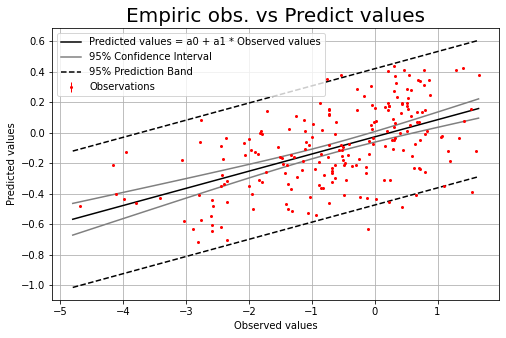

In [23]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-4.8, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: A_year: mean - 0.104, median - 0.104, CI - [0.097-0.112]

SHAP-values for: D_cm: mean - 0.07, median - 0.069, CI - [0.064-0.077]

SHAP-values for: F_Soil_ID: mean - 0.054, median - 0.055, CI - [0.049-0.06]

SHAP-values for: G_m2_ha: mean - 0.04, median - 0.039, CI - [0.032-0.046]

SHAP-values for: H_m: mean - 0.043, median - 0.043, CI - [0.038-0.047]

SHAP-values for: M_Soil: mean - 0.023, median - 0.023, CI - [0.019-0.027]

SHAP-values for: Origin_ID: mean - 0.065, median - 0.065, CI - [0.054-0.074]

SHAP-values for: Species_ID: mean - 0.02, median - 0.019, CI - [0.015-0.024]



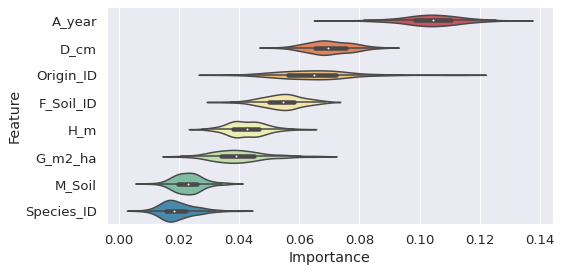

In [28]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['A_year', 'D_cm', 'Origin_ID', 'F_Soil_ID', 'H_m',   
  'G_m2_ha', 'M_Soil', 'Species_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [29]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [30]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 62.0, median: 62.0,
 pred. interval (P(0.025)-P(0.975)): 62.0-62.0, 
 conf. interval (p-value=0.95): 62.0-62.0 
***
Aggregate bias statistic: 
 mean: 0.55, median: 0.536,
 pred. interval (P(0.025)-P(0.975)): 0.184-0.9, 
 conf. interval (p-value=0.95): 0.392-0.71 
***
Aggregate RMSE statistic: 
 mean: 1.281, median: 1.286, pred. interval (P(0.025)-P(0.975)): 0.936-1.573, 
 conf. interval (p-value=0.95): 1.123-1.436 
***
Aggregate MSE statistic: 
 mean: 1.669, median: 1.653, pred. interval (P(0.025)-P(0.975)): 0.876-2.476, 
 conf. interval (p-value=0.95): 1.265-2.066 
***
Aggregate R^2 statistic: 
 mean: -0.013, median: -0.013, pred. interval (P(0.025)-P(0.975)): -0.308-0.199, 
 conf. interval (p-value=0.95): -0.119-0.097 
***
Aggregate bias(%) statistic: 
 mean: -82.745, median: -85.023, pred. interval (P(0.025)-P(0.975)): -96.006--59.539, 
 conf. interval (p-value=0.95): -90.686--76

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

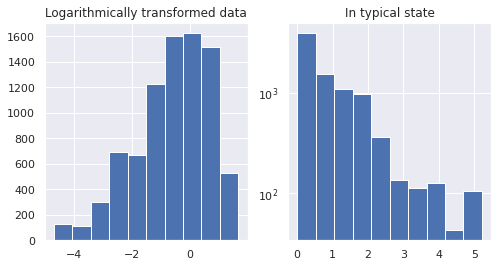

In [31]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [32]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-5, -3, -2, -1, 0, 2])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 0.1, 0.5, 1, 2, 5])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

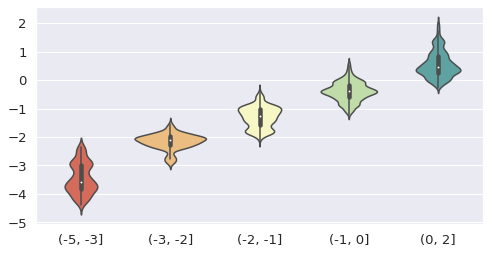

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

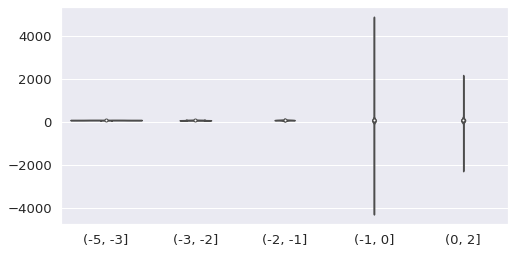

In [34]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

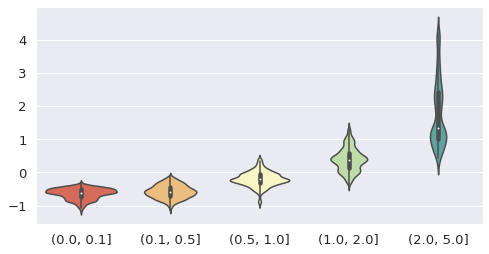

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

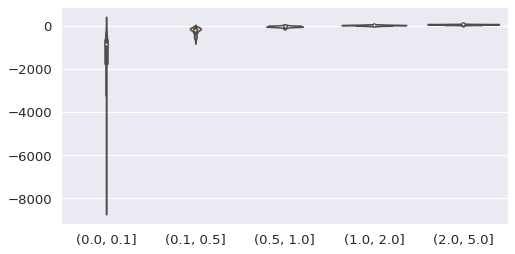

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [37]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [70]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [71]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.70463
[1]	validation_0-rmse:1.69394
[2]	validation_0-rmse:1.68121
[3]	validation_0-rmse:1.66790
[4]	validation_0-rmse:1.65536
[5]	validation_0-rmse:1.64333
[6]	validation_0-rmse:1.63198
[7]	validation_0-rmse:1.61898
[8]	validation_0-rmse:1.60861
[9]	validation_0-rmse:1.59668
[10]	validation_0-rmse:1.58722
[11]	validation_0-rmse:1.57550
[12]	validation_0-rmse:1.56441
[13]	validation_0-rmse:1.55489


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:1.54483
[15]	validation_0-rmse:1.53500
[16]	validation_0-rmse:1.52534
[17]	validation_0-rmse:1.51509
[18]	validation_0-rmse:1.50525
[19]	validation_0-rmse:1.49474
[20]	validation_0-rmse:1.48550
[21]	validation_0-rmse:1.47525
[22]	validation_0-rmse:1.46689
[23]	validation_0-rmse:1.45817
[24]	validation_0-rmse:1.45015
[25]	validation_0-rmse:1.44236
[26]	validation_0-rmse:1.43421
[27]	validation_0-rmse:1.42518
[28]	validation_0-rmse:1.41637
[29]	validation_0-rmse:1.40733
[30]	validation_0-rmse:1.39761
[31]	validation_0-rmse:1.38944
[32]	validation_0-rmse:1.38092
[33]	validation_0-rmse:1.37175
[34]	validation_0-rmse:1.36371
[35]	validation_0-rmse:1.35599
[36]	validation_0-rmse:1.34593
[37]	validation_0-rmse:1.33861
[38]	validation_0-rmse:1.33179
[39]	validation_0-rmse:1.32410
[40]	validation_0-rmse:1.31584
[41]	validation_0-rmse:1.30765
[42]	validation_0-rmse:1.30084
[43]	validation_0-rmse:1.29437
[44]	validation_0-rmse:1.28729
[45]	validation_0-rmse:1.28073
[46]	val

In [72]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 62


In [73]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

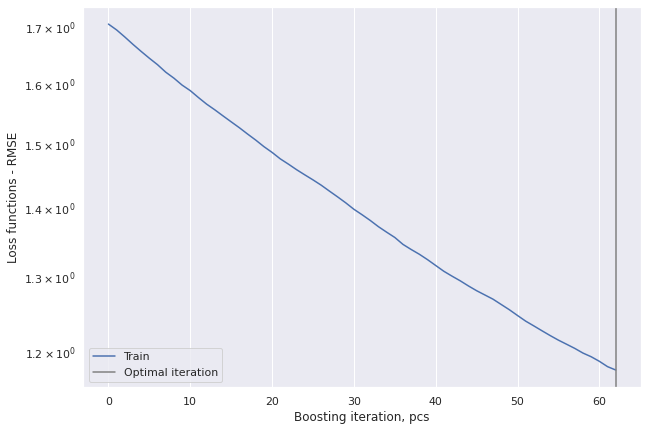

In [74]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [75]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.5
Relative bias(%):  -83.02
RMSE: 1.2
Relative RMSE(%):  -183.776
MSE: 1.4
R square: 16.3%


In [76]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.637
Uncertainty
a0: 0.018+/-0.015
a1: 0.198+/-0.010


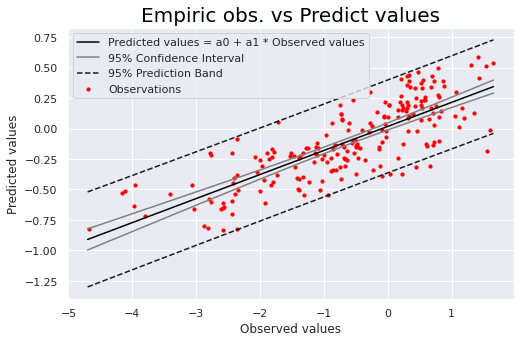

In [77]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-4.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

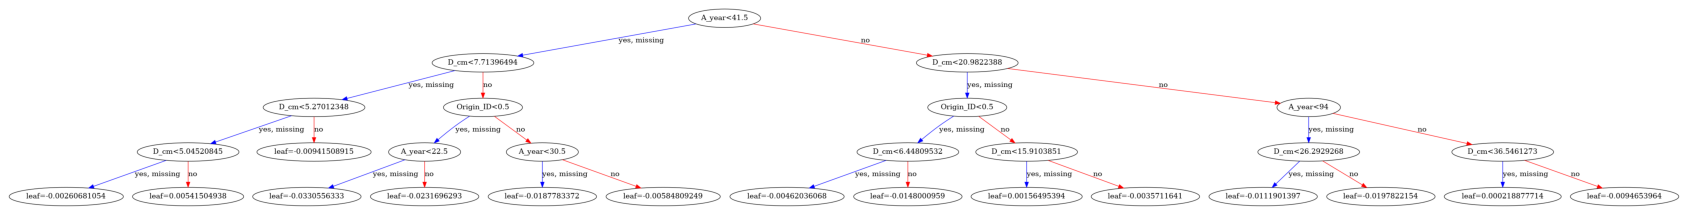

In [78]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

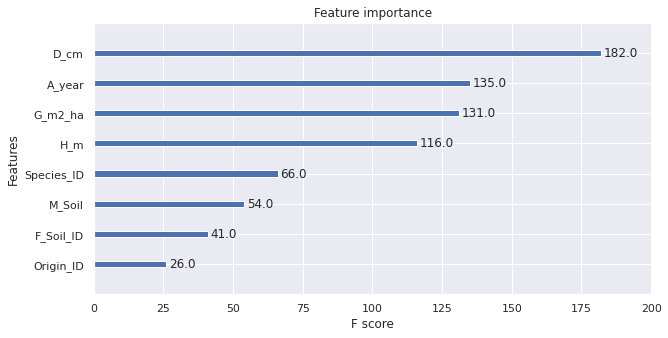

In [50]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

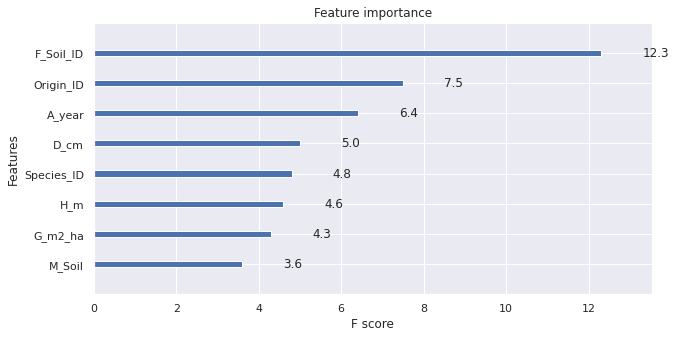

In [51]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

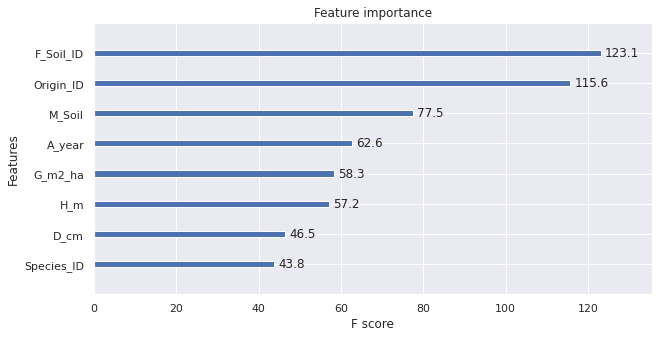

In [52]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [79]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


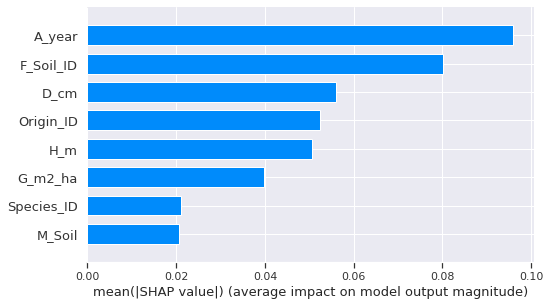

In [81]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

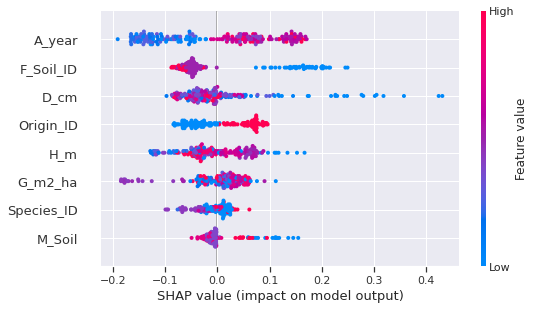

In [82]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


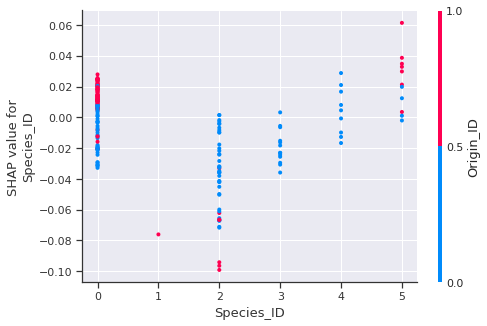

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


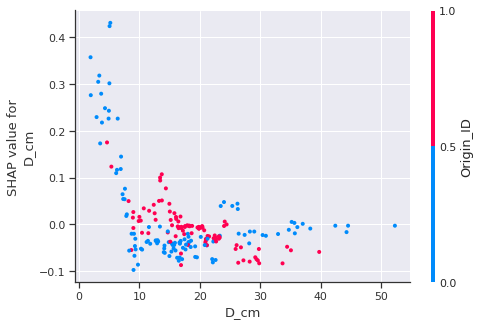

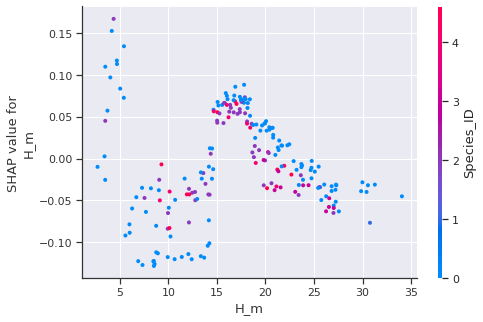

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


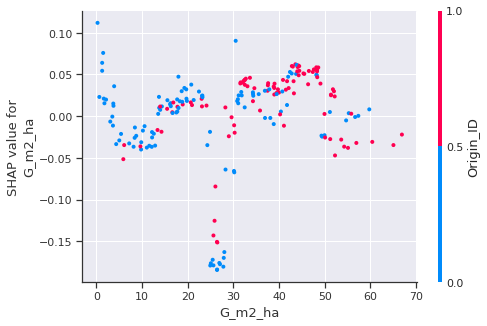

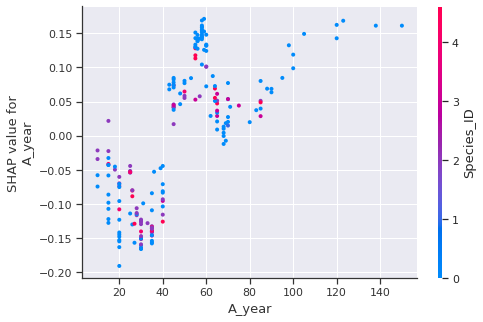

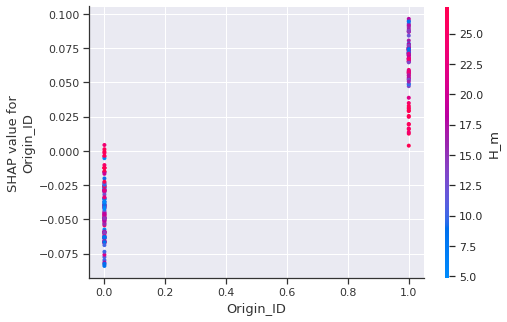

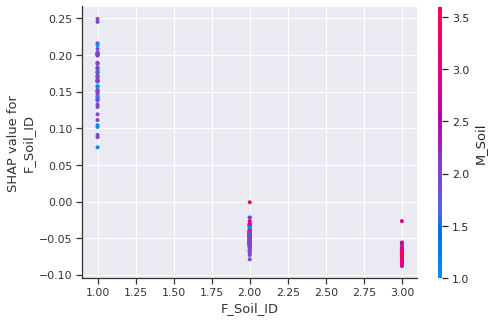

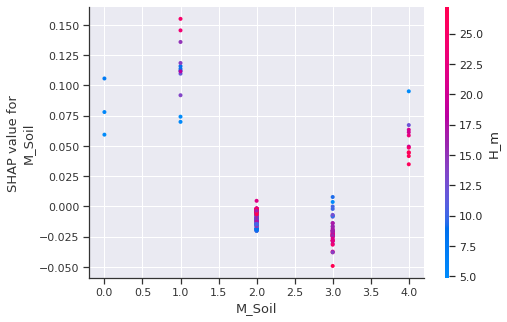

In [84]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [57]:
# Save to JSON
f_xgb_model.save_model("../02_output_data/XGBoost_models/03_LN_Tag_Cs_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../02_output_data/XGBoost_models/03_LN_Tag_Cs_XGB_model.txt")